In [2]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
%%! 
pip install --trusted-host pypi.org ipython-sql

['Requirement already satisfied: ipython-sql in c:\\users\\user\\anaconda3\\lib\\site-packages (0.5.0)',
 'Requirement already satisfied: prettytable in c:\\users\\user\\anaconda3\\lib\\site-packages (from ipython-sql) (3.13.0)',
 'Requirement already satisfied: ipython in c:\\users\\user\\anaconda3\\lib\\site-packages (from ipython-sql) (8.27.0)',
 'Requirement already satisfied: sqlalchemy>=2.0 in c:\\users\\user\\anaconda3\\lib\\site-packages (from ipython-sql) (2.0.34)',
 'Requirement already satisfied: sqlparse in c:\\users\\user\\anaconda3\\lib\\site-packages (from ipython-sql) (0.5.3)',
 'Requirement already satisfied: six in c:\\users\\user\\anaconda3\\lib\\site-packages (from ipython-sql) (1.16.0)',
 'Requirement already satisfied: ipython-genutils in c:\\users\\user\\anaconda3\\lib\\site-packages (from ipython-sql) (0.2.0)',
 'Requirement already satisfied: typing-extensions>=4.6.0 in c:\\users\\user\\anaconda3\\lib\\site-packages (from sqlalchemy>=2.0->ipython-sql) (4.11.0)'

In [4]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [5]:
%load_ext sql

In [6]:
%sql sqlite:///sqlite-sakila.db

In [7]:
%%sql
SELECT * FROM actor LIMIT 3;

 * sqlite:///sqlite-sakila.db
Done.


actor_id,first_name,last_name,last_update
1,PENELOPE,GUINESS,2021-03-06 15:51:59
2,NICK,WAHLBERG,2021-03-06 15:51:59
3,ED,CHASE,2021-03-06 15:51:59


In [8]:
conn = sqlite3.connect(r"C:\Users\User\OneDrive\Masaüstü\Everything\Yazılım\Python Programlama\Zip Dosyaları\100 SQL sorusu\Database\Database\sqlite-sakila.db")

In [9]:
df_actor = pd.read_sql_query("SELECT * FROM actor", conn)

# ÖDEV 1

**KONU:** Bütün Datayı Göstermek

In [12]:
df_actor

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2,NICK,WAHLBERG,2021-03-06 15:51:59
2,3,ED,CHASE,2021-03-06 15:51:59
3,4,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59
...,...,...,...,...
195,196,BELA,WALKEN,2021-03-06 15:52:00
196,197,REESE,WEST,2021-03-06 15:52:00
197,198,MARY,KEITEL,2021-03-06 15:52:00
198,199,JULIA,FAWCETT,2021-03-06 15:52:00


# ÖDEV 2

**KONU:** Her filmde oynayan aktörleri alın

In [15]:
df_film = pd.read_sql_query("SELECT * FROM film", conn)

In [16]:
df_film.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


In [17]:
df_film_actor = pd.read_sql_query("SELECT * FROM film_actor", conn)

In [18]:
df_film_actor.head()

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45


In [19]:
merged_film_film_actor = pd.merge(df_film, df_film_actor, on = 'film_id', how = 'outer')

In [20]:
merged_film_film_actor.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update_x,actor_id,last_update_y
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,1.0,2021-03-06 15:52:45
1,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,10.0,2021-03-06 15:52:46
2,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,20.0,2021-03-06 15:52:49
3,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,30.0,2021-03-06 15:52:51
4,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,40.0,2021-03-06 15:52:53


In [21]:
merged_twice = pd.merge(merged_film_film_actor, df_actor, on = 'actor_id', how = 'outer')

In [22]:
merged_twice.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update_x,actor_id,last_update_y,first_name,last_name,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59
1,23,ANACONDA CONFESSIONS,A Lacklusture Display of a Dentist And a Denti...,2006,1,None,3,0.99,92,9.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59
2,25,ANGELS LIFE,A Thoughtful Display of a Woman And a Astronau...,2006,1,None,3,2.99,74,15.99,G,Trailers,2021-03-06 15:52:00,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59
3,106,BULWORTH COMMANDMENTS,A Amazing Display of a Mad Cow And a Pioneer w...,2006,1,None,4,2.99,61,14.99,G,Trailers,2021-03-06 15:52:01,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59
4,140,CHEAPER CLYDE,A Emotional Character Study of a Pioneer And a...,2006,1,None,6,0.99,87,23.99,G,"Trailers,Commentaries,Behind the Scenes",2021-03-06 15:52:01,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59


In [23]:
merged_twice[["first_name", "last_name", "title"]]

,first_name,last_name,title
0,PENELOPE,GUINESS,ACADEMY DINOSAUR
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS
2,PENELOPE,GUINESS,ANGELS LIFE
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS
4,PENELOPE,GUINESS,CHEAPER CLYDE
...,...,...,...
5460,THORA,TEMPLE,WARDROBE PHANTOM
5461,THORA,TEMPLE,WRONG BEHAVIOR
5462,NaN,NaN,DRUMLINE CYCLONE
5463,NaN,NaN,FLIGHT LIES


In [24]:
a = merged_twice.groupby(["title", "first_name"])["last_name"]

In [25]:
to_see = a.apply(list)
print(to_see)

title              first_name
ACADEMY DINOSAUR   CHRISTIAN         [GABLE]
                   JOHNNY             [CAGE]
                   LUCILLE           [TRACY]
                   MARY             [KEITEL]
                   MENA             [TEMPLE]
                                    ...     
ZOOLANDER FICTION  PENELOPE         [CRONYN]
                   WHOOPI             [HURT]
ZORRO ARK          IAN               [TANDY]
                   LISA             [MONROE]
                   NICK          [DEGENERES]
Name: last_name, Length: 5394, dtype: object


In [26]:
type(to_see)

pandas.core.series.Series

In [27]:
to_see = to_see.to_frame().reset_index()

In [28]:
to_see

,title,first_name,last_name
0,ACADEMY DINOSAUR,CHRISTIAN,[GABLE]
1,ACADEMY DINOSAUR,JOHNNY,[CAGE]
2,ACADEMY DINOSAUR,LUCILLE,[TRACY]
3,ACADEMY DINOSAUR,MARY,[KEITEL]
4,ACADEMY DINOSAUR,MENA,[TEMPLE]
...,...,...,...
5389,ZOOLANDER FICTION,PENELOPE,[CRONYN]
5390,ZOOLANDER FICTION,WHOOPI,[HURT]
5391,ZORRO ARK,IAN,[TANDY]
5392,ZORRO ARK,LISA,[MONROE]


In [29]:
to_see.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5394 entries, 0 to 5393
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       5394 non-null   object
 1   first_name  5394 non-null   object
 2   last_name   5394 non-null   object
dtypes: object(3)
memory usage: 126.6+ KB


In [30]:
to_see['last_name'] = to_see['last_name'].apply(lambda x: x[0])

In [31]:
to_see[to_see['title'] == 'ACADEMY DINOSAUR']
# bir film seçiyorum

,title,first_name,last_name
0,ACADEMY DINOSAUR,CHRISTIAN,GABLE
1,ACADEMY DINOSAUR,JOHNNY,CAGE
2,ACADEMY DINOSAUR,LUCILLE,TRACY
3,ACADEMY DINOSAUR,MARY,KEITEL
4,ACADEMY DINOSAUR,MENA,TEMPLE
5,ACADEMY DINOSAUR,OPRAH,KILMER
6,ACADEMY DINOSAUR,PENELOPE,GUINESS
7,ACADEMY DINOSAUR,ROCK,DUKAKIS
8,ACADEMY DINOSAUR,SANDRA,PECK
9,ACADEMY DINOSAUR,WARREN,NOLTE


## to check if there is any duplicates ( tekrar eden değer var mı görmek için )

In [33]:
df_actor[df_actor["first_name"] == 'PENELOPE']

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59
53,54,PENELOPE,PINKETT,2021-03-06 15:51:59
103,104,PENELOPE,CRONYN,2021-03-06 15:51:59
119,120,PENELOPE,MONROE,2021-03-06 15:51:59


# ÖDEV 3

**KONU:** Her filmde kaç oyuncu oynadı

In [36]:
b = merged_twice.groupby("title")["first_name"].count()

In [37]:
b

title
ACADEMY DINOSAUR     10
ACE GOLDFINGER        4
ADAPTATION HOLES      5
AFFAIR PREJUDICE      5
AFRICAN EGG           5
                     ..
YOUNG LANGUAGE        5
YOUTH KICK            5
ZHIVAGO CORE          6
ZOOLANDER FICTION     5
ZORRO ARK             3
Name: first_name, Length: 1000, dtype: int64

In [38]:
type(b)

pandas.core.series.Series

In [39]:
b = b.to_frame()

In [40]:
b = b.reset_index()

In [41]:
b.columns = ["film_ismi", "oyuncu_sayisi"]

In [42]:
b

,film_ismi,oyuncu_sayisi
0,ACADEMY DINOSAUR,10
1,ACE GOLDFINGER,4
2,ADAPTATION HOLES,5
3,AFFAIR PREJUDICE,5
4,AFRICAN EGG,5
...,...,...
995,YOUNG LANGUAGE,5
996,YOUTH KICK,5
997,ZHIVAGO CORE,6
998,ZOOLANDER FICTION,5


# ÖDEV 4

**KONU:** Her oyuncu kaç filmde oynadı

In [45]:
to_see1 = merged_twice.groupby(["first_name", "last_name"])["title"].apply(list)
print(to_see1)

first_name  last_name
ADAM        GRANT        [ANNIE IDENTITY, BALLROOM MOCKINGBIRD, DISCIPL...
            HOPPER       [BLINDNESS GUN, BLOOD ARGONAUTS, CHAMBER ITALI...
AL          GARLAND      [BILL OTHERS, BREAKFAST GOLDFINGER, CHITTY LOC...
ALAN        DREYFUSS     [BADMAN DAWN, BARBARELLA STREETCAR, BIRCH ANTI...
ALBERT      JOHANSSON    [ALASKA PHANTOM, ALLEY EVOLUTION, APOLLO TEEN,...
                                               ...                        
WILL        WILSON       [APOCALYPSE FLAMINGOS, BAREFOOT MANCHURIAN, BO...
WILLIAM     HACKMAN      [ALABAMA DEVIL, ANTITRUST TOMATOES, BERETS AGE...
WOODY       HOFFMAN      [ALICE FANTASIA, ATLANTIS CAUSE, BEACH HEARTBR...
            JOLIE        [ALONE TRIP, APOLLO TEEN, BUGSY SONG, CHILL LU...
ZERO        CAGE         [CANYON STOCK, DANCES NONE, ENCINO ELF, ENDING...
Name: title, Length: 199, dtype: object


In [46]:
c = merged_twice.groupby(["first_name", "last_name"])["title"].count()

In [47]:
c

first_name  last_name
ADAM        GRANT        18
            HOPPER       22
AL          GARLAND      26
ALAN        DREYFUSS     27
ALBERT      JOHANSSON    33
                         ..
WILL        WILSON       31
WILLIAM     HACKMAN      27
WOODY       HOFFMAN      31
            JOLIE        31
ZERO        CAGE         25
Name: title, Length: 199, dtype: int64

In [48]:
type(c)

pandas.core.series.Series

In [49]:
c = c.to_frame().reset_index()

In [50]:
c.columns = ["isim", "soy_isim", "oynadigi_film_sayisi"]

In [51]:
c

,isim,soy_isim,oynadigi_film_sayisi
0,ADAM,GRANT,18
1,ADAM,HOPPER,22
2,AL,GARLAND,26
3,ALAN,DREYFUSS,27
4,ALBERT,JOHANSSON,33
...,...,...,...
194,WILL,WILSON,31
195,WILLIAM,HACKMAN,27
196,WOODY,HOFFMAN,31
197,WOODY,JOLIE,31


# ÖDEV 5

**KONU:** Envanterde olmayan filmler var mı? Varsa kaç tane ?

In [54]:
df_inventory = pd.read_sql_query("SELECT * FROM inventory", conn)

In [55]:
df_inventory.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08
2,3,1,1,2021-03-06 15:52:08
3,4,1,1,2021-03-06 15:52:08
4,5,1,2,2021-03-06 15:52:08


In [56]:
temp = df_inventory["film_id"]

In [57]:
temp.unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   15,   16,   17,   18,   19,   20,   21,   22,   23,
         24,   25,   26,   27,   28,   29,   30,   31,   32,   34,   35,
         37,   39,   40,   42,   43,   44,   45,   46,   47,   48,   49,
         50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
         61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
         72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
         83,   84,   85,   86,   88,   89,   90,   91,   92,   93,   94,
         95,   96,   97,   98,   99,  100,  101,  102,  103,  104,  105,
        106,  107,  109,  110,  111,  112,  113,  114,  115,  116,  117,
        118,  119,  120,  121,  122,  123,  124,  125,  126,  127,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  143,  145,  146,  147,  149,  150,  151,  152,  153,
        154,  155,  156,  157,  158,  159,  160,  1

In [58]:
type(temp.unique())

numpy.ndarray

In [59]:
eliminate = pd.DataFrame(temp.unique(), columns = ["film_id"])

In [60]:
eliminate

,film_id
0,1
1,2
2,3
3,4
4,5
...,...
953,996
954,997
955,998
956,999


In [61]:
merged_twice

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update_x,actor_id,last_update_y,first_name,last_name,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59
1,23,ANACONDA CONFESSIONS,A Lacklusture Display of a Dentist And a Denti...,2006,1,None,3,0.99,92,9.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59
2,25,ANGELS LIFE,A Thoughtful Display of a Woman And a Astronau...,2006,1,None,3,2.99,74,15.99,G,Trailers,2021-03-06 15:52:00,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59
3,106,BULWORTH COMMANDMENTS,A Amazing Display of a Mad Cow And a Pioneer w...,2006,1,None,4,2.99,61,14.99,G,Trailers,2021-03-06 15:52:01,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59
4,140,CHEAPER CLYDE,A Emotional Character Study of a Pioneer And a...,2006,1,None,6,0.99,87,23.99,G,"Trailers,Commentaries,Behind the Scenes",2021-03-06 15:52:01,1.0,2021-03-06 15:52:45,PENELOPE,GUINESS,2021-03-06 15:51:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5460,958,WARDROBE PHANTOM,A Action-Packed Display of a Mad Cow And a Ast...,2006,1,None,6,2.99,178,19.99,G,"Trailers,Commentaries",2021-03-06 15:52:08,200.0,2021-03-06 15:53:28,THORA,TEMPLE,2021-03-06 15:52:00
5461,993,WRONG BEHAVIOR,A Emotional Saga of a Crocodile And a Sumo Wre...,2006,1,None,6,2.99,178,10.99,PG-13,"Trailers,Behind the Scenes",2021-03-06 15:52:08,200.0,2021-03-06 15:53:28,THORA,TEMPLE,2021-03-06 15:52:00
5462,257,DRUMLINE CYCLONE,A Insightful Panorama of a Monkey And a Sumo W...,2006,1,None,3,0.99,110,14.99,G,"Commentaries,Deleted Scenes,Behind the Scenes",2021-03-06 15:52:02,NaN,NaN,NaN,NaN,NaN
5463,323,FLIGHT LIES,A Stunning Character Study of a Crocodile And ...,2006,1,None,7,4.99,179,22.99,R,Trailers,2021-03-06 15:52:03,NaN,NaN,NaN,NaN,NaN


In [62]:
temp1 = np.sort(merged_twice['film_id'].unique())
# ne olur ne olmaz diye ilerde yapılacak işlemler adına bir sort uygulaması gerçekleştirdim. 

In [63]:
temp1

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [64]:
film_id_list = pd.DataFrame(temp1, columns = ['film_id'])

In [65]:
film_id_list

,film_id
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


In [66]:
result = film_id_list['film_id'].apply(lambda x: x in eliminate['film_id'].values)
# film_id_list yani ana setimizde bulunan verilerin eliminate dizisinde yani envanterden çekilen listede olup olmadığını
# kontrol eden bir işlem sonucu döndürüyorum.

In [67]:
result

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: film_id, Length: 1000, dtype: bool

In [68]:
film_id_list[~result]['film_id'].values 
# id numarası eliminate dizisinde yani envanterde bulunmayan id'leri ~ işareti koyarak buluyoruz.

array([ 14,  33,  36,  38,  41,  87, 108, 128, 144, 148, 171, 192, 195,
       198, 217, 221, 318, 325, 332, 359, 386, 404, 419, 495, 497, 607,
       642, 669, 671, 701, 712, 713, 742, 801, 802, 860, 874, 909, 943,
       950, 954, 955], dtype=int64)

## to check if it is correct or not ( doğru mu değil mi kontrol etmek için )

In [70]:
df_inventory["film_id"].apply(lambda x: x in film_id_list[~result]['film_id'].values).sum() 
# yukardaki işlem kısaca "bak bakalım yukarda bulduğumuz değerlerden birisi envanterde var mı?" demek. Sonuç 0 yani yok döndü.
# işlem başarılı.

0

# ÖDEV 6

**KONU:** Kiralanabilir olan her filmin kaç kez kiralandığını ve toplam gelirlerini getirin.

In [73]:
df_rental = pd.read_sql_query("SELECT * FROM rental", conn)
df_payment = pd.read_sql_query("SELECT * FROM payment", conn)

In [74]:
df_rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2021-03-06 15:53:41
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2021-03-06 15:53:41
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2021-03-06 15:53:41


In [75]:
df_payment.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573.0,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12.000,2021-03-06 15:55:57
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53.000,2021-03-06 15:55:57
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46.000,2021-03-06 15:55:57


In [76]:
df_payment.groupby('rental_id')['amount'].sum()

rental_id
1.0        2.99
2.0        2.99
3.0        3.99
4.0        4.99
5.0        6.99
           ... 
16045.0    0.99
16046.0    0.99
16047.0    0.99
16048.0    8.99
16049.0    3.99
Name: amount, Length: 16044, dtype: float64

In [77]:
temp3 = df_payment.groupby('rental_id')['amount'].sum()
temp3 = temp3.to_frame().reset_index()

In [78]:
temp3.columns = ['rental_id', 'toplam_gelir']
temp3.head()

,rental_id,toplam_gelir
0,1.0,2.99
1,2.0,2.99
2,3.0,3.99
3,4.0,4.99
4,5.0,6.99


In [79]:
temp4 = df_payment.groupby('rental_id')['amount'].count()
temp4 = temp4.to_frame().reset_index()

In [80]:
temp4.columns = ['rental_id', 'kiralanma_sayisi']
temp4.head()

,rental_id,kiralanma_sayisi
0,1.0,1
1,2.0,1
2,3.0,1
3,4.0,1
4,5.0,1


In [81]:
temp_rental = pd.merge(temp4, temp3, on = 'rental_id', how = 'outer')
temp_rental = pd.merge(df_rental, temp_rental, on = 'rental_id', how = 'outer')
temp_rental

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,kiralanma_sayisi,toplam_gelir
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41,1,2.99
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41,1,2.99
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2021-03-06 15:53:41,1,3.99
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2021-03-06 15:53:41,1,4.99
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2021-03-06 15:53:41,1,6.99
...,...,...,...,...,...,...,...,...,...
16039,16045,2005-08-23 22:25:26.000,772,14,2005-08-25 23:54:26.000,1,2021-03-06 15:55:57,1,0.99
16040,16046,2005-08-23 22:26:47.000,4364,74,2005-08-27 18:02:47.000,2,2021-03-06 15:55:57,1,0.99
16041,16047,2005-08-23 22:42:48.000,2088,114,2005-08-25 02:48:48.000,2,2021-03-06 15:55:57,1,0.99
16042,16048,2005-08-23 22:43:07.000,2019,103,2005-08-31 21:33:07.000,1,2021-03-06 15:55:57,1,8.99


In [82]:
df_inventory

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08
2,3,1,1,2021-03-06 15:52:08
3,4,1,1,2021-03-06 15:52:08
4,5,1,2,2021-03-06 15:52:08
...,...,...,...,...
4576,4577,1000,1,2021-03-06 15:52:45
4577,4578,1000,2,2021-03-06 15:52:45
4578,4579,1000,2,2021-03-06 15:52:45
4579,4580,1000,2,2021-03-06 15:52:45


In [83]:
temp2 = pd.merge(df_inventory, df_film, on = 'film_id', how = 'outer')

In [84]:
temp2

,inventory_id,film_id,store_id,last_update_x,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update_y
0,1.0,1,1.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2.0,1,1.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
2,3.0,1,1.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
3,4.0,1,1.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
4,5.0,1,2.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,4577.0,1000,1.0,2021-03-06 15:52:45,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2021-03-06 15:52:08
4619,4578.0,1000,2.0,2021-03-06 15:52:45,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2021-03-06 15:52:08
4620,4579.0,1000,2.0,2021-03-06 15:52:45,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2021-03-06 15:52:08
4621,4580.0,1000,2.0,2021-03-06 15:52:45,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2021-03-06 15:52:08


In [85]:
temp2 = pd.merge(temp2, temp_rental, on = 'inventory_id', how = 'outer', suffixes=('_left', '_right'))

In [86]:
temp2

,inventory_id,film_id,store_id,last_update_x,title,description,release_year,language_id,original_language_id,rental_duration,...,special_features,last_update_y,rental_id,rental_date,customer_id,return_date,staff_id,last_update,kiralanma_sayisi,toplam_gelir
0,1.0,1,1.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,4863.0,2005-07-08 19:03:15.000,431.0,2005-07-11 21:29:15.000,2.0,2021-03-06 15:54:20,1.0,0.99
1,1.0,1,1.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,11433.0,2005-08-02 20:13:10.000,518.0,2005-08-11 21:35:10.000,1.0,2021-03-06 15:55:15,1.0,3.99
2,1.0,1,1.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,14714.0,2005-08-21 21:27:43.000,279.0,2005-08-30 22:26:43.000,1.0,2021-03-06 15:55:44,1.0,3.99
3,2.0,1,1.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,972.0,2005-05-30 20:21:07.000,411.0,2005-06-06 00:36:07.000,1.0,2021-03-06 15:53:48,1.0,1.99
4,2.0,1,1.0,2021-03-06 15:52:08,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,2117.0,2005-06-17 20:24:00.000,170.0,2005-06-23 17:45:00.000,2.0,2021-03-06 15:53:58,1.0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16082,NaN,909,NaN,NaN,TREASURE COMMAND,A Emotional Saga of a Car And a Madman who mus...,2006,1,None,3,...,"Trailers,Commentaries,Deleted Scenes,Behind th...",2021-03-06 15:52:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16083,NaN,943,NaN,NaN,VILLAIN DESPERATE,A Boring Yarn of a Pioneer And a Feminist who ...,2006,1,None,4,...,"Trailers,Commentaries",2021-03-06 15:52:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16084,NaN,950,NaN,NaN,VOLUME HOUSE,A Boring Tale of a Dog And a Woman who must Me...,2006,1,None,7,...,Commentaries,2021-03-06 15:52:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16085,NaN,954,NaN,NaN,WAKE JAWS,A Beautiful Saga of a Feminist And a Composer ...,2006,1,None,7,...,"Trailers,Commentaries,Deleted Scenes,Behind th...",2021-03-06 15:52:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
temp2[['title', 'kiralanma_sayisi', 'toplam_gelir']]

,title,kiralanma_sayisi,toplam_gelir
0,ACADEMY DINOSAUR,1.0,0.99
1,ACADEMY DINOSAUR,1.0,3.99
2,ACADEMY DINOSAUR,1.0,3.99
3,ACADEMY DINOSAUR,1.0,1.99
4,ACADEMY DINOSAUR,1.0,0.99
...,...,...,...
16082,TREASURE COMMAND,NaN,NaN
16083,VILLAIN DESPERATE,NaN,NaN
16084,VOLUME HOUSE,NaN,NaN
16085,WAKE JAWS,NaN,NaN


In [88]:
random = temp2.groupby('title')['toplam_gelir'].sum().to_frame().reset_index()
# başlıklara göre toplam_gelirler'i tekrar toplayıp gerçek toplam gelire ulaşıyorum ve bunu data frame oluşturup atıyorum
# NOT: Toplam gelirin toplam değer olarak kalmamasının değeri farklı rental_id'lere sahip aynı filmler olmasından kaynaklı

In [89]:
random.isnull().sum()
# null değer kontrolü

title           0
toplam_gelir    0
dtype: int64

In [90]:
random1 = temp2.groupby(['title'])['kiralanma_sayisi'].sum().to_frame().reset_index()
# başlıklara göre kiralanma sayılarının toplamını bir data frame oluşturarak atıyorum

In [91]:
random1

,title,kiralanma_sayisi
0,ACADEMY DINOSAUR,23.0
1,ACE GOLDFINGER,7.0
2,ADAPTATION HOLES,12.0
3,AFFAIR PREJUDICE,23.0
4,AFRICAN EGG,12.0
...,...,...
995,YOUNG LANGUAGE,7.0
996,YOUTH KICK,6.0
997,ZHIVAGO CORE,9.0
998,ZOOLANDER FICTION,17.0


In [92]:
random2 = pd.merge(random1, random, on = 'title', how = 'outer')
# ve en son bu 2 data frame'i ortak bir data frame'de topluyorum

In [93]:
random2.head(10)

,title,kiralanma_sayisi,toplam_gelir
0,ACADEMY DINOSAUR,23.0,36.77
1,ACE GOLDFINGER,7.0,52.93
2,ADAPTATION HOLES,12.0,37.88
3,AFFAIR PREJUDICE,23.0,91.77
4,AFRICAN EGG,12.0,51.88
5,AGENT TRUMAN,21.0,126.79
6,AIRPLANE SIERRA,15.0,82.85
7,AIRPORT POLLOCK,18.0,102.82
8,ALABAMA DEVIL,12.0,71.88
9,ALADDIN CALENDAR,23.0,131.77


In [94]:
random2[random2['title'] == 'YOUNG LANGUAGE']
# en son ise bir film seçme işlemi gerçekleştiriyorum.

,title,kiralanma_sayisi,toplam_gelir
995,YOUNG LANGUAGE,7.0,6.93


In [95]:
temp2[temp2['title'] == 'YOUNG LANGUAGE']['toplam_gelir'].count()
# kiralanma sayısı doğrulama

7

In [96]:
temp2[temp2['title'] == 'YOUNG LANGUAGE']['toplam_gelir'].sum()
# toplam gelir doğrulama

6.930000000000001

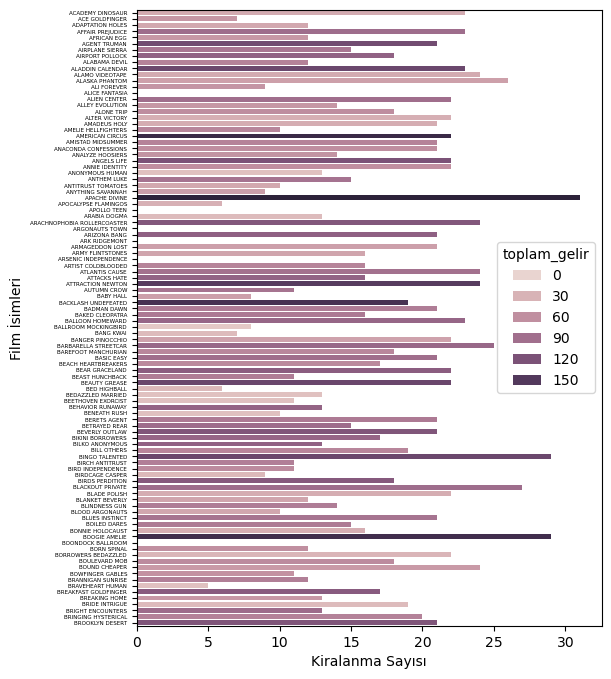

In [97]:
plt.figure(figsize = (6, 8))
g = sns.barplot(x=random2.kiralanma_sayisi.values[:100], 
                y=random2.title.values[:100], 
                hue= random2.toplam_gelir[:100],)  

plt.tick_params(axis='y', labelsize=4)
plt.xlabel('Kiralanma Sayısı') 
plt.ylabel('Film İsimleri')   

plt.show
plt.savefig('barplot.png', dpi=300, bbox_inches='tight')
# ilk 100 filmi içeren bir görselleştirme

# ÖDEV 7

**KONU:** Envanterde olmayan filmlerin kira oranını getirin

In [100]:
df_inventory

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08
2,3,1,1,2021-03-06 15:52:08
3,4,1,1,2021-03-06 15:52:08
4,5,1,2,2021-03-06 15:52:08
...,...,...,...,...
4576,4577,1000,1,2021-03-06 15:52:45
4577,4578,1000,2,2021-03-06 15:52:45
4578,4579,1000,2,2021-03-06 15:52:45
4579,4580,1000,2,2021-03-06 15:52:45


In [101]:
df_film

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08


In [102]:
eliminate2 = df_film['film_id'].apply(lambda x: x in df_inventory['film_id'].values)

In [103]:
eliminate2

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: film_id, Length: 1000, dtype: bool

In [104]:
out_of_inventory = df_film[~eliminate2][['film_id', 'title', 'rental_rate']].reset_index()

In [105]:
out_of_inventory.head()

,index,film_id,title,rental_rate
0,13,14,ALICE FANTASIA,0.99
1,32,33,APOLLO TEEN,2.99
2,35,36,ARGONAUTS TOWN,0.99
3,37,38,ARK RIDGEMONT,0.99
4,40,41,ARSENIC INDEPENDENCE,0.99


In [106]:
out_of_inventory = out_of_inventory.drop(['index'], axis = 1)

In [107]:
out_of_inventory.head()

,film_id,title,rental_rate
0,14,ALICE FANTASIA,0.99
1,33,APOLLO TEEN,2.99
2,36,ARGONAUTS TOWN,0.99
3,38,ARK RIDGEMONT,0.99
4,41,ARSENIC INDEPENDENCE,0.99


# to check if it is correct ( doğru mu değil mi kontrol etmek için )

In [109]:
df_inventory[df_inventory['film_id'] == 14].count()
# gerçekten de film id'si 14 olan bir satır envanterde bulunmamaktadır.

inventory_id    0
film_id         0
store_id        0
last_update     0
dtype: int64

# ÖDEV 8

**KONU:** Birden fazla DVD'yi iade etmeyen kaç müşteri var

In [112]:
df_rental

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2021-03-06 15:53:41
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2021-03-06 15:53:41
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2021-03-06 15:53:41
...,...,...,...,...,...,...,...
16039,16045,2005-08-23 22:25:26.000,772,14,2005-08-25 23:54:26.000,1,2021-03-06 15:55:57
16040,16046,2005-08-23 22:26:47.000,4364,74,2005-08-27 18:02:47.000,2,2021-03-06 15:55:57
16041,16047,2005-08-23 22:42:48.000,2088,114,2005-08-25 02:48:48.000,2,2021-03-06 15:55:57
16042,16048,2005-08-23 22:43:07.000,2019,103,2005-08-31 21:33:07.000,1,2021-03-06 15:55:57


In [113]:
df_rental.isnull().sum()

rental_id         0
rental_date       0
inventory_id      0
customer_id       0
return_date     183
staff_id          0
last_update       0
dtype: int64

In [114]:
thieves = df_rental[df_rental['return_date'].isna()]['customer_id'].to_frame()

In [115]:
unique, counts = np.unique(thieves['customer_id'], return_counts = True)

In [116]:
unique

array([  5,   9,  11,  14,  15,  21,  22,  23,  28,  29,  33,  41,  42,
        43,  44,  52,  53,  56,  58,  60,  64,  69,  73,  75,  80,  83,
        87,  91,  94,  99, 100, 101, 107, 108, 111, 114, 115, 120, 135,
       142, 152, 155, 162, 163, 168, 175, 178, 180, 181, 186, 188, 190,
       191, 192, 193, 199, 200, 208, 211, 213, 214, 215, 216, 219, 227,
       228, 229, 234, 236, 244, 245, 251, 252, 263, 264, 267, 269, 274,
       279, 282, 284, 287, 295, 296, 300, 315, 317, 324, 327, 330, 334,
       335, 336, 337, 349, 352, 354, 355, 359, 361, 366, 369, 373, 374,
       388, 394, 405, 410, 411, 412, 417, 421, 422, 424, 431, 438, 440,
       441, 448, 450, 452, 457, 472, 474, 476, 479, 493, 495, 496, 497,
       505, 508, 512, 516, 521, 525, 527, 530, 532, 533, 534, 537, 548,
       550, 554, 557, 560, 561, 568, 570, 576, 579, 582, 585, 587, 590,
       592, 596, 597], dtype=int64)

In [117]:
counts

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [118]:
counts > 1

array([False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,

In [119]:
the_list = unique[counts > 1]

In [120]:
the_list

array([ 15,  42,  43,  53,  60,  75, 107, 155, 163, 175, 208, 216, 228,
       267, 269, 284, 354, 361, 448, 457, 516, 560, 576], dtype=int64)

In [121]:
the_list.size
# 23 kişi DVD'lerini 1 den fazla olmak üzere iade etmemiş

23

# ÖDEV 9

**KONU:** Her müşteri kaç film kiraladı

In [124]:
df_rental.groupby(['customer_id']).count().reset_index()

,customer_id,rental_id,rental_date,inventory_id,return_date,staff_id,last_update
0,1,32,32,32,32,32,32
1,2,27,27,27,27,27,27
2,3,26,26,26,26,26,26
3,4,22,22,22,22,22,22
4,5,38,38,38,37,38,38
...,...,...,...,...,...,...,...
594,595,30,30,30,30,30,30
595,596,28,28,28,27,28,28
596,597,25,25,25,24,25,25
597,598,22,22,22,22,22,22


In [125]:
df_customer = pd.read_sql_query('SELECT * FROM customer', conn)

In [126]:
the_customer = df_rental.groupby(['customer_id']).count().reset_index()

In [127]:
the_customer

,customer_id,rental_id,rental_date,inventory_id,return_date,staff_id,last_update
0,1,32,32,32,32,32,32
1,2,27,27,27,27,27,27
2,3,26,26,26,26,26,26
3,4,22,22,22,22,22,22
4,5,38,38,38,37,38,38
...,...,...,...,...,...,...,...
594,595,30,30,30,30,30,30
595,596,28,28,28,27,28,28
596,597,25,25,25,24,25,25
597,598,22,22,22,22,22,22


In [128]:
the_customer['kac_kere_kiraladı'] = the_customer['rental_id']
# herhangi bir sayıyı alıp kaç kere kiraladığına dair bir bilgi ile eşleştiriyorum.

In [129]:
df_customer

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
...,...,...,...,...,...,...,...,...,...
594,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41
595,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41
596,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41
597,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41


In [130]:
final_customer = pd.merge(the_customer, df_customer, on = 'customer_id', how = 'outer')

In [131]:
final_customer[['customer_id','first_name', 'last_name', 'kac_kere_kiraladı']]

,customer_id,first_name,last_name,kac_kere_kiraladı
0,1,MARY,SMITH,32
1,2,PATRICIA,JOHNSON,27
2,3,LINDA,WILLIAMS,26
3,4,BARBARA,JONES,22
4,5,ELIZABETH,BROWN,38
...,...,...,...,...
594,595,TERRENCE,GUNDERSON,30
595,596,ENRIQUE,FORSYTHE,28
596,597,FREDDIE,DUGGAN,25
597,598,WADE,DELVALLE,22


## to check if it is correct ( doğru mu görmek için )

In [133]:
final_customer[['customer_id','first_name', 'last_name', 'kac_kere_kiraladı']].isnull().sum()
# herhangi bir null değer ile karşılaşmamamız yapılan eşleşmenin sorunsuz gerçekleştiğini söylüyor.

customer_id          0
first_name           0
last_name            0
kac_kere_kiraladı    0
dtype: int64

# ÖDEV 10

**KONU:** Türlerine göre en çok kiralanan filmler ve bunlara ne kadar ödendi ? 

In [136]:
df_rental

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2021-03-06 15:53:41
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2021-03-06 15:53:41
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2021-03-06 15:53:41
...,...,...,...,...,...,...,...
16039,16045,2005-08-23 22:25:26.000,772,14,2005-08-25 23:54:26.000,1,2021-03-06 15:55:57
16040,16046,2005-08-23 22:26:47.000,4364,74,2005-08-27 18:02:47.000,2,2021-03-06 15:55:57
16041,16047,2005-08-23 22:42:48.000,2088,114,2005-08-25 02:48:48.000,2,2021-03-06 15:55:57
16042,16048,2005-08-23 22:43:07.000,2019,103,2005-08-31 21:33:07.000,1,2021-03-06 15:55:57


In [137]:
df_category = pd.read_sql_query('SELECT * FROM category', conn)

In [138]:
df_category

,category_id,name,last_update
0,1,Action,2021-03-06 15:52:00
1,2,Animation,2021-03-06 15:52:00
2,3,Children,2021-03-06 15:52:00
3,4,Classics,2021-03-06 15:52:00
4,5,Comedy,2021-03-06 15:52:00
5,6,Documentary,2021-03-06 15:52:00
6,7,Drama,2021-03-06 15:52:00
7,8,Family,2021-03-06 15:52:00
8,9,Foreign,2021-03-06 15:52:00
9,10,Games,2021-03-06 15:52:00


In [139]:
df_film_category = pd.read_sql_query('SELECT * FROM film_category', conn)

In [140]:
df_film_category

,film_id,category_id,last_update
0,1,6,2021-03-06 15:53:28
1,2,11,2021-03-06 15:53:28
2,3,6,2021-03-06 15:53:28
3,4,11,2021-03-06 15:53:28
4,5,8,2021-03-06 15:53:28
...,...,...,...
995,996,6,2021-03-06 15:53:36
996,997,12,2021-03-06 15:53:36
997,998,11,2021-03-06 15:53:36
998,999,3,2021-03-06 15:53:36


In [141]:
df_inventory

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08
2,3,1,1,2021-03-06 15:52:08
3,4,1,1,2021-03-06 15:52:08
4,5,1,2,2021-03-06 15:52:08
...,...,...,...,...
4576,4577,1000,1,2021-03-06 15:52:45
4577,4578,1000,2,2021-03-06 15:52:45
4578,4579,1000,2,2021-03-06 15:52:45
4579,4580,1000,2,2021-03-06 15:52:45


In [142]:
df_customer

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
...,...,...,...,...,...,...,...,...,...
594,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41
595,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41
596,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41
597,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,1,2006-02-14 22:04:37.000,2021-03-06 15:53:41


In [143]:
df_rental

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2021-03-06 15:53:41
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2021-03-06 15:53:41
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2021-03-06 15:53:41
...,...,...,...,...,...,...,...
16039,16045,2005-08-23 22:25:26.000,772,14,2005-08-25 23:54:26.000,1,2021-03-06 15:55:57
16040,16046,2005-08-23 22:26:47.000,4364,74,2005-08-27 18:02:47.000,2,2021-03-06 15:55:57
16041,16047,2005-08-23 22:42:48.000,2088,114,2005-08-25 02:48:48.000,2,2021-03-06 15:55:57
16042,16048,2005-08-23 22:43:07.000,2019,103,2005-08-31 21:33:07.000,1,2021-03-06 15:55:57


In [144]:
df_payment

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37.000,2021-03-06 15:55:57
1,2,1,1,573.0,0.99,2005-05-28 10:35:23.000,2021-03-06 15:55:57
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12.000,2021-03-06 15:55:57
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53.000,2021-03-06 15:55:57
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46.000,2021-03-06 15:55:57
...,...,...,...,...,...,...,...
16044,16045,599,1,14599.0,4.99,2005-08-21 17:43:42.000,2021-03-06 15:58:08
16045,16046,599,1,14719.0,1.99,2005-08-21 21:41:57.000,2021-03-06 15:58:08
16046,16047,599,2,15590.0,8.99,2005-08-23 06:09:44.000,2021-03-06 15:58:09
16047,16048,599,2,15719.0,2.99,2005-08-23 11:08:46.000,2021-03-06 15:58:09


In [145]:
dff_rental = df_rental[['rental_id', 'inventory_id']]

In [146]:
dff_rental 

,rental_id,inventory_id
0,1,367
1,2,1525
2,3,1711
3,4,2452
4,5,2079
...,...,...
16039,16045,772
16040,16046,4364
16041,16047,2088
16042,16048,2019


In [147]:
dff_inventory = df_inventory[['inventory_id', 'film_id']]

In [148]:
dff_inventory

,inventory_id,film_id
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
4576,4577,1000
4577,4578,1000
4578,4579,1000
4579,4580,1000


In [149]:
dff_payment = df_payment[['rental_id', 'payment_id', 'amount']]

In [150]:
dff_payment

,rental_id,payment_id,amount
0,76.0,1,2.99
1,573.0,2,0.99
2,1185.0,3,5.99
3,1422.0,4,0.99
4,1476.0,5,9.99
...,...,...,...
16044,14599.0,16045,4.99
16045,14719.0,16046,1.99
16046,15590.0,16047,8.99
16047,15719.0,16048,2.99


In [151]:
step1 = pd.merge(dff_payment, dff_rental, on = 'rental_id', how = 'left')

In [152]:
step1[step1['rental_id'] == 10692]

,rental_id,payment_id,amount,inventory_id
15969,10692.0,15970,4.99,371.0


In [153]:
pd.DataFrame(step1['rental_id'].unique()).value_counts().apply(lambda x: x > 1).sum()
# to check if there is any duplicated value in the data set

0

In [154]:
step1.head(3)

,rental_id,payment_id,amount,inventory_id
0,76.0,1,2.99,3021.0
1,573.0,2,0.99,4020.0
2,1185.0,3,5.99,2785.0


In [155]:
step2 = pd.merge(step1, dff_inventory, on = 'inventory_id', how = 'left')

In [156]:
step2.head(3)

,rental_id,payment_id,amount,inventory_id,film_id
0,76.0,1,2.99,3021.0,663.0
1,573.0,2,0.99,4020.0,875.0
2,1185.0,3,5.99,2785.0,611.0


In [157]:
df_film_category.head(3)

,film_id,category_id,last_update
0,1,6,2021-03-06 15:53:28
1,2,11,2021-03-06 15:53:28
2,3,6,2021-03-06 15:53:28


In [158]:
dff_film_category = df_film_category[['film_id', 'category_id']]

In [159]:
step3 = pd.merge(step2, dff_film_category, on = 'film_id', how = 'left')

In [160]:
step3.head(3)

,rental_id,payment_id,amount,inventory_id,film_id,category_id
0,76.0,1,2.99,3021.0,663.0,4.0
1,573.0,2,0.99,4020.0,875.0,15.0
2,1185.0,3,5.99,2785.0,611.0,4.0


In [161]:
df_category.head(3)

,category_id,name,last_update
0,1,Action,2021-03-06 15:52:00
1,2,Animation,2021-03-06 15:52:00
2,3,Children,2021-03-06 15:52:00


In [162]:
dff_category = df_category[['category_id', 'name']]

In [163]:
step4 = pd.merge(step3, dff_category, on = 'category_id', how = 'left')

In [164]:
step4.head(3)

,rental_id,payment_id,amount,inventory_id,film_id,category_id,name
0,76.0,1,2.99,3021.0,663.0,4.0,Classics
1,573.0,2,0.99,4020.0,875.0,15.0,Sports
2,1185.0,3,5.99,2785.0,611.0,4.0,Classics


In [165]:
re_step4 = step4[['amount', 'name']]

In [166]:
re_step4.head(3)

,amount,name
0,2.99,Classics
1,0.99,Sports
2,5.99,Classics


In [167]:
amount_by_category = re_step4.groupby('name').sum().reset_index()
amount_by_category.columns = ['film_türü', 'toplam_gelir']

In [168]:
amount_by_category

,film_türü,toplam_gelir
0,Action,4375.85
1,Animation,4656.30
2,Children,3655.55
3,Classics,3639.59
4,Comedy,4383.58
5,Documentary,4217.52
6,Drama,4587.39
7,Family,4226.07
8,Foreign,4270.67
9,Games,4281.33


In [169]:
count_by_category = re_step4.groupby('name').count().reset_index()
count_by_category.columns = ['film_türü', 'kiralanma_sayisi']

In [170]:
count_by_category.head(3)

,film_türü,kiralanma_sayisi
0,Action,1112
1,Animation,1166
2,Children,945


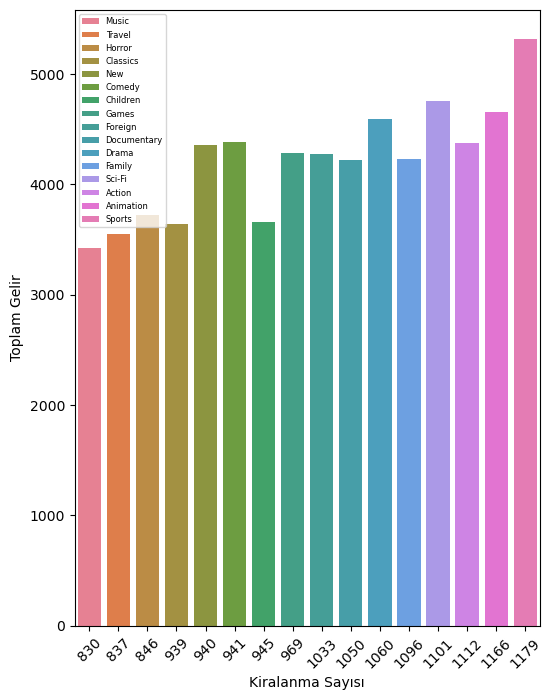

In [171]:
plt.figure(figsize = (6, 8))
sns.barplot(x = count_by_category.kiralanma_sayisi.values, y = amount_by_category.toplam_gelir.values, hue = count_by_category.film_türü);

plt.xlabel('Kiralanma Sayısı') 
plt.ylabel('Toplam Gelir')
plt.xticks(rotation = 45)
plt.legend(fontsize = 6)

plt.show();

# ÖDEV 11

**KONU:** Tür ve tarihe göre kiralama sayısı ve gelir 

In [174]:
df_actor

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2,NICK,WAHLBERG,2021-03-06 15:51:59
2,3,ED,CHASE,2021-03-06 15:51:59
3,4,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59
...,...,...,...,...
195,196,BELA,WALKEN,2021-03-06 15:52:00
196,197,REESE,WEST,2021-03-06 15:52:00
197,198,MARY,KEITEL,2021-03-06 15:52:00
198,199,JULIA,FAWCETT,2021-03-06 15:52:00


In [175]:
dff2_rental = df_rental[['rental_id', 'inventory_id', 'rental_date']]

In [176]:
step1 = pd.merge(dff_payment, dff2_rental, on = 'rental_id', how = 'left')

In [177]:
step2 = pd.merge(step1, dff_inventory, on = 'inventory_id', how = 'left')

In [178]:
step3 = pd.merge(step2, dff_film_category, on = 'film_id', how = 'left')

In [179]:
step4 = pd.merge(step3, dff_category, on = 'category_id', how = 'left')

In [180]:
step4.head(3)

,rental_id,payment_id,amount,inventory_id,rental_date,film_id,category_id,name
0,76.0,1,2.99,3021.0,2005-05-25 11:30:37.000,663.0,4.0,Classics
1,573.0,2,0.99,4020.0,2005-05-28 10:35:23.000,875.0,15.0,Sports
2,1185.0,3,5.99,2785.0,2005-06-15 00:54:12.000,611.0,4.0,Classics


In [181]:
re2_step4 = step4[['rental_date', 'amount', 'name']]

In [182]:
re2_step4.head(3)

,rental_date,amount,name
0,2005-05-25 11:30:37.000,2.99,Classics
1,2005-05-28 10:35:23.000,0.99,Sports
2,2005-06-15 00:54:12.000,5.99,Classics


In [183]:
re2_step4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16049 entries, 0 to 16048
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rental_date  16044 non-null  object 
 1   amount       16049 non-null  float64
 2   name         16044 non-null  object 
dtypes: float64(1), object(2)
memory usage: 376.3+ KB


In [184]:
re2_step4['rental_date'] = pd.to_datetime(re2_step4['rental_date'])
re2_step4['rental_date'] = re2_step4['rental_date'].dt.date

C:\Users\User\AppData\Local\Temp\ipykernel_25156\3166604928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re2_step4['rental_date'] = pd.to_datetime(re2_step4['rental_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_25156\3166604928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re2_step4['rental_date'] = re2_step4['rental_date'].dt.date


In [185]:
re2_step4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16049 entries, 0 to 16048
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rental_date  16044 non-null  object 
 1   amount       16049 non-null  float64
 2   name         16044 non-null  object 
dtypes: float64(1), object(2)
memory usage: 376.3+ KB


In [186]:
re2_step4.head(3)

,rental_date,amount,name
0,2005-05-25,2.99,Classics
1,2005-05-28,0.99,Sports
2,2005-06-15,5.99,Classics


In [187]:
temp = re2_step4.groupby(['rental_date', 'name'])['amount']
to_see = temp.apply(list)
to_see

rental_date  name     
2005-05-24   Animation                                               [4.99]
             Children                                          [6.99, 3.99]
             Comedy                                                  [0.99]
             Family                                                  [2.99]
             Horror                                            [1.99, 4.99]
                                                ...                        
2006-02-14   Music        [9.98, 0.0, 0.99, 0.0, 2.99, 0.99, 2.99, 0.99,...
             New          [0.99, 0.99, 0.0, 4.99, 4.99, 0.99, 0.99, 2.99...
             Sci-Fi        [4.99, 0.99, 4.99, 0.99, 7.98, 4.99, 4.99, 0.99]
             Sports       [0.0, 4.99, 7.98, 4.99, 0.0, 3.98, 2.99, 2.99,...
             Travel       [4.99, 0.0, 4.99, 4.99, 4.99, 2.99, 2.99, 0.99...
Name: amount, Length: 633, dtype: object

In [188]:
to_see = to_see.to_frame().reset_index()
to_see

,rental_date,name,amount
0,2005-05-24,Animation,[4.99]
1,2005-05-24,Children,"[6.99, 3.99]"
2,2005-05-24,Comedy,[0.99]
3,2005-05-24,Family,[2.99]
4,2005-05-24,Horror,"[1.99, 4.99]"
...,...,...,...
628,2006-02-14,Music,"[9.98, 0.0, 0.99, 0.0, 2.99, 0.99, 2.99, 0.99,..."
629,2006-02-14,New,"[0.99, 0.99, 0.0, 4.99, 4.99, 0.99, 0.99, 2.99..."
630,2006-02-14,Sci-Fi,"[4.99, 0.99, 4.99, 0.99, 7.98, 4.99, 4.99, 0.99]"
631,2006-02-14,Sports,"[0.0, 4.99, 7.98, 4.99, 0.0, 3.98, 2.99, 2.99,..."


In [189]:
to_see['count'] = to_see['amount'].apply(len)
to_see['amount'] = to_see['amount'].apply(sum)

In [190]:
to_see.head(10)

,rental_date,name,amount,count
0,2005-05-24,Animation,4.99,1
1,2005-05-24,Children,10.98,2
2,2005-05-24,Comedy,0.99,1
3,2005-05-24,Family,2.99,1
4,2005-05-24,Horror,6.98,2
5,2005-05-24,Music,2.99,1
6,2005-05-25,Action,46.90,10
7,2005-05-25,Animation,40.87,13
8,2005-05-25,Children,36.90,10
9,2005-05-25,Classics,31.91,9


In [191]:
re_to_see = to_see.groupby('rental_date')[['amount', 'count']].sum().reset_index()

In [192]:
re_to_see.columns = ['tarih', 'total_gelir', 'kiralanma_sayisi']

In [193]:
re_to_see.head(10)

,tarih,total_gelir,kiralanma_sayisi
0,2005-05-24,29.92,8
1,2005-05-25,573.63,137
2,2005-05-26,754.26,174
3,2005-05-27,684.34,166
4,2005-05-28,804.04,196
5,2005-05-29,648.46,154
6,2005-05-30,628.42,158
7,2005-05-31,700.37,163
8,2005-06-14,57.84,16
9,2005-06-15,1376.52,348


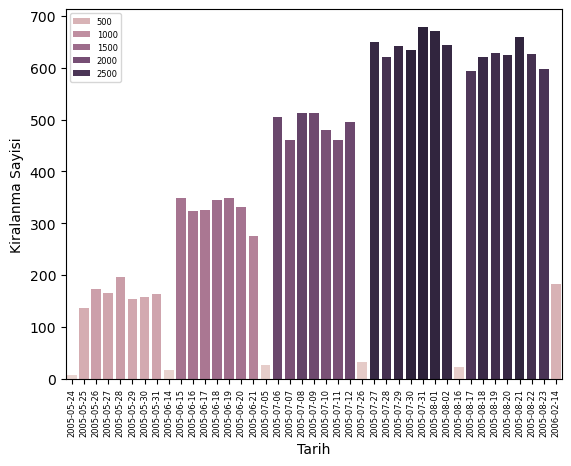

In [194]:
sns.barplot(x = re_to_see.tarih.values, y = re_to_see.kiralanma_sayisi.values, hue = re_to_see.total_gelir);

plt.xlabel('Tarih') 
plt.ylabel('Kiralanma Sayisi')
plt.xticks(rotation = 90)
plt.legend(fontsize = 6)
plt.tick_params(axis='x', labelsize=6)

plt.show();

# ÖDEV 12

**KONU:** Kiralanabilir her film için türlerine göre kaç kez kiralandığı

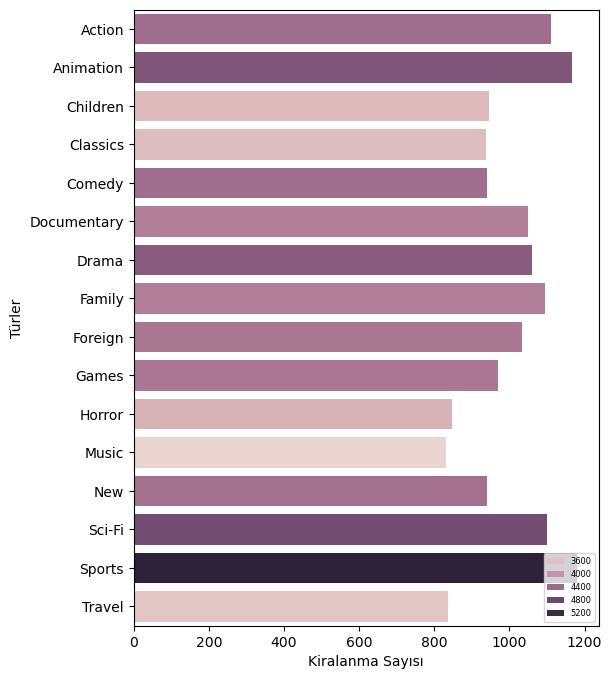

In [197]:
plt.figure(figsize = (6, 8))
sns.barplot(x = count_by_category.kiralanma_sayisi.values, y = count_by_category.film_türü, hue = amount_by_category.toplam_gelir.values);

plt.xlabel('Kiralanma Sayısı') 
plt.ylabel('Türler')
plt.legend(fontsize = 6)

plt.show();

# ÖDEV 13

**KONU:** En çok rafta bekleyen filmler

In [200]:
step3

,rental_id,payment_id,amount,inventory_id,rental_date,film_id,category_id
0,76.0,1,2.99,3021.0,2005-05-25 11:30:37.000,663.0,4.0
1,573.0,2,0.99,4020.0,2005-05-28 10:35:23.000,875.0,15.0
2,1185.0,3,5.99,2785.0,2005-06-15 00:54:12.000,611.0,4.0
3,1422.0,4,0.99,1021.0,2005-06-15 18:02:53.000,228.0,4.0
4,1476.0,5,9.99,1407.0,2005-06-15 21:08:46.000,308.0,5.0
...,...,...,...,...,...,...,...
16044,14599.0,16045,4.99,4575.0,2005-08-21 17:43:42.000,1000.0,5.0
16045,14719.0,16046,1.99,4091.0,2005-08-21 21:41:57.000,891.0,4.0
16046,15590.0,16047,8.99,4048.0,2005-08-23 06:09:44.000,881.0,11.0
16047,15719.0,16048,2.99,3990.0,2005-08-23 11:08:46.000,869.0,1.0


**KONU:** En çok rafta bekleyen filmler

In [202]:
dff_film = df_film[['film_id', 'title']]

In [203]:
df_rental['rental_date'].isnull().sum()

0

In [204]:
df_rental['return_date'].isnull().sum()

183

In [205]:
dff3_rental = df_rental.dropna(subset = ['return_date'])

In [206]:
dff3_rental['return_date'].isnull().sum()

0

In [207]:
dff3_rental = dff3_rental.drop(['last_update'], axis = 1)

In [208]:
dff3_rental.head(3)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1


In [209]:
step1 = pd.merge(dff_payment, dff3_rental, on = 'rental_id', how = 'left')

In [210]:
step2 = pd.merge(step1, dff_inventory, on = 'inventory_id', how = 'left')

In [211]:
step3 = pd.merge(step2, dff_film, on = 'film_id', how = 'left')

In [212]:
step3.head()

,rental_id,payment_id,amount,rental_date,inventory_id,customer_id,return_date,staff_id,film_id,title
0,76.0,1,2.99,2005-05-25 11:30:37.000,3021.0,1.0,2005-06-03 12:00:37.000,2.0,663.0,PATIENT SISTER
1,573.0,2,0.99,2005-05-28 10:35:23.000,4020.0,1.0,2005-06-03 06:32:23.000,1.0,875.0,TALENTED HOMICIDE
2,1185.0,3,5.99,2005-06-15 00:54:12.000,2785.0,1.0,2005-06-23 02:42:12.000,2.0,611.0,MUSKETEERS WAIT
3,1422.0,4,0.99,2005-06-15 18:02:53.000,1021.0,1.0,2005-06-19 15:54:53.000,2.0,228.0,DETECTIVE VISION
4,1476.0,5,9.99,2005-06-15 21:08:46.000,1407.0,1.0,2005-06-25 02:26:46.000,1.0,308.0,FERRIS MOTHER


In [213]:
step3['rental_date'] = pd.to_datetime(step3['rental_date'])
step3['rental_date'] = step3['rental_date'].dt.date
step3.head(3)

,rental_id,payment_id,amount,rental_date,inventory_id,customer_id,return_date,staff_id,film_id,title
0,76.0,1,2.99,2005-05-25,3021.0,1.0,2005-06-03 12:00:37.000,2.0,663.0,PATIENT SISTER
1,573.0,2,0.99,2005-05-28,4020.0,1.0,2005-06-03 06:32:23.000,1.0,875.0,TALENTED HOMICIDE
2,1185.0,3,5.99,2005-06-15,2785.0,1.0,2005-06-23 02:42:12.000,2.0,611.0,MUSKETEERS WAIT


In [214]:
step3['return_date'] = pd.to_datetime(step3['return_date'])
step3['return_date'] = step3['return_date'].dt.date
step3.head()

,rental_id,payment_id,amount,rental_date,inventory_id,customer_id,return_date,staff_id,film_id,title
0,76.0,1,2.99,2005-05-25,3021.0,1.0,2005-06-03,2.0,663.0,PATIENT SISTER
1,573.0,2,0.99,2005-05-28,4020.0,1.0,2005-06-03,1.0,875.0,TALENTED HOMICIDE
2,1185.0,3,5.99,2005-06-15,2785.0,1.0,2005-06-23,2.0,611.0,MUSKETEERS WAIT
3,1422.0,4,0.99,2005-06-15,1021.0,1.0,2005-06-19,2.0,228.0,DETECTIVE VISION
4,1476.0,5,9.99,2005-06-15,1407.0,1.0,2005-06-25,1.0,308.0,FERRIS MOTHER


In [215]:
step3['time_passed'] = step3['return_date'] - step3['rental_date']
step3.head()

,rental_id,payment_id,amount,rental_date,inventory_id,customer_id,return_date,staff_id,film_id,title,time_passed
0,76.0,1,2.99,2005-05-25,3021.0,1.0,2005-06-03,2.0,663.0,PATIENT SISTER,"9 days, 0:00:00"
1,573.0,2,0.99,2005-05-28,4020.0,1.0,2005-06-03,1.0,875.0,TALENTED HOMICIDE,"6 days, 0:00:00"
2,1185.0,3,5.99,2005-06-15,2785.0,1.0,2005-06-23,2.0,611.0,MUSKETEERS WAIT,"8 days, 0:00:00"
3,1422.0,4,0.99,2005-06-15,1021.0,1.0,2005-06-19,2.0,228.0,DETECTIVE VISION,"4 days, 0:00:00"
4,1476.0,5,9.99,2005-06-15,1407.0,1.0,2005-06-25,1.0,308.0,FERRIS MOTHER,"10 days, 0:00:00"


In [216]:
step3['time_passed'][0:10]

0     9 days, 0:00:00
1     6 days, 0:00:00
2     8 days, 0:00:00
3     4 days, 0:00:00
4    10 days, 0:00:00
5      1 day, 0:00:00
6     4 days, 0:00:00
7      1 day, 0:00:00
8     7 days, 0:00:00
9     6 days, 0:00:00
Name: time_passed, dtype: object

In [217]:
step3['time_passed'] = step3['time_passed'].apply(lambda x: x.days)
step3.head()

,rental_id,payment_id,amount,rental_date,inventory_id,customer_id,return_date,staff_id,film_id,title,time_passed
0,76.0,1,2.99,2005-05-25,3021.0,1.0,2005-06-03,2.0,663.0,PATIENT SISTER,9.0
1,573.0,2,0.99,2005-05-28,4020.0,1.0,2005-06-03,1.0,875.0,TALENTED HOMICIDE,6.0
2,1185.0,3,5.99,2005-06-15,2785.0,1.0,2005-06-23,2.0,611.0,MUSKETEERS WAIT,8.0
3,1422.0,4,0.99,2005-06-15,1021.0,1.0,2005-06-19,2.0,228.0,DETECTIVE VISION,4.0
4,1476.0,5,9.99,2005-06-15,1407.0,1.0,2005-06-25,1.0,308.0,FERRIS MOTHER,10.0


In [218]:
re_step3 = step3[['time_passed', 'title']]
re_step3

,time_passed,title
0,9.0,PATIENT SISTER
1,6.0,TALENTED HOMICIDE
2,8.0,MUSKETEERS WAIT
3,4.0,DETECTIVE VISION
4,10.0,FERRIS MOTHER
...,...,...
16044,1.0,ZORRO ARK
16045,4.0,TIMBERLAND SKY
16046,9.0,TEMPLE ATTRACTION
16047,2.0,SUSPECTS QUILLS


In [219]:
pd.DataFrame(re_step3.title.unique()).value_counts().apply(lambda x: x>1).sum()

0

In [220]:
re_step3['time_passed'].describe().T

count    15861.000000
mean         5.025219
std          2.611835
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: time_passed, dtype: float64

In [221]:
rafta_kalanlar = re_step3[re_step3['time_passed'] <= 3].reset_index().drop(['index'], axis = 1)
rafta_kalanlar.columns = ['kiralanma_suresi', 'film_ismi']
# istatistiksel olarak 0 ile 3 aralığında kiralanan film sürelerinin 'az' olarak nitelendirebileceğimizi gördüm.
# az kiralanan film süresi demek fazla rafta kalan zaman demek olduğundan dolayı onları çekip dataframe şeklinde gösterdim.

In [222]:
rafta_kalanlar

,kiralanma_suresi,film_ismi
0,1.0,CLOSER BANG
1,1.0,SAVANNAH TOWN
2,2.0,DOORS PRESIDENT
3,2.0,USUAL UNTOUCHABLES
4,1.0,FROST HEAD
...,...,...
5253,3.0,GUNFIGHT MOON
5254,2.0,SQUAD FISH
5255,1.0,ZORRO ARK
5256,2.0,SUSPECTS QUILLS


# ÖDEV 14

**KONU:** Geç, erken ve zamanında iade edilen kiralanmış filmler

In [225]:
df_rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30.000,367,130,2005-05-26 22:04:30.000,1,2021-03-06 15:53:41
1,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2021-03-06 15:53:41
2,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2021-03-06 15:53:41
3,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2021-03-06 15:53:41
4,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2021-03-06 15:53:41


In [226]:
gec_iade = re_step3[re_step3['time_passed'] > 7].reset_index().drop(['index'], axis = 1)
orta_iade = re_step3[(re_step3['time_passed'] <= 7) & (re_step3['time_passed'] >= 3)].reset_index().drop(['index'], axis = 1)
erken_iade = re_step3[re_step3['time_passed'] < 3].reset_index().drop(['index'], axis = 1)
erken_iade = erken_iade['title']

In [227]:
iadeler = pd.DataFrame(erken_iade)

In [228]:
iadeler.columns = ['erken_iade']
iadeler['orta_iade'] = orta_iade['title']
iadeler['gec_iade'] = gec_iade['title']
iadeler.head()

,erken_iade,orta_iade,gec_iade
0,CLOSER BANG,TALENTED HOMICIDE,PATIENT SISTER
1,SAVANNAH TOWN,DETECTIVE VISION,MUSKETEERS WAIT
2,DOORS PRESIDENT,ATTACKS HATE,FERRIS MOTHER
3,USUAL UNTOUCHABLES,YOUTH KICK,EXPECATIONS NATURAL
4,FROST HEAD,FIRE WOLVES,ADAPTATION HOLES


# ÖDEV 15

**KONU:** Hangi müşteri en çok dvd kiralamış 

In [231]:
dff_customer = df_customer[['customer_id', 'first_name', 'last_name']]
dff_customer

,customer_id,first_name,last_name
0,1,MARY,SMITH
1,2,PATRICIA,JOHNSON
2,3,LINDA,WILLIAMS
3,4,BARBARA,JONES
4,5,ELIZABETH,BROWN
...,...,...,...
594,595,TERRENCE,GUNDERSON
595,596,ENRIQUE,FORSYTHE
596,597,FREDDIE,DUGGAN
597,598,WADE,DELVALLE


In [232]:
dff_payment = df_payment[['rental_id', 'customer_id']]

In [233]:
dff_payment

,rental_id,customer_id
0,76.0,1
1,573.0,1
2,1185.0,1
3,1422.0,1
4,1476.0,1
...,...,...
16044,14599.0,599
16045,14719.0,599
16046,15590.0,599
16047,15719.0,599


In [234]:
step1 = pd.merge(dff_payment, dff_customer, on = 'customer_id', how = 'left')

In [235]:
step1.head(3)

,rental_id,customer_id,first_name,last_name
0,76.0,1,MARY,SMITH
1,573.0,1,MARY,SMITH
2,1185.0,1,MARY,SMITH


In [236]:
step2 = pd.merge(step1, dff_rental, on = 'rental_id', how = 'left')

In [237]:
step2

,rental_id,customer_id,first_name,last_name,inventory_id
0,76.0,1,MARY,SMITH,3021.0
1,573.0,1,MARY,SMITH,4020.0
2,1185.0,1,MARY,SMITH,2785.0
3,1422.0,1,MARY,SMITH,1021.0
4,1476.0,1,MARY,SMITH,1407.0
...,...,...,...,...,...
16044,14599.0,599,AUSTIN,CINTRON,4575.0
16045,14719.0,599,AUSTIN,CINTRON,4091.0
16046,15590.0,599,AUSTIN,CINTRON,4048.0
16047,15719.0,599,AUSTIN,CINTRON,3990.0


In [238]:
result = step2.groupby(['first_name', 'last_name']).count().reset_index()
result

,first_name,last_name,rental_id,customer_id,inventory_id
0,AARON,SELBY,24,24,24
1,ADAM,GOOCH,22,22,22
2,ADRIAN,CLARY,19,19,19
3,AGNES,BISHOP,23,23,23
4,ALAN,KAHN,26,26,26
...,...,...,...,...,...
594,WILLIE,MARKHAM,25,25,25
595,WILMA,RICHARDS,20,20,20
596,YOLANDA,WEAVER,27,27,27
597,YVONNE,WATKINS,21,21,21


In [239]:
result[result['first_name'] == 'MARY']
# isim ve soy isim kombinasyonu doğru mu bakmak için

,first_name,last_name,rental_id,customer_id,inventory_id
398,MARY,SMITH,32,32,32


In [240]:
result = result.drop(['customer_id', 'inventory_id'], axis = 1)

In [241]:
result.columns = ['isim', 'soy_isim', 'kiralama_sayisi']
result

,isim,soy_isim,kiralama_sayisi
0,AARON,SELBY,24
1,ADAM,GOOCH,22
2,ADRIAN,CLARY,19
3,AGNES,BISHOP,23
4,ALAN,KAHN,26
...,...,...,...
594,WILLIE,MARKHAM,25
595,WILMA,RICHARDS,20
596,YOLANDA,WEAVER,27
597,YVONNE,WATKINS,21


In [242]:
np.max(result['kiralama_sayisi'].values)
# maksimum kim kiralamış görmek için

46

In [243]:
result[result['kiralama_sayisi'] == 46]
# ELEANOR HUNT en çok kiralayan kişiymiş

,isim,soy_isim,kiralama_sayisi
175,ELEANOR,HUNT,46


# ÖDEV 16

**KONU:** En popüler film kategorisi hangisidir ?

In [246]:
count_by_category

,film_türü,kiralanma_sayisi
0,Action,1112
1,Animation,1166
2,Children,945
3,Classics,939
4,Comedy,941
5,Documentary,1050
6,Drama,1060
7,Family,1096
8,Foreign,1033
9,Games,969


In [247]:
count_by_category = count_by_category.sort_values(by = 'kiralanma_sayisi', ascending = False)
count_by_category
# sports türünün en çok kiralanan dolayısıyla da en popüler olan alan olduğunu söyleyebiliriz.

,film_türü,kiralanma_sayisi
14,Sports,1179
1,Animation,1166
0,Action,1112
13,Sci-Fi,1101
7,Family,1096
6,Drama,1060
5,Documentary,1050
8,Foreign,1033
9,Games,969
2,Children,945


# ÖDEV 17

**KONU:** Hangi çalışan en çok kiralama işlemi gerçekleştirmiştir ?

In [250]:
dff_rental = df_rental[['rental_id', 'inventory_id', 'staff_id']]
dff_rental

,rental_id,inventory_id,staff_id
0,1,367,1
1,2,1525,1
2,3,1711,1
3,4,2452,2
4,5,2079,1
...,...,...,...
16039,16045,772,1
16040,16046,4364,2
16041,16047,2088,2
16042,16048,2019,1


In [251]:
df_staff = pd.read_sql_query('SELECT * FROM staff', conn)

In [252]:
df_staff

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,None,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00


In [253]:
dff_staff = df_staff[['staff_id', 'first_name', 'last_name']]

In [254]:
step1 = pd.merge(dff_rental, dff_staff, on = 'staff_id', how = 'left')
step1

,rental_id,inventory_id,staff_id,first_name,last_name
0,1,367,1,Mike,Hillyer
1,2,1525,1,Mike,Hillyer
2,3,1711,1,Mike,Hillyer
3,4,2452,2,Jon,Stephens
4,5,2079,1,Mike,Hillyer
...,...,...,...,...,...
16039,16045,772,1,Mike,Hillyer
16040,16046,4364,2,Jon,Stephens
16041,16047,2088,2,Jon,Stephens
16042,16048,2019,1,Mike,Hillyer


In [255]:
result = step1.groupby(['staff_id', 'first_name', 'last_name'])['rental_id'].count().reset_index()

In [256]:
result.columns = ['staff_id', 'calisan_ismi', 'calisan_soy_ismi', 'kiralama_sayisi']

In [257]:
rent_by_staff = result

In [258]:
rent_by_staff

,staff_id,calisan_ismi,calisan_soy_ismi,kiralama_sayisi
0,1,Mike,Hillyer,8040
1,2,Jon,Stephens,8004


# ÖDEV 18

**KONU:** En çok geliri hangi film getirmiştir

In [261]:
random2
# Ödev 6'yı çözerken oluşturduğum dataframe'i kullanmaya karar verdim.

,title,kiralanma_sayisi,toplam_gelir
0,ACADEMY DINOSAUR,23.0,36.77
1,ACE GOLDFINGER,7.0,52.93
2,ADAPTATION HOLES,12.0,37.88
3,AFFAIR PREJUDICE,23.0,91.77
4,AFRICAN EGG,12.0,51.88
...,...,...,...
995,YOUNG LANGUAGE,7.0,6.93
996,YOUTH KICK,6.0,16.94
997,ZHIVAGO CORE,9.0,14.91
998,ZOOLANDER FICTION,17.0,73.83


In [262]:
random2[random2['toplam_gelir'] == np.max(random2['toplam_gelir'].values)]
# TELEGRAPH VOYAGE filmi en çok geliri getiren film olmuş

,title,kiralanma_sayisi,toplam_gelir
878,TELEGRAPH VOYAGE,27.0,231.73


# ÖDEV 19

**KONU:** Her müşteri için toplam harcama miktarını bulun

In [265]:
dff_customer

,customer_id,first_name,last_name
0,1,MARY,SMITH
1,2,PATRICIA,JOHNSON
2,3,LINDA,WILLIAMS
3,4,BARBARA,JONES
4,5,ELIZABETH,BROWN
...,...,...,...
594,595,TERRENCE,GUNDERSON
595,596,ENRIQUE,FORSYTHE
596,597,FREDDIE,DUGGAN
597,598,WADE,DELVALLE


In [266]:
dff_payment = df_payment[['rental_id', 'customer_id', 'amount']]

In [267]:
dff_payment

,rental_id,customer_id,amount
0,76.0,1,2.99
1,573.0,1,0.99
2,1185.0,1,5.99
3,1422.0,1,0.99
4,1476.0,1,9.99
...,...,...,...
16044,14599.0,599,4.99
16045,14719.0,599,1.99
16046,15590.0,599,8.99
16047,15719.0,599,2.99


In [268]:
step1 = pd.merge(dff_payment, dff_customer, on = 'customer_id', how = 'left')

In [269]:
step1

,rental_id,customer_id,amount,first_name,last_name
0,76.0,1,2.99,MARY,SMITH
1,573.0,1,0.99,MARY,SMITH
2,1185.0,1,5.99,MARY,SMITH
3,1422.0,1,0.99,MARY,SMITH
4,1476.0,1,9.99,MARY,SMITH
...,...,...,...,...,...
16044,14599.0,599,4.99,AUSTIN,CINTRON
16045,14719.0,599,1.99,AUSTIN,CINTRON
16046,15590.0,599,8.99,AUSTIN,CINTRON
16047,15719.0,599,2.99,AUSTIN,CINTRON


In [270]:
result = step1.groupby(['customer_id', 'first_name', 'last_name'])['amount'].sum().reset_index()
result2 = step1.groupby(['customer_id', 'first_name', 'last_name'])['amount'].count().reset_index()
result2.columns = ['customer_id', 'musteri_ismi', 'musteri_soy_ismi', 'kiralama_sayisi']
result.columns = ['customer_id', 'musteri_ismi', 'musteri_soy_ismi', 'total_gider']
musteri_kira = result2
musteri_gider = result
musteri_gider

,customer_id,musteri_ismi,musteri_soy_ismi,total_gider
0,1,MARY,SMITH,118.68
1,2,PATRICIA,JOHNSON,128.73
2,3,LINDA,WILLIAMS,135.74
3,4,BARBARA,JONES,81.78
4,5,ELIZABETH,BROWN,144.62
...,...,...,...,...
594,595,TERRENCE,GUNDERSON,117.70
595,596,ENRIQUE,FORSYTHE,96.72
596,597,FREDDIE,DUGGAN,99.75
597,598,WADE,DELVALLE,83.78


# ÖDEV 20

**KONU:** Her kategorideki toplam kiralama sayilarini ve gelirleri bulun

In [273]:
count_by_category

,film_türü,kiralanma_sayisi
14,Sports,1179
1,Animation,1166
0,Action,1112
13,Sci-Fi,1101
7,Family,1096
6,Drama,1060
5,Documentary,1050
8,Foreign,1033
9,Games,969
2,Children,945


In [274]:
amount_by_category

,film_türü,toplam_gelir
0,Action,4375.85
1,Animation,4656.30
2,Children,3655.55
3,Classics,3639.59
4,Comedy,4383.58
5,Documentary,4217.52
6,Drama,4587.39
7,Family,4226.07
8,Foreign,4270.67
9,Games,4281.33


In [275]:
result = pd.merge(count_by_category, amount_by_category, on = 'film_türü', how = 'left')
result

,film_türü,kiralanma_sayisi,toplam_gelir
0,Sports,1179,5314.21
1,Animation,1166,4656.30
2,Action,1112,4375.85
3,Sci-Fi,1101,4756.98
4,Family,1096,4226.07
5,Drama,1060,4587.39
6,Documentary,1050,4217.52
7,Foreign,1033,4270.67
8,Games,969,4281.33
9,Children,945,3655.55


# ÖDEV 21

**KONU:** En uzun süre kirada kalmış filmleri bulun

In [278]:
film_raf_suresi = re_step3
film_raf_suresi
# öncesinde oluşturduğum bir dataframe'i film_raf_suresi şeklinde bir dataframe'e atıyorum

,time_passed,title
0,9.0,PATIENT SISTER
1,6.0,TALENTED HOMICIDE
2,8.0,MUSKETEERS WAIT
3,4.0,DETECTIVE VISION
4,10.0,FERRIS MOTHER
...,...,...
16044,1.0,ZORRO ARK
16045,4.0,TIMBERLAND SKY
16046,9.0,TEMPLE ATTRACTION
16047,2.0,SUSPECTS QUILLS


In [279]:
film_raf_suresi = film_raf_suresi.sort_values(by = 'time_passed', ascending = False)
film_raf_suresi['time_passed'].isnull().sum()

188

In [280]:
film_raf_suresi = film_raf_suresi.dropna(subset = ['time_passed']).reset_index(drop = True)

In [281]:
film_raf_suresi.columns = ['kirada_kalma_suresi', 'film_ismi']
re_film_raf_suresi = film_raf_suresi[['film_ismi', 'kirada_kalma_suresi']]
re_film_raf_suresi[re_film_raf_suresi['kirada_kalma_suresi'] == 10]

,film_ismi,kirada_kalma_suresi
0,STEPMOM DREAM,10.0
1,ICE CROSSING,10.0
2,TELEMARK HEARTBREAKERS,10.0
3,BRIGHT ENCOUNTERS,10.0
4,GAMES BOWFINGER,10.0
...,...,...
99,ROOM ROMAN,10.0
100,HARRY IDAHO,10.0
101,TRADING PINOCCHIO,10.0
102,DREAM PICKUP,10.0


# ÖDEV 22

**KONU:** En az kiralanan 5 film hangisidir ?

In [284]:
rent_by_film = random2
rent_by_film
# çoktan oluşturduğum bir dataframe'i rent_by_film'e aktarıyorum

,title,kiralanma_sayisi,toplam_gelir
0,ACADEMY DINOSAUR,23.0,36.77
1,ACE GOLDFINGER,7.0,52.93
2,ADAPTATION HOLES,12.0,37.88
3,AFFAIR PREJUDICE,23.0,91.77
4,AFRICAN EGG,12.0,51.88
...,...,...,...
995,YOUNG LANGUAGE,7.0,6.93
996,YOUTH KICK,6.0,16.94
997,ZHIVAGO CORE,9.0,14.91
998,ZOOLANDER FICTION,17.0,73.83


In [285]:
rent_by_film[rent_by_film['kiralanma_sayisi'] == np.min(rent_by_film['kiralanma_sayisi'].values)]
# aşağıda en az sayıda kiralanan filmlere ulaşabiliyoruz

,title,kiralanma_sayisi,toplam_gelir
13,ALICE FANTASIA,0.0,0.0
32,APOLLO TEEN,0.0,0.0
35,ARGONAUTS TOWN,0.0,0.0
37,ARK RIDGEMONT,0.0,0.0
40,ARSENIC INDEPENDENCE,0.0,0.0
86,BOONDOCK BALLROOM,0.0,0.0
107,BUTCH PANTHER,0.0,0.0
127,CATCH AMISTAD,0.0,0.0
143,CHINATOWN GLADIATOR,0.0,0.0
147,CHOCOLATE DUCK,0.0,0.0


# ÖDEV 24

**KONU:** En fazla kazanç sağlayan 5 müşteriyi bulun

In [288]:
musteri_gider

,customer_id,musteri_ismi,musteri_soy_ismi,total_gider
0,1,MARY,SMITH,118.68
1,2,PATRICIA,JOHNSON,128.73
2,3,LINDA,WILLIAMS,135.74
3,4,BARBARA,JONES,81.78
4,5,ELIZABETH,BROWN,144.62
...,...,...,...,...
594,595,TERRENCE,GUNDERSON,117.70
595,596,ENRIQUE,FORSYTHE,96.72
596,597,FREDDIE,DUGGAN,99.75
597,598,WADE,DELVALLE,83.78


In [289]:
musteri_gider.sort_values(by = 'total_gider', ascending = False).head(5)
# Gördüğümüz üzere KARL SEAL, ELEANOR HUNT, CLARA SHAW, RHONDA KENNEDY, MARION SNYDER olmak üzere 5 tane müşterinin 
# harcadığı değerler ilk 5te bulunmaktadır.

,customer_id,musteri_ismi,musteri_soy_ismi,total_gider
525,526,KARL,SEAL,221.55
147,148,ELEANOR,HUNT,216.54
143,144,CLARA,SHAW,195.58
136,137,RHONDA,KENNEDY,194.61
177,178,MARION,SNYDER,194.61


# ÖDEV 25

**KONU:** Her filmin ortalama kiralanma süresini bulun

In [292]:
dff_film

,film_id,title
0,1,ACADEMY DINOSAUR
1,2,ACE GOLDFINGER
2,3,ADAPTATION HOLES
3,4,AFFAIR PREJUDICE
4,5,AFRICAN EGG
...,...,...
995,996,YOUNG LANGUAGE
996,997,YOUTH KICK
997,998,ZHIVAGO CORE
998,999,ZOOLANDER FICTION


In [293]:
dff_rental = df_rental[['rental_id', 'inventory_id', 'rental_date', 'return_date']]

In [294]:
dff_inventory

,inventory_id,film_id
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
4576,4577,1000
4577,4578,1000
4578,4579,1000
4579,4580,1000


In [295]:
step1 = pd.merge(dff_rental, dff_inventory, on = 'inventory_id', how = 'left')

In [296]:
step2 = pd.merge(step1, dff_film, on = 'film_id', how = 'left')
step2

,rental_id,inventory_id,rental_date,return_date,film_id,title
0,1,367,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,80,BLANKET BEVERLY
1,2,1525,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000,333,FREAKY POCUS
2,3,1711,2005-05-24 23:03:39.000,2005-06-01 22:12:39.000,373,GRADUATE LORD
3,4,2452,2005-05-24 23:04:41.000,2005-06-03 01:43:41.000,535,LOVE SUICIDES
4,5,2079,2005-05-24 23:05:21.000,2005-06-02 04:33:21.000,450,IDOLS SNATCHERS
...,...,...,...,...,...,...
16039,16045,772,2005-08-23 22:25:26.000,2005-08-25 23:54:26.000,168,COMANCHEROS ENEMY
16040,16046,4364,2005-08-23 22:26:47.000,2005-08-27 18:02:47.000,951,VOYAGE LEGALLY
16041,16047,2088,2005-08-23 22:42:48.000,2005-08-25 02:48:48.000,452,ILLUSION AMELIE
16042,16048,2019,2005-08-23 22:43:07.000,2005-08-31 21:33:07.000,439,HUNCHBACK IMPOSSIBLE


In [297]:
step2['rental_date'] = pd.to_datetime(step2['rental_date'])
step2['rental_date']

0       2005-05-24 22:53:30
1       2005-05-24 22:54:33
2       2005-05-24 23:03:39
3       2005-05-24 23:04:41
4       2005-05-24 23:05:21
                ...        
16039   2005-08-23 22:25:26
16040   2005-08-23 22:26:47
16041   2005-08-23 22:42:48
16042   2005-08-23 22:43:07
16043   2005-08-23 22:50:12
Name: rental_date, Length: 16044, dtype: datetime64[ns]

In [298]:
step2['return_date'] = pd.to_datetime(step2['return_date'])
step2['return_date']

0       2005-05-26 22:04:30
1       2005-05-28 19:40:33
2       2005-06-01 22:12:39
3       2005-06-03 01:43:41
4       2005-06-02 04:33:21
                ...        
16039   2005-08-25 23:54:26
16040   2005-08-27 18:02:47
16041   2005-08-25 02:48:48
16042   2005-08-31 21:33:07
16043   2005-08-30 01:01:12
Name: return_date, Length: 16044, dtype: datetime64[ns]

In [299]:
step2['kiralanma_suresi'] = step2['return_date'] - step2['rental_date']
step2['kiralanma_suresi'] = step2['kiralanma_suresi'].apply(lambda x: x.days)

In [300]:
step2

,rental_id,inventory_id,rental_date,return_date,film_id,title,kiralanma_suresi
0,1,367,2005-05-24 22:53:30,2005-05-26 22:04:30,80,BLANKET BEVERLY,1.0
1,2,1525,2005-05-24 22:54:33,2005-05-28 19:40:33,333,FREAKY POCUS,3.0
2,3,1711,2005-05-24 23:03:39,2005-06-01 22:12:39,373,GRADUATE LORD,7.0
3,4,2452,2005-05-24 23:04:41,2005-06-03 01:43:41,535,LOVE SUICIDES,9.0
4,5,2079,2005-05-24 23:05:21,2005-06-02 04:33:21,450,IDOLS SNATCHERS,8.0
...,...,...,...,...,...,...,...
16039,16045,772,2005-08-23 22:25:26,2005-08-25 23:54:26,168,COMANCHEROS ENEMY,2.0
16040,16046,4364,2005-08-23 22:26:47,2005-08-27 18:02:47,951,VOYAGE LEGALLY,3.0
16041,16047,2088,2005-08-23 22:42:48,2005-08-25 02:48:48,452,ILLUSION AMELIE,1.0
16042,16048,2019,2005-08-23 22:43:07,2005-08-31 21:33:07,439,HUNCHBACK IMPOSSIBLE,7.0


In [301]:
step3 = step2.drop(['rental_date', 'return_date', 'film_id', 'inventory_id', 'rental_id'], axis = 1)
step3

,title,kiralanma_suresi
0,BLANKET BEVERLY,1.0
1,FREAKY POCUS,3.0
2,GRADUATE LORD,7.0
3,LOVE SUICIDES,9.0
4,IDOLS SNATCHERS,8.0
...,...,...
16039,COMANCHEROS ENEMY,2.0
16040,VOYAGE LEGALLY,3.0
16041,ILLUSION AMELIE,1.0
16042,HUNCHBACK IMPOSSIBLE,7.0


In [302]:
mean_rental_by_film = step3.groupby('title')['kiralanma_suresi'].mean().reset_index()
mean_rental_by_film

,title,kiralanma_suresi
0,ACADEMY DINOSAUR,4.545455
1,ACE GOLDFINGER,5.333333
2,ADAPTATION HOLES,2.833333
3,AFFAIR PREJUDICE,4.363636
4,AFRICAN EGG,6.727273
...,...,...
953,YOUNG LANGUAGE,4.000000
954,YOUTH KICK,4.666667
955,ZHIVAGO CORE,5.250000
956,ZOOLANDER FICTION,5.176471


# ÖDEV 26

**KONU:** Her türde en popüler filmi bulun

In [305]:
df_film_category.head(3)

,film_id,category_id,last_update
0,1,6,2021-03-06 15:53:28
1,2,11,2021-03-06 15:53:28
2,3,6,2021-03-06 15:53:28


In [306]:
rent_by_film.head(3)

,title,kiralanma_sayisi,toplam_gelir
0,ACADEMY DINOSAUR,23.0,36.77
1,ACE GOLDFINGER,7.0,52.93
2,ADAPTATION HOLES,12.0,37.88


In [307]:
dff_film.head(3)

,film_id,title
0,1,ACADEMY DINOSAUR
1,2,ACE GOLDFINGER
2,3,ADAPTATION HOLES


In [308]:
dff_film_category.head(3)

,film_id,category_id
0,1,6
1,2,11
2,3,6


In [309]:
dff_category.head(3)

,category_id,name
0,1,Action
1,2,Animation
2,3,Children


In [310]:
step1 = pd.merge(dff_film, dff_film_category, on = 'film_id', how = 'left')
step2 = pd.merge(step1, dff_category, on = 'category_id', how = 'left')
step2

,film_id,title,category_id,name
0,1,ACADEMY DINOSAUR,6,Documentary
1,2,ACE GOLDFINGER,11,Horror
2,3,ADAPTATION HOLES,6,Documentary
3,4,AFFAIR PREJUDICE,11,Horror
4,5,AFRICAN EGG,8,Family
...,...,...,...,...
995,996,YOUNG LANGUAGE,6,Documentary
996,997,YOUTH KICK,12,Music
997,998,ZHIVAGO CORE,11,Horror
998,999,ZOOLANDER FICTION,3,Children


In [311]:
ready_for_merge = step2[['title', 'name']]
ready_for_merge

,title,name
0,ACADEMY DINOSAUR,Documentary
1,ACE GOLDFINGER,Horror
2,ADAPTATION HOLES,Documentary
3,AFFAIR PREJUDICE,Horror
4,AFRICAN EGG,Family
...,...,...
995,YOUNG LANGUAGE,Documentary
996,YOUTH KICK,Music
997,ZHIVAGO CORE,Horror
998,ZOOLANDER FICTION,Children


In [312]:
film_rent_by_category = pd.merge(rent_by_film, ready_for_merge, on = 'title', how = 'left')
film_rent_by_category

,title,kiralanma_sayisi,toplam_gelir,name
0,ACADEMY DINOSAUR,23.0,36.77,Documentary
1,ACE GOLDFINGER,7.0,52.93,Horror
2,ADAPTATION HOLES,12.0,37.88,Documentary
3,AFFAIR PREJUDICE,23.0,91.77,Horror
4,AFRICAN EGG,12.0,51.88,Family
...,...,...,...,...
995,YOUNG LANGUAGE,7.0,6.93,Documentary
996,YOUTH KICK,6.0,16.94,Music
997,ZHIVAGO CORE,9.0,14.91,Horror
998,ZOOLANDER FICTION,17.0,73.83,Children


In [313]:
max_by_category = film_rent_by_category.groupby(['name'])['kiralanma_sayisi'].apply(max).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_25156\3975638499.py:1: FutureWarning: The provided callable <built-in function max> is currently using np.maximum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.maximum.reduce instead.
  max_by_category = film_rent_by_category.groupby(['name'])['kiralanma_sayisi'].apply(max).reset_index()


In [314]:
max_by_category

,name,kiralanma_sayisi
0,Action,30.0
1,Animation,32.0
2,Children,31.0
3,Classics,31.0
4,Comedy,31.0
5,Documentary,31.0
6,Drama,31.0
7,Family,31.0
8,Foreign,33.0
9,Games,32.0


In [315]:
film_rent_by_category[(film_rent_by_category['name'] == 'Action') & (film_rent_by_category['kiralanma_sayisi'] >= max_by_category[max_by_category['name'] == 'Action']['kiralanma_sayisi'][0])]
# doğru mu değil mi ufak kontroller

,title,kiralanma_sayisi,toplam_gelir,name
747,RUGRATS SHAKESPEARE,30.0,70.7,Action
868,SUSPECTS QUILLS,30.0,133.7,Action


In [316]:
film_rent_by_category[(film_rent_by_category['name'] == 'Animation') & (film_rent_by_category['kiralanma_sayisi'] >= max_by_category[max_by_category['name'] == 'Animation']['kiralanma_sayisi'][1])]
# doğru mu değil mi ufak kontroller

,title,kiralanma_sayisi,toplam_gelir,name
488,JUGGLER HARDLY,32.0,96.68,Animation


In [317]:
film_rent_by_category[(film_rent_by_category['name'] == 'Children') & (film_rent_by_category['kiralanma_sayisi'] >= max_by_category[max_by_category['name'] == 'Children']['kiralanma_sayisi'][2])]
# doğru mu değil mi ufak kontroller

,title,kiralanma_sayisi,toplam_gelir,name
734,ROBBERS JOON,31.0,105.69,Children


In [318]:
# yukarıdaki şekilde kontrol edebiliriz

In [319]:
dicti = max_by_category['name'].tolist()
dicti

['Action',
 'Animation',
 'Children',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Games',
 'Horror',
 'Music',
 'New',
 'Sci-Fi',
 'Sports',
 'Travel']

In [320]:
x = 0
film_rent_list = []
for i in dicti:
    film_rent_list.append(film_rent_by_category[
        (film_rent_by_category['name'] == i) & 
        (film_rent_by_category['kiralanma_sayisi'] >= max_by_category[max_by_category['name'] == i]['kiralanma_sayisi'][x])
    ])
    x += 1

In [321]:
film_rent_list

[                   title  kiralanma_sayisi  toplam_gelir    name
 747  RUGRATS SHAKESPEARE              30.0          70.7  Action
 868      SUSPECTS QUILLS              30.0         133.7  Action,
               title  kiralanma_sayisi  toplam_gelir       name
 488  JUGGLER HARDLY              32.0         96.68  Animation,
             title  kiralanma_sayisi  toplam_gelir      name
 734  ROBBERS JOON              31.0        105.69  Children,
               title  kiralanma_sayisi  toplam_gelir      name
 890  TIMBERLAND SKY              31.0        123.69  Classics,
          title  kiralanma_sayisi  toplam_gelir    name
 999  ZORRO ARK              31.0        214.69  Comedy,
          title  kiralanma_sayisi  toplam_gelir         name
 972  WIFE TURN              31.0        223.69  Documentary,
             title  kiralanma_sayisi  toplam_gelir   name
 417  HOBBIT ALIEN              31.0         81.69  Drama,
                title  kiralanma_sayisi  toplam_gelir    name
 30    

In [322]:
final_film_rent_by_category = pd.concat(film_rent_list, ignore_index=True)

In [323]:
final_film_rent_by_category
# bütün en çok kiralanan film'lere türlerine göre bu şekilde ulaşabiliriz.

,title,kiralanma_sayisi,toplam_gelir,name
0,RUGRATS SHAKESPEARE,30.0,70.70,Action
1,SUSPECTS QUILLS,30.0,133.70,Action
2,JUGGLER HARDLY,32.0,96.68,Animation
3,ROBBERS JOON,31.0,105.69,Children
4,TIMBERLAND SKY,31.0,123.69,Classics
5,ZORRO ARK,31.0,214.69,Comedy
6,WIFE TURN,31.0,223.69,Documentary
7,HOBBIT ALIEN,31.0,81.69,Drama
8,APACHE DIVINE,31.0,178.69,Family
9,NETWORK PEAK,31.0,133.69,Family


# ÖDEV 27

**KONU:** Her türde en fazla gelir sağlayan filmi bulun

In [326]:
max2_by_category = film_rent_by_category.groupby(['name'])['toplam_gelir'].apply(max).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_25156\253461122.py:1: FutureWarning: The provided callable <built-in function max> is currently using np.maximum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.maximum.reduce instead.
  max2_by_category = film_rent_by_category.groupby(['name'])['toplam_gelir'].apply(max).reset_index()


In [327]:
max2_by_category

,name,toplam_gelir
0,Action,175.77
1,Animation,178.70
2,Children,158.81
3,Classics,141.77
4,Comedy,214.69
5,Documentary,223.69
6,Drama,198.72
7,Family,179.73
8,Foreign,191.74
9,Games,179.70


In [328]:
dicti_2 = max2_by_category['name'].tolist()
dicti_2

['Action',
 'Animation',
 'Children',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Games',
 'Horror',
 'Music',
 'New',
 'Sci-Fi',
 'Sports',
 'Travel']

In [329]:
y = 0
film_income_list = []
for i in dicti_2:
    film_income_list.append(film_rent_by_category[(film_rent_by_category['name'] == i) & (film_rent_by_category['toplam_gelir'] >= max2_by_category[max_by_category['name'] == i]['toplam_gelir'][y])])
    y = y + 1

In [330]:
film_income_by_category = pd.concat(film_income_list, ignore_index=True)
film_income_by_category
# en çok gelir alan filmlere ise türlerine göre bu şekilde ulaşabiliriz

,title,kiralanma_sayisi,toplam_gelir,name
0,FOOL MOCKINGBIRD,23.0,175.77,Action
1,DOGMA FAMILY,30.0,178.70,Animation
2,BACKLASH UNDEFEATED,19.0,158.81,Children
3,STEEL SANTA,23.0,141.77,Classics
4,ZORRO ARK,31.0,214.69,Comedy
5,WIFE TURN,31.0,223.69,Documentary
6,TORQUE BOUND,27.0,198.72,Drama
7,RANGE MOONWALKER,27.0,179.73,Family
8,INNOCENT USUAL,26.0,191.74,Foreign
9,MASSACRE USUAL,30.0,179.70,Games


# ÖDEV 28

**KONU:** En çok DVD iade etmeyen müşteriyi bulun

In [333]:
dff_rental.head(3)

,rental_id,inventory_id,rental_date,return_date
0,1,367,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000
1,2,1525,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000
2,3,1711,2005-05-24 23:03:39.000,2005-06-01 22:12:39.000


In [334]:
dff_rental.isnull().sum()

rental_id         0
inventory_id      0
rental_date       0
return_date     183
dtype: int64

In [335]:
dff_payment.head(3)

,rental_id,customer_id,amount
0,76.0,1,2.99
1,573.0,1,0.99
2,1185.0,1,5.99


In [336]:
dff_customer.head(3)

,customer_id,first_name,last_name
0,1,MARY,SMITH
1,2,PATRICIA,JOHNSON
2,3,LINDA,WILLIAMS


In [337]:
step1 = pd.merge(dff_payment, dff_rental, on = 'rental_id', how = 'left')
step1.head(3)

,rental_id,customer_id,amount,inventory_id,rental_date,return_date
0,76.0,1,2.99,3021.0,2005-05-25 11:30:37.000,2005-06-03 12:00:37.000
1,573.0,1,0.99,4020.0,2005-05-28 10:35:23.000,2005-06-03 06:32:23.000
2,1185.0,1,5.99,2785.0,2005-06-15 00:54:12.000,2005-06-23 02:42:12.000


In [338]:
step2 = pd.merge(step1, dff_customer, on = 'customer_id', how = 'left')
step2.head(3)

,rental_id,customer_id,amount,inventory_id,rental_date,return_date,first_name,last_name
0,76.0,1,2.99,3021.0,2005-05-25 11:30:37.000,2005-06-03 12:00:37.000,MARY,SMITH
1,573.0,1,0.99,4020.0,2005-05-28 10:35:23.000,2005-06-03 06:32:23.000,MARY,SMITH
2,1185.0,1,5.99,2785.0,2005-06-15 00:54:12.000,2005-06-23 02:42:12.000,MARY,SMITH


In [339]:
no_return_by_customer = step2[step2['return_date'].isnull()]
no_return_by_customer

,rental_id,customer_id,amount,inventory_id,rental_date,return_date,first_name,last_name
144,13209.0,5,0.99,1574.0,2006-02-14 15:16:03.000,None,ELIZABETH,BROWN
252,15813.0,9,4.99,981.0,2006-02-14 15:16:03.000,None,MARGARET,MOORE
301,11646.0,11,0.99,478.0,2006-02-14 15:16:03.000,None,LISA,ANDERSON
384,13780.0,14,4.99,1775.0,2006-02-14 15:16:03.000,None,BETTY,WHITE
415,13798.0,15,3.98,526.0,2006-02-14 15:16:03.000,None,HELEN,HARRIS
...,...,...,...,...,...,...,...,...
15733,12144.0,587,0.99,512.0,2006-02-14 15:16:03.000,None,SERGIO,STANFIELD
15815,15458.0,590,2.99,25.0,2006-02-14 15:16:03.000,None,SETH,HANNON
15871,14606.0,592,0.99,2291.0,2006-02-14 15:16:03.000,None,TERRANCE,ROUSH
15982,15423.0,596,0.99,1786.0,2006-02-14 15:16:03.000,None,ENRIQUE,FORSYTHE


In [340]:
no2_return_by_customer = no_return_by_customer.groupby(['first_name', 'last_name'])['return_date'].apply(lambda x: x.isna().sum()).reset_index()
no2_return_by_customer

,first_name,last_name,return_date
0,ADRIAN,CLARY,1
1,ALBERT,CROUSE,1
2,ALBERTO,HENNING,1
3,ALICIA,MILLS,1
4,ALLAN,CORNISH,1
...,...,...,...
159,WENDY,HARRISON,1
160,WILLIE,HOWELL,1
161,WILLIE,MARKHAM,1
162,YOLANDA,WEAVER,1


In [341]:
no2_return_by_customer.columns = ['musteri_ismi', 'musteri_soy_ismi', 'count_of_no_return']
# adlandırıyorum, türkçesini bulamadığım için son sütunu ingilizce isimlendirdim

In [342]:
no2_return_by_customer[no2_return_by_customer['count_of_no_return'] == np.max(no2_return_by_customer['count_of_no_return'].values)]
# TAMMY SANDERS maalesef bir hırsız...

,musteri_ismi,musteri_soy_ismi,count_of_no_return
148,TAMMY,SANDERS,3


# ÖDEV 29

**KONU:** En fazla kiralama yapan 5 çalışanı bulun

In [345]:
dff_staff
# zaten sadece 2 çalışanımız var dolayısıyla bu iki kişi otomatik olarak seçiliyor

,staff_id,first_name,last_name
0,1,Mike,Hillyer
1,2,Jon,Stephens


In [346]:
rent_by_staff
# önceden bulmuş olduğum veri seti yardımıyla hangisinin ne kadarlık bir kiralama yaptığını da görebiliyoruz.

,staff_id,calisan_ismi,calisan_soy_ismi,kiralama_sayisi
0,1,Mike,Hillyer,8040
1,2,Jon,Stephens,8004


# ÖDEV 30

**KONU:** En fazla kiralama yapan 5 müşteri hangi şubeden kiralama yapmış

In [349]:
musteri_kira

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi
0,1,MARY,SMITH,32
1,2,PATRICIA,JOHNSON,27
2,3,LINDA,WILLIAMS,26
3,4,BARBARA,JONES,22
4,5,ELIZABETH,BROWN,38
...,...,...,...,...
594,595,TERRENCE,GUNDERSON,30
595,596,ENRIQUE,FORSYTHE,28
596,597,FREDDIE,DUGGAN,25
597,598,WADE,DELVALLE,22


In [350]:
dfff_customer = df_customer[['customer_id', 'store_id']]

In [351]:
musteri_kira_ve_sube = pd.merge(musteri_kira, dfff_customer, on = 'customer_id', how = 'left')
musteri_kira_ve_sube

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,store_id
0,1,MARY,SMITH,32,1
1,2,PATRICIA,JOHNSON,27,1
2,3,LINDA,WILLIAMS,26,1
3,4,BARBARA,JONES,22,2
4,5,ELIZABETH,BROWN,38,1
...,...,...,...,...,...
594,595,TERRENCE,GUNDERSON,30,1
595,596,ENRIQUE,FORSYTHE,28,1
596,597,FREDDIE,DUGGAN,25,1
597,598,WADE,DELVALLE,22,1


In [352]:
musteri_kira_ve_sube.sort_values(by = 'kiralama_sayisi', ascending = False)

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,store_id
147,148,ELEANOR,HUNT,46,1
525,526,KARL,SEAL,45,2
143,144,CLARA,SHAW,42,1
235,236,MARCIA,DEAN,42,1
74,75,TAMMY,SANDERS,41,2
...,...,...,...,...,...
247,248,CAROLINE,BOWMAN,15,1
109,110,TIFFANY,JORDAN,14,2
60,61,KATHERINE,RIVERA,14,2
280,281,LEONA,OBRIEN,14,2


In [353]:
musteri_kira_ve_sube.sort_values(by = 'kiralama_sayisi', ascending = False)['store_id'].to_frame().head(5)
# sonuna ufak bir gösterimle istediğimiz değerlere de ulaşabiliriz

,store_id
147,1
525,2
143,1
235,1
74,2


# ÖDEV 31

**KONU:** Her türde en az kiralanan filmi bulun

In [356]:
min_by_category = film_rent_by_category.groupby(['name'])['kiralanma_sayisi'].apply(min).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_25156\1237302102.py:1: FutureWarning: The provided callable <built-in function min> is currently using np.minimum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.minimum.reduce instead.
  min_by_category = film_rent_by_category.groupby(['name'])['kiralanma_sayisi'].apply(min).reset_index()


In [357]:
min_by_category

,name,kiralanma_sayisi
0,Action,0.0
1,Animation,0.0
2,Children,0.0
3,Classics,0.0
4,Comedy,0.0
5,Documentary,0.0
6,Drama,0.0
7,Family,0.0
8,Foreign,0.0
9,Games,0.0


In [358]:
min_dicti = min_by_category['name'].tolist()
min_dicti

['Action',
 'Animation',
 'Children',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Games',
 'Horror',
 'Music',
 'New',
 'Sci-Fi',
 'Sports',
 'Travel']

In [359]:
x = 0
min_film_rent_list = []
for i in min_dicti:
    min_film_rent_list.append(film_rent_by_category[
        (film_rent_by_category['name'] == i) & 
        (film_rent_by_category['kiralanma_sayisi'] <= min_by_category[min_by_category['name'] == i]['kiralanma_sayisi'][x])
    ])
    x += 1

final_min_film_rent_by_category = pd.concat(min_film_rent_list, ignore_index=True)

In [360]:
final_min_film_rent_by_category

,title,kiralanma_sayisi,toplam_gelir,name
0,ARK RIDGEMONT,0.0,0.00,Action
1,FIREHOUSE VIETNAM,0.0,0.00,Action
2,SKY MIRACLE,0.0,0.00,Action
3,ARGONAUTS TOWN,0.0,0.00,Animation
4,FLOATS GARDEN,0.0,0.00,Animation
5,SISTER FREDDY,0.0,0.00,Children
6,WALLS ARTIST,0.0,0.00,Children
7,ALICE FANTASIA,0.0,0.00,Classics
8,TADPOLE PARK,0.0,0.00,Classics
9,VOLUME HOUSE,0.0,0.00,Classics


# ÖDEV 32

**KONU:** En çok kiralama yapan 5 müşteri hangi şehirde 

In [363]:
dffff_customer = df_customer[['customer_id', 'address_id']]
dffff_customer

,customer_id,address_id
0,1,5
1,2,6
2,3,7
3,4,8
4,5,9
...,...,...
594,595,601
595,596,602
596,597,603
597,598,604


In [364]:
df_address = pd.read_sql_query('SELECT * FROM address', conn)

In [365]:
df_address.head(3)

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2021-03-06 15:51:54
1,2,28 MySQL Boulevard,None,,576,None,,2021-03-06 15:51:54
2,3,23 Workhaven Lane,None,,300,None,,2021-03-06 15:51:54


In [366]:
dff_address = df_address[['address_id', 'city_id']]
dff_address.head(3)

,address_id,city_id
0,1,300
1,2,576
2,3,300


In [367]:
df_city = pd.read_sql_query('SELECT * FROM city', conn)

In [368]:
df_city.head(3)

,city_id,city,country_id,last_update
0,1,A Corua (La Corua),87,2021-03-06 15:51:49
1,2,Abha,82,2021-03-06 15:51:49
2,3,Abu Dhabi,101,2021-03-06 15:51:49


In [369]:
dff_city = df_city[['city_id', 'city', 'country_id']]
dff_city.head(3)

,city_id,city,country_id
0,1,A Corua (La Corua),87
1,2,Abha,82
2,3,Abu Dhabi,101


In [370]:
df_country = pd.read_sql_query('SELECT * FROM country', conn)

In [371]:
df_country.head(3)

,country_id,country,last_update
0,1,Afghanistan,2021-03-06 15:51:49
1,2,Algeria,2021-03-06 15:51:49
2,3,American Samoa,2021-03-06 15:51:49


In [372]:
dff_country = df_country[['country_id', 'country']]
dff_country

,country_id,country
0,1,Afghanistan
1,2,Algeria
2,3,American Samoa
3,4,Angola
4,5,Anguilla
...,...,...
104,105,Vietnam
105,106,"Virgin Islands, U.S."
106,107,Yemen
107,108,Yugoslavia


In [373]:
step1 = pd.merge(dff_city, dff_country, on = 'country_id', how = 'left')
step2 = pd.merge(dff_address, step1, on = 'city_id', how = 'left')
step3 = pd.merge(musteri_kira, dffff_customer, on = 'customer_id', how = 'left')
step4 = pd.merge(step3, step2, on = 'address_id', how = 'left')
step4.head(5)

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,address_id,city_id,city,country_id,country
0,1,MARY,SMITH,32,5,463,Sasebo,50,Japan
1,2,PATRICIA,JOHNSON,27,6,449,San Bernardino,103,United States
2,3,LINDA,WILLIAMS,26,7,38,Athenai,39,Greece
3,4,BARBARA,JONES,22,8,349,Myingyan,64,Myanmar
4,5,ELIZABETH,BROWN,38,9,361,Nantou,92,Taiwan


In [374]:
customers_with_city_and_country = step4[['customer_id', 'musteri_ismi', 'musteri_soy_ismi', 'kiralama_sayisi', 'city', 'country']]
customers_with_city_and_country

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country
0,1,MARY,SMITH,32,Sasebo,Japan
1,2,PATRICIA,JOHNSON,27,San Bernardino,United States
2,3,LINDA,WILLIAMS,26,Athenai,Greece
3,4,BARBARA,JONES,22,Myingyan,Myanmar
4,5,ELIZABETH,BROWN,38,Nantou,Taiwan
...,...,...,...,...,...,...
594,595,TERRENCE,GUNDERSON,30,Jinzhou,China
595,596,ENRIQUE,FORSYTHE,28,Patras,Greece
596,597,FREDDIE,DUGGAN,25,Sullana,Peru
597,598,WADE,DELVALLE,22,Lausanne,Switzerland


# to check if it is correct or not ( doğru mu değil mi kontrol ediyorum )

In [376]:
# bunu yapmamın sebebi MARY SMITH gibi amerika isimli birinin japonyada bulunma ihtimalinin düşük olması
# dolayısıyla onun üzerinden ilerleyip doğru bir sonuç elde etmiş miyim bakıyorum

In [377]:
df_customer.head()
# address_id sütunundaki değeri 5

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2021-03-06 15:53:36


In [378]:
df_address[df_address['address_id'] == 5]
# address_id değeri 5 olan sütunun city_id'si 463

,address_id,address,address2,district,city_id,postal_code,phone,last_update
4,5,1913 Hanoi Way,None,,463,35200,,2021-03-06 15:51:54


In [379]:
df_city[df_city['city_id'] == 463]
# city_id'si 463 olan kişinin yaşadığı yer Sasebo imiş dolayısıyla şehir doğru, country_id'si ise 50

,city_id,city,country_id,last_update
462,463,Sasebo,50,2021-03-06 15:51:53


In [380]:
df_country[df_country['country_id'] == 50]
# country_id'si 50 olan kişi japonyada bulunuyormuş yani ülkemiz de doğru
# böylece doğrulamamızı yapıp emin olmuş olduk

,country_id,country,last_update
49,50,Japan,2021-03-06 15:51:49


In [381]:
customers_with_city_and_country.sort_values(by = 'kiralama_sayisi', ascending = False)

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country
147,148,ELEANOR,HUNT,46,Saint-Denis,Runion
525,526,KARL,SEAL,45,Cape Coral,United States
143,144,CLARA,SHAW,42,Molodetno,Belarus
235,236,MARCIA,DEAN,42,Tanza,Philippines
74,75,TAMMY,SANDERS,41,Changhwa,Taiwan
...,...,...,...,...,...,...
247,248,CAROLINE,BOWMAN,15,Tallahassee,United States
109,110,TIFFANY,JORDAN,14,Enshi,China
60,61,KATHERINE,RIVERA,14,Basel,Switzerland
280,281,LEONA,OBRIEN,14,Fuzhou,China


In [382]:
customers_with_city_and_country.sort_values(by = 'kiralama_sayisi', ascending = False)['city'].to_frame().head()

,city
147,Saint-Denis
525,Cape Coral
143,Molodetno
235,Tanza
74,Changhwa


# ÖDEV 33

**KONU:** En çok kazanç sağlayan 5 müşteri hangi şehirde bulunuyor ?

In [385]:
dff_payment 

,rental_id,customer_id,amount
0,76.0,1,2.99
1,573.0,1,0.99
2,1185.0,1,5.99
3,1422.0,1,0.99
4,1476.0,1,9.99
...,...,...,...
16044,14599.0,599,4.99
16045,14719.0,599,1.99
16046,15590.0,599,8.99
16047,15719.0,599,2.99


In [386]:
dfff_payment = df_payment[['customer_id', 'amount']]
dfff_payment = dfff_payment.groupby('customer_id')['amount'].sum().reset_index()
dfff_payment.columns = ['customer_id', 'toplam_gider']
dfff_payment.head()

,customer_id,toplam_gider
0,1,118.68
1,2,128.73
2,3,135.74
3,4,81.78
4,5,144.62


In [387]:
customers_with_city_and_country

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country
0,1,MARY,SMITH,32,Sasebo,Japan
1,2,PATRICIA,JOHNSON,27,San Bernardino,United States
2,3,LINDA,WILLIAMS,26,Athenai,Greece
3,4,BARBARA,JONES,22,Myingyan,Myanmar
4,5,ELIZABETH,BROWN,38,Nantou,Taiwan
...,...,...,...,...,...,...
594,595,TERRENCE,GUNDERSON,30,Jinzhou,China
595,596,ENRIQUE,FORSYTHE,28,Patras,Greece
596,597,FREDDIE,DUGGAN,25,Sullana,Peru
597,598,WADE,DELVALLE,22,Lausanne,Switzerland


In [388]:
customers_with_city_and_country = pd.merge(customers_with_city_and_country, dfff_payment, on = 'customer_id', how = 'left')
customers_with_city_and_country.head(5)

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
0,1,MARY,SMITH,32,Sasebo,Japan,118.68
1,2,PATRICIA,JOHNSON,27,San Bernardino,United States,128.73
2,3,LINDA,WILLIAMS,26,Athenai,Greece,135.74
3,4,BARBARA,JONES,22,Myingyan,Myanmar,81.78
4,5,ELIZABETH,BROWN,38,Nantou,Taiwan,144.62


In [389]:
customers_with_city_and_country.sort_values(by = 'toplam_gider', ascending = False)

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
525,526,KARL,SEAL,45,Cape Coral,United States,221.55
147,148,ELEANOR,HUNT,46,Saint-Denis,Runion,216.54
143,144,CLARA,SHAW,42,Molodetno,Belarus,195.58
136,137,RHONDA,KENNEDY,39,Apeldoorn,Netherlands,194.61
177,178,MARION,SNYDER,39,Santa Brbara dOeste,Brazil,194.61
...,...,...,...,...,...,...,...
96,97,ANNIE,RUSSELL,18,Tete,Mozambique,58.82
394,395,JOHNNY,TURPIN,19,al-Qadarif,Sudan,57.81
317,318,BRIAN,WYMAN,12,Bydgoszcz,Poland,52.88
280,281,LEONA,OBRIEN,14,Fuzhou,China,50.86


In [390]:
customers_with_city_and_country.sort_values(by = 'toplam_gider', ascending = False)['city'].to_frame().head(5)

,city
525,Cape Coral
147,Saint-Denis
143,Molodetno
136,Apeldoorn
177,Santa Brbara dOeste


# ÖDEV 34

**KONU:** En çok kiralanan 5 film hangi şehirde bulunur 

In [393]:
df_film.head(3)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [394]:
df_inventory.head(3)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2021-03-06 15:52:08
1,2,1,1,2021-03-06 15:52:08
2,3,1,1,2021-03-06 15:52:08


In [395]:
sorted_rent_amount_by_film = random2.sort_values(by = 'kiralanma_sayisi', ascending = False)
sorted_rent_amount_by_film

,title,kiralanma_sayisi,toplam_gelir
102,BUCKET BROTHERHOOD,34.0,180.66
737,ROCKETEER MOTHER,33.0,116.67
488,JUGGLER HARDLY,32.0,96.68
766,SCALAWAG DUCK,32.0,172.68
381,GRIT CLOCKWORK,32.0,110.68
...,...,...,...
800,SISTER FREDDY,0.0,0.00
220,DELIVERANCE MULHOLLAND,0.0,0.00
194,CROWDS TELEMARK,0.0,0.00
127,CATCH AMISTAD,0.0,0.00


In [396]:
top_five_hired = sorted_rent_amount_by_film.head(5)
top_five_hired

,title,kiralanma_sayisi,toplam_gelir
102,BUCKET BROTHERHOOD,34.0,180.66
737,ROCKETEER MOTHER,33.0,116.67
488,JUGGLER HARDLY,32.0,96.68
766,SCALAWAG DUCK,32.0,172.68
381,GRIT CLOCKWORK,32.0,110.68


In [397]:
dff_film.head(3)

,film_id,title
0,1,ACADEMY DINOSAUR
1,2,ACE GOLDFINGER
2,3,ADAPTATION HOLES


In [398]:
dff_inventory

,inventory_id,film_id
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
4576,4577,1000
4577,4578,1000
4578,4579,1000
4579,4580,1000


In [399]:
dff_rental = df_rental[['customer_id', 'inventory_id']]
dff_rental

,customer_id,inventory_id
0,130,367
1,459,1525
2,408,1711
3,333,2452
4,222,2079
...,...,...
16039,14,772
16040,74,4364
16041,114,2088
16042,103,2019


In [400]:
dff_customer = df_customer[['customer_id', 'first_name', 'last_name']]
dff_customer

,customer_id,first_name,last_name
0,1,MARY,SMITH
1,2,PATRICIA,JOHNSON
2,3,LINDA,WILLIAMS
3,4,BARBARA,JONES
4,5,ELIZABETH,BROWN
...,...,...,...
594,595,TERRENCE,GUNDERSON
595,596,ENRIQUE,FORSYTHE
596,597,FREDDIE,DUGGAN
597,598,WADE,DELVALLE


In [401]:
customers_with_city_and_country.head()

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
0,1,MARY,SMITH,32,Sasebo,Japan,118.68
1,2,PATRICIA,JOHNSON,27,San Bernardino,United States,128.73
2,3,LINDA,WILLIAMS,26,Athenai,Greece,135.74
3,4,BARBARA,JONES,22,Myingyan,Myanmar,81.78
4,5,ELIZABETH,BROWN,38,Nantou,Taiwan,144.62


In [402]:
step1 = pd.merge(dff_rental, customers_with_city_and_country, on = 'customer_id', how = 'left')
step2 = pd.merge(step1, dff_inventory, on = 'inventory_id', how = 'left')
step3 = pd.merge(step2, dff_film, on = 'film_id', how = 'left')
step3.head()

,customer_id,inventory_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider,film_id,title
0,130,367,CHARLOTTE,HUNTER,24,guas Lindas de Gois,Brazil,93.76,80,BLANKET BEVERLY
1,459,1525,TOMMY,COLLAZO,38,Qomsheh,Iran,186.62,333,FREAKY POCUS
2,408,1711,MANUEL,MURRELL,30,Jaffna,Sri Lanka,116.70,373,GRADUATE LORD
3,333,2452,ANDREW,PURDY,27,Baku,Azerbaijan,109.73,535,LOVE SUICIDES
4,222,2079,DELORES,HANSEN,21,Jaroslavl,Russian Federation,91.79,450,IDOLS SNATCHERS


In [403]:
title_with_city_and_country = step3[['film_id', 'title', 'musteri_ismi', 'musteri_soy_ismi', 'city', 'country']]
title_with_city_and_country

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
0,80,BLANKET BEVERLY,CHARLOTTE,HUNTER,guas Lindas de Gois,Brazil
1,333,FREAKY POCUS,TOMMY,COLLAZO,Qomsheh,Iran
2,373,GRADUATE LORD,MANUEL,MURRELL,Jaffna,Sri Lanka
3,535,LOVE SUICIDES,ANDREW,PURDY,Baku,Azerbaijan
4,450,IDOLS SNATCHERS,DELORES,HANSEN,Jaroslavl,Russian Federation
...,...,...,...,...,...,...
16039,168,COMANCHEROS ENEMY,BETTY,WHITE,Citrus Heights,United States
16040,951,VOYAGE LEGALLY,DENISE,KELLY,Rio Claro,Brazil
16041,452,ILLUSION AMELIE,GRACE,ELLIS,Duisburg,Germany
16042,439,HUNCHBACK IMPOSSIBLE,GLADYS,HAMILTON,Ilorin,Nigeria


In [404]:
title_with_city_and_country.groupby('title').count().reset_index()

,title,film_id,musteri_ismi,musteri_soy_ismi,city,country
0,ACADEMY DINOSAUR,23,23,23,23,23
1,ACE GOLDFINGER,7,7,7,7,7
2,ADAPTATION HOLES,12,12,12,12,12
3,AFFAIR PREJUDICE,23,23,23,23,23
4,AFRICAN EGG,12,12,12,12,12
...,...,...,...,...,...,...
953,YOUNG LANGUAGE,7,7,7,7,7
954,YOUTH KICK,6,6,6,6,6
955,ZHIVAGO CORE,9,9,9,9,9
956,ZOOLANDER FICTION,17,17,17,17,17


In [405]:
top_dicti = top_five_hired['title'].to_list()
top_dicti

['BUCKET BROTHERHOOD',
 'ROCKETEER MOTHER',
 'JUGGLER HARDLY',
 'SCALAWAG DUCK',
 'GRIT CLOCKWORK']

In [406]:
x = 0
i = 0
random_array = []
for i in top_dicti:
    random_array.append(title_with_city_and_country[(title_with_city_and_country['title'] == i)])

final_sorted_rent_amount_by_film = pd.concat(random_array, ignore_index = False).reset_index(drop = True)

In [407]:
final_sorted_rent_amount_by_film 

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
0,103,BUCKET BROTHERHOOD,MONICA,HICKS,Mukateve,Ukraine
1,103,BUCKET BROTHERHOOD,VINCENT,RALSTON,Allende,Mexico
2,103,BUCKET BROTHERHOOD,NAOMI,JENNINGS,Karnal,India
3,103,BUCKET BROTHERHOOD,DANA,HART,Kirovo-Tepetsk,Russian Federation
4,103,BUCKET BROTHERHOOD,YVONNE,WATKINS,Ocumare del Tuy,Venezuela
...,...,...,...,...,...,...
158,382,GRIT CLOCKWORK,RHONDA,KENNEDY,Apeldoorn,Netherlands
159,382,GRIT CLOCKWORK,JUDY,GRAY,Bchar,Algeria
160,382,GRIT CLOCKWORK,ANDRE,RAPP,Coquimbo,Chile
161,382,GRIT CLOCKWORK,CECIL,VINES,London,United Kingdom


In [408]:
a = final_sorted_rent_amount_by_film.groupby(['title']).agg({
    'city': list, 
    'musteri_ismi': list, 
    'musteri_soy_ismi': list
}).reset_index()

In [409]:
a

,title,city,musteri_ismi,musteri_soy_ismi
0,BUCKET BROTHERHOOD,"[Mukateve, Allende, Karnal, Kirovo-Tepetsk, Oc...","[MONICA, VINCENT, NAOMI, DANA, YVONNE, PATRICK...","[HICKS, RALSTON, JENNINGS, HART, WATKINS, NEWS..."
1,GRIT CLOCKWORK,"[Ocumare del Tuy, South Hill, Donostia-San Seb...","[YVONNE, BOBBY, MAE, ELSIE, JEANNE, CLIFFORD, ...","[WATKINS, BOUDREAU, FLETCHER, KELLEY, LAWSON, ..."
2,JUGGLER HARDLY,"[Niznekamsk, Enshi, Nuuk, Sucre, Mannheim, Lub...","[ANN, TIFFANY, GERTRUDE, JOEL, ALMA, JESSE, KI...","[EVANS, JORDAN, CASTILLO, FRANCISCO, AUSTIN, S..."
3,ROCKETEER MOTHER,"[Akron, Sharja, Maring, Siliguri (Shiliguri), ...","[ZACHARY, MISTY, MARIAN, BRETT, THELMA, HENRY,...","[HITE, LAMBERT, MENDOZA, CORNWELL, MURRAY, BIL..."
4,SCALAWAG DUCK,"[Baha Blanca, Cuernavaca, Purnea (Purnia), Ben...","[JASON, ISAAC, BRADLEY, LANCE, GUY, JACQUELINE...","[MORRISSEY, OGLESBY, MOTLEY, PEMBERTON, BROWNL..."


In [410]:
a[a['title']== 'BUCKET BROTHERHOOD']['city'].values
# BUCKET BROTHERHOOD filminin hangi şehirlerden alındığına böylelikle ulaşabiliyoruz

array([list(['Mukateve', 'Allende', 'Karnal', 'Kirovo-Tepetsk', 'Ocumare del Tuy', 'Hanoi', 'Bag', 'Sawhaj', 'Kragujevac', 'Bilbays', 'Changhwa', 'Serpuhov', 'Memphis', 'Mysore', 'La Romana', 'Oshawa', 'al-Manama', 'Patras', 'Purwakarta', 'Dhule (Dhulia)', 'Almirante Brown', 'Gorontalo', 'Yamuna Nagar', 'Alvorada', 'Stockport', 'Chatsworth', 'Teboksary', 'Southport', 'Memphis', 'Okara', 'Batna', 'South Hill', 'Kamyin', 'Yinchuan'])],
      dtype=object)

# ÖDEV 35

**KONU:** En az kiralanan 5 film hangi şehirde bulunur

In [413]:
sorted_rent_amount_by_film = random2.sort_values(by = 'kiralanma_sayisi', ascending = True)
sorted_rent_amount_by_film

,title,kiralanma_sayisi,toplam_gelir
127,CATCH AMISTAD,0.0,0.00
331,FRANKENSTEIN STRANGER,0.0,0.00
641,ORDER BETRAYED,0.0,0.00
859,SUICIDES SILENCE,0.0,0.00
741,ROOF CHAMPION,0.0,0.00
...,...,...,...
766,SCALAWAG DUCK,32.0,172.68
330,FORWARD TEMPLE,32.0,128.68
488,JUGGLER HARDLY,32.0,96.68
737,ROCKETEER MOTHER,33.0,116.67


In [414]:
min_five_hired = sorted_rent_amount_by_film.head()
min_five_hired

,title,kiralanma_sayisi,toplam_gelir
127,CATCH AMISTAD,0.0,0.0
331,FRANKENSTEIN STRANGER,0.0,0.0
641,ORDER BETRAYED,0.0,0.0
859,SUICIDES SILENCE,0.0,0.0
741,ROOF CHAMPION,0.0,0.0


In [415]:
min_dicti = min_five_hired['title'].to_list()
min_dicti

['CATCH AMISTAD',
 'FRANKENSTEIN STRANGER',
 'ORDER BETRAYED',
 'SUICIDES SILENCE',
 'ROOF CHAMPION']

In [416]:
x = 0
i = 0
random3_array = []
for i in min_dicti:
    random3_array.append(title_with_city_and_country[(title_with_city_and_country['title'] == i)])

min_sorted_rent_amount_by_film = pd.concat(random3_array, ignore_index = False).reset_index(drop = True)

In [417]:
min_sorted_rent_amount_by_film
# herhangi bir kiralanma yaşanmadığı için maalesef bilgileri mevcut değil

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country


# ÖDEV 36

**KONU:** En çok kazanç sağlayan 5 film hangi şehirde bulunur

In [420]:
sorted_rent_amount_by_film = random2.sort_values(by = 'toplam_gelir', ascending = False)
sorted_rent_amount_by_film

,title,kiralanma_sayisi,toplam_gelir
878,TELEGRAPH VOYAGE,27.0,231.73
972,WIFE TURN,31.0,223.69
999,ZORRO ARK,31.0,214.69
368,GOODFELLAS SALUTE,31.0,209.69
763,SATURDAY LAMBS,28.0,204.72
...,...,...,...
147,CHOCOLATE DUCK,0.0,0.00
385,GUMP DATE,0.0,0.00
496,KILL BROTHERHOOD,0.0,0.00
494,KENTUCKIAN GIANT,0.0,0.00


In [421]:
top_five_amount = sorted_rent_amount_by_film.head()
top_amount_dicti = top_five_amount['title'].to_list()

In [422]:
x = 0
i = 0
random4_array = []
for i in top_amount_dicti:
    random4_array.append(title_with_city_and_country[(title_with_city_and_country['title'] == i)])

top_amount_film_by_city_and_country = pd.concat(random4_array, ignore_index = False)

In [423]:
top_amount_film_by_city_and_country

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
689,879,TELEGRAPH VOYAGE,DON,BONE,Naala-Porto,Mozambique
1008,879,TELEGRAPH VOYAGE,JOYCE,EDWARDS,Jedda,Saudi Arabia
1644,879,TELEGRAPH VOYAGE,MONICA,HICKS,Mukateve,Ukraine
1687,879,TELEGRAPH VOYAGE,ANN,EVANS,Niznekamsk,Russian Federation
2089,879,TELEGRAPH VOYAGE,CHRISTY,VARGAS,Datong,China
...,...,...,...,...,...,...
14029,764,SATURDAY LAMBS,JEANNE,LAWSON,Ashgabat,Turkmenistan
14771,764,SATURDAY LAMBS,HELEN,HARRIS,Bhopal,India
15040,764,SATURDAY LAMBS,GERALDINE,PERKINS,Tel Aviv-Jaffa,Israel
15805,764,SATURDAY LAMBS,JOHN,FARNSWORTH,Parbhani,India


In [424]:
c = top_amount_film_by_city_and_country.groupby(['title']).agg({
    'city': list, 
    'musteri_ismi': list, 
    'musteri_soy_ismi': list
}).reset_index()

In [425]:
c

,title,city,musteri_ismi,musteri_soy_ismi
0,GOODFELLAS SALUTE,"[Sullana, Rio Claro, Otsu, Valle de la Pascua,...","[FREDDIE, DENISE, MIRIAM, KRISTINA, MARGIE, BE...","[DUGGAN, KELLY, MCKINNEY, CHAMBERS, WADE, MILE..."
1,SATURDAY LAMBS,"[Jining, Stara Zagora, Ambattur, Grand Prairie...","[EDUARDO, JESSIE, ARLENE, KIM, JIMMIE, ALEX, M...","[HIATT, BANKS, HARVEY, CRUZ, EGGLESTON, GRESHA..."
2,TELEGRAPH VOYAGE,"[Naala-Porto, Jedda, Mukateve, Niznekamsk, Dat...","[DON, JOYCE, MONICA, ANN, CHRISTY, DONNA, LONN...","[BONE, EDWARDS, HICKS, EVANS, VARGAS, THOMPSON..."
3,WIFE TURN,"[Kaduna, Sorocaba, Dundee, Kanchrapara, Bern, ...","[CAROL, GEORGE, APRIL, LESTER, GAIL, LARRY, MA...","[GARCIA, LINTON, BURNS, KRAUS, KNIGHT, THRASHE..."
4,ZORRO ARK,"[Ikerre, Stara Zagora, Yamuna Nagar, Buenavent...","[ELSIE, JESSIE, NANCY, JACKIE, EDUARDO, TRACY,...","[KELLEY, BANKS, THOMAS, LYNCH, HIATT, COLE, PA..."


In [426]:
c[c['title'] == 'GOODFELLAS SALUTE']['city'].values
# şehirlere de bu şekilde ulaşabiliyoruz

array([list(['Sullana', 'Rio Claro', 'Otsu', 'Valle de la Pascua', 'Lengshuijiang', 'Tambaram', 'Oulu', 'Ezeiza', 'Vaduz', 'Syrakusa', 'Batman', 'Tangail', 'Buenaventura', 'Talavera', 'Iwakuni', 'Valparai', 'Mwanza', 'Yerevan', 'Uluberia', 'Higashiosaka', 'Tallahassee', 'Qalyub', 'Ede', 'Tabriz', 'Soshanguve', 'Hino', 'Mahajanga', 'Sanaa', 'Atinsk', 'Changzhou', 'Warren'])],
      dtype=object)

# ÖDEV 37

**KONU:** En az kazanç sağlayan 5 film nerede bulunur

In [429]:
sorted_rent_amount_by_film.tail()

,title,kiralanma_sayisi,toplam_gelir
147,CHOCOLATE DUCK,0.0,0.0
385,GUMP DATE,0.0,0.0
496,KILL BROTHERHOOD,0.0,0.0
494,KENTUCKIAN GIANT,0.0,0.0
13,ALICE FANTASIA,0.0,0.0


In [430]:
min_five_amount = sorted_rent_amount_by_film.tail()
min_amount_dicti = min_five_amount['title'].to_list()

In [431]:
min_amount_dicti

['CHOCOLATE DUCK',
 'GUMP DATE',
 'KILL BROTHERHOOD',
 'KENTUCKIAN GIANT',
 'ALICE FANTASIA']

In [432]:
x = 0
i = 0
random5_array = []
for i in min_amount_dicti:
    random5_array.append(title_with_city_and_country[(title_with_city_and_country['title'] == i)])

min_amount_film_by_city_and_country = pd.concat(random5_array, ignore_index = False)

In [433]:
min_amount_film_by_city_and_country
# herhangi bir gelir ve kiralama işlemi olmadığından şehir kayıtları da mevcut olmamaktadır.

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country


# ÖDEV 38

**KONU:** En fazla kiralama yapan müşteri hangi filmleri kiralamış

In [436]:
customers_with_city_and_country.sort_values(by = 'kiralama_sayisi', ascending = False)

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
147,148,ELEANOR,HUNT,46,Saint-Denis,Runion,216.54
525,526,KARL,SEAL,45,Cape Coral,United States,221.55
143,144,CLARA,SHAW,42,Molodetno,Belarus,195.58
235,236,MARCIA,DEAN,42,Tanza,Philippines,175.58
74,75,TAMMY,SANDERS,41,Changhwa,Taiwan,155.59
...,...,...,...,...,...,...,...
247,248,CAROLINE,BOWMAN,15,Tallahassee,United States,50.85
109,110,TIFFANY,JORDAN,14,Enshi,China,59.86
60,61,KATHERINE,RIVERA,14,Basel,Switzerland,58.86
280,281,LEONA,OBRIEN,14,Fuzhou,China,50.86


In [437]:
df_rental[df_rental['customer_id'] == 148].head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
680,682,2005-05-28 23:53:18.000,3160,148,2005-05-29 19:14:18.000,2,2021-03-06 15:53:46
1499,1501,2005-06-15 22:02:35.000,1780,148,2005-06-23 18:59:35.000,1,2021-03-06 15:53:53
1515,1517,2005-06-15 23:20:26.000,3728,148,2005-06-23 23:23:26.000,1,2021-03-06 15:53:53
2748,2751,2005-06-19 16:39:23.000,1291,148,2005-06-25 13:57:23.000,1,2021-03-06 15:54:03
2840,2843,2005-06-19 22:36:39.000,1520,148,2005-06-26 22:33:39.000,2,2021-03-06 15:54:04


In [438]:
eleanors_inventory_ids = df_rental[df_rental['customer_id'] == 148]['inventory_id'].to_list()

In [439]:
x = 0
i = 0
get_those_film_ids = []
for i in eleanors_inventory_ids:
    get_those_film_ids.append(df_inventory[df_inventory['inventory_id'] == i])

eleanors_film_ids = pd.concat(get_those_film_ids, ignore_index = False)

In [440]:
eleanors_film_ids.head()

,inventory_id,film_id,store_id,last_update
3159,3160,694,1,2021-03-06 15:52:33
1779,1780,387,1,2021-03-06 15:52:22
3727,3728,815,1,2021-03-06 15:52:38
1290,1291,285,2,2021-03-06 15:52:19
1519,1520,331,2,2021-03-06 15:52:20


In [441]:
eleanors_film_id = eleanors_film_ids['film_id'].to_list()

In [442]:
x = 0
i = 0
get_those_film_names = []
for i in eleanors_film_id:
    get_those_film_names.append(df_film[df_film['film_id'] == i])

eleanors_film_names = pd.concat(get_those_film_names, ignore_index = False)

In [443]:
eleanors_film_names.head()
# buradaki liste bize eleanor'un kiraladığı filmleri verecektir

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
693,694,PREJUDICE OLEANDER,A Epic Saga of a Boy And a Dentist who must Ou...,2006,1,None,6,4.99,98,15.99,PG-13,"Trailers,Commentaries,Deleted Scenes",2021-03-06 15:52:06
386,387,GUN BONNIE,A Boring Display of a Sumo Wrestler And a Husb...,2006,1,None,7,0.99,100,27.99,G,Behind the Scenes,2021-03-06 15:52:03
814,815,SNATCHERS MONTEZUMA,A Boring Epistle of a Sumo Wrestler And a Woma...,2006,1,None,4,2.99,74,14.99,PG-13,Commentaries,2021-03-06 15:52:07
284,285,ENGLISH BULWORTH,A Intrepid Epistle of a Pastry Chef And a Past...,2006,1,None,3,0.99,51,18.99,PG-13,Deleted Scenes,2021-03-06 15:52:02
330,331,FORWARD TEMPLE,A Astounding Display of a Forensic Psychologis...,2006,1,None,6,2.99,90,25.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2021-03-06 15:52:03


# ÖDEV 40

**KONU:** En çok kazanç sağlayan müşteri hangi filmleri kiralamış

In [446]:
customers_with_city_and_country.sort_values(by = 'toplam_gider', ascending = False).head()

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
525,526,KARL,SEAL,45,Cape Coral,United States,221.55
147,148,ELEANOR,HUNT,46,Saint-Denis,Runion,216.54
143,144,CLARA,SHAW,42,Molodetno,Belarus,195.58
136,137,RHONDA,KENNEDY,39,Apeldoorn,Netherlands,194.61
177,178,MARION,SNYDER,39,Santa Brbara dOeste,Brazil,194.61


In [447]:
final_sorted_rent_amount_by_film.head()

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
0,103,BUCKET BROTHERHOOD,MONICA,HICKS,Mukateve,Ukraine
1,103,BUCKET BROTHERHOOD,VINCENT,RALSTON,Allende,Mexico
2,103,BUCKET BROTHERHOOD,NAOMI,JENNINGS,Karnal,India
3,103,BUCKET BROTHERHOOD,DANA,HART,Kirovo-Tepetsk,Russian Federation
4,103,BUCKET BROTHERHOOD,YVONNE,WATKINS,Ocumare del Tuy,Venezuela


In [448]:
top_customer_names = customers_with_city_and_country.sort_values(by = 'toplam_gider', ascending = False).head()['musteri_soy_ismi'].to_list()

In [449]:
top_customer_names

['SEAL', 'HUNT', 'SHAW', 'KENNEDY', 'SNYDER']

In [450]:
x = 0
i = 0
random6_array = []
for i in top_customer_names:
    random6_array.append(title_with_city_and_country[title_with_city_and_country['musteri_soy_ismi'] == i])

kiraladiklari_filmler = pd.concat(random6_array, ignore_index = False)

In [451]:
kiraladiklari_filmler

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
493,226,DESTINY SATURDAY,KARL,SEAL,Cape Coral,United States
677,201,CYCLONE FAMILY,KARL,SEAL,Cape Coral,United States
1013,810,SLUMS DUCK,KARL,SEAL,Cape Coral,United States
1253,313,FIDELITY DEVIL,KARL,SEAL,Cape Coral,United States
1846,832,SPLASH GUMP,KARL,SEAL,Cape Coral,United States
...,...,...,...,...,...,...
13122,566,MAUDE MOD,MARION,SNYDER,Santa Brbara dOeste,Brazil
14099,203,DAISY MENAGERIE,MARION,SNYDER,Santa Brbara dOeste,Brazil
14252,838,STAGECOACH ARMAGEDDON,MARION,SNYDER,Santa Brbara dOeste,Brazil
14309,895,TOMORROW HUSTLER,MARION,SNYDER,Santa Brbara dOeste,Brazil


In [452]:
np.unique(kiraladiklari_filmler['musteri_ismi'].values)
# aynı soy ismi taşıyan başkaları var mı görmek için baktım
# 5 isim çıktığından beri herhangi bir istisna olmadığı anlamına geliyor

array(['CLARA', 'ELEANOR', 'KARL', 'MARION', 'RHONDA'], dtype=object)

In [453]:
kiraladiklari_filmler[kiraladiklari_filmler['musteri_ismi'] == 'KARL']
# KARL SEAL'ın kiraladığı bir filme bu şekilde özel olarak da ulaşabiliyoruz

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
493,226,DESTINY SATURDAY,KARL,SEAL,Cape Coral,United States
677,201,CYCLONE FAMILY,KARL,SEAL,Cape Coral,United States
1013,810,SLUMS DUCK,KARL,SEAL,Cape Coral,United States
1253,313,FIDELITY DEVIL,KARL,SEAL,Cape Coral,United States
1846,832,SPLASH GUMP,KARL,SEAL,Cape Coral,United States
1863,583,MISSION ZOOLANDER,KARL,SEAL,Cape Coral,United States
1970,605,MULHOLLAND BEAST,KARL,SEAL,Cape Coral,United States
1979,698,PRINCESS GIANT,KARL,SEAL,Cape Coral,United States
2395,658,PARIS WEEKEND,KARL,SEAL,Cape Coral,United States
2825,709,RACER EGG,KARL,SEAL,Cape Coral,United States


# ÖDEV 41

**KONU:** En az kazanç sağlayan müşteri hangi filmleri kiralamış

In [456]:
customers_with_city_and_country.sort_values(by = 'toplam_gider', ascending = False).tail()

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
96,97,ANNIE,RUSSELL,18,Tete,Mozambique,58.82
394,395,JOHNNY,TURPIN,19,al-Qadarif,Sudan,57.81
317,318,BRIAN,WYMAN,12,Bydgoszcz,Poland,52.88
280,281,LEONA,OBRIEN,14,Fuzhou,China,50.86
247,248,CAROLINE,BOWMAN,15,Tallahassee,United States,50.85


**KONU:** En az kazanç sağlayan müşteri hangi filmleri kiralamış

In [458]:
min_customer_names = customers_with_city_and_country.sort_values(by = 'toplam_gider', ascending = False).tail()['musteri_soy_ismi'].to_list()

In [459]:
min_customer_names

['RUSSELL', 'TURPIN', 'WYMAN', 'OBRIEN', 'BOWMAN']

In [460]:
x = 0
i = 0
random7_array = []
for i in min_customer_names:
    random7_array.append(title_with_city_and_country[title_with_city_and_country['musteri_soy_ismi'] == i])

kiraladiklari_filmler_min = pd.concat(random7_array, ignore_index = False)

In [461]:
kiraladiklari_filmler_min

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
2081,529,LONELY ELEPHANT,ANNIE,RUSSELL,Tete,Mozambique
2787,45,ATTRACTION NEWTON,ANNIE,RUSSELL,Tete,Mozambique
3456,677,PIANIST OUTFIELD,ANNIE,RUSSELL,Tete,Mozambique
3537,286,ENOUGH RAGING,ANNIE,RUSSELL,Tete,Mozambique
3562,130,CELEBRITY HORN,ANNIE,RUSSELL,Tete,Mozambique
...,...,...,...,...,...,...
10413,369,GOODFELLAS SALUTE,CAROLINE,BOWMAN,Tallahassee,United States
12236,280,EMPIRE MALKOVICH,CAROLINE,BOWMAN,Tallahassee,United States
13913,727,RESURRECTION SILVERADO,CAROLINE,BOWMAN,Tallahassee,United States
14699,885,TEXAS WATCH,CAROLINE,BOWMAN,Tallahassee,United States


In [462]:
np.unique(kiraladiklari_filmler_min['musteri_ismi'].values)

array(['ANNIE', 'BRIAN', 'CAROLINE', 'JOHNNY', 'LEONA'], dtype=object)

In [463]:
kiraladiklari_filmler_min[kiraladiklari_filmler_min['musteri_ismi'] == 'ANNIE']

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
2081,529,LONELY ELEPHANT,ANNIE,RUSSELL,Tete,Mozambique
2787,45,ATTRACTION NEWTON,ANNIE,RUSSELL,Tete,Mozambique
3456,677,PIANIST OUTFIELD,ANNIE,RUSSELL,Tete,Mozambique
3537,286,ENOUGH RAGING,ANNIE,RUSSELL,Tete,Mozambique
3562,130,CELEBRITY HORN,ANNIE,RUSSELL,Tete,Mozambique
3815,141,CHICAGO NORTH,ANNIE,RUSSELL,Tete,Mozambique
4309,846,STING PERSONAL,ANNIE,RUSSELL,Tete,Mozambique
4505,870,SWARM GOLD,ANNIE,RUSSELL,Tete,Mozambique
5451,670,PELICAN COMFORTS,ANNIE,RUSSELL,Tete,Mozambique
6541,270,EARTH VISION,ANNIE,RUSSELL,Tete,Mozambique


# ÖDEV 42

**KONU:** En az kazanç sağlayan müşteri hangi türde en fazla kaç film kiralamış 

In [466]:
caroline = kiraladiklari_filmler_min[kiraladiklari_filmler_min['musteri_ismi'] == 'CAROLINE']
caroline

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
328,336,FRENCH HOLIDAY,CAROLINE,BOWMAN,Tallahassee,United States
616,972,WHISPERER GIANT,CAROLINE,BOWMAN,Tallahassee,United States
2064,561,MASK PEACH,CAROLINE,BOWMAN,Tallahassee,United States
2368,39,ARMAGEDDON LOST,CAROLINE,BOWMAN,Tallahassee,United States
3907,452,ILLUSION AMELIE,CAROLINE,BOWMAN,Tallahassee,United States
4538,431,HOOSIERS BIRDCAGE,CAROLINE,BOWMAN,Tallahassee,United States
4838,114,CAMELOT VACATION,CAROLINE,BOWMAN,Tallahassee,United States
5367,474,JADE BUNCH,CAROLINE,BOWMAN,Tallahassee,United States
6613,498,KILLER INNOCENT,CAROLINE,BOWMAN,Tallahassee,United States
7774,233,DISCIPLE MOTHER,CAROLINE,BOWMAN,Tallahassee,United States


In [467]:
dff_film.head(3)

,film_id,title
0,1,ACADEMY DINOSAUR
1,2,ACE GOLDFINGER
2,3,ADAPTATION HOLES


In [468]:
dff_category.head(3)

,category_id,name
0,1,Action
1,2,Animation
2,3,Children


In [469]:
dff_film_category.head(3)

,film_id,category_id
0,1,6
1,2,11
2,3,6


In [470]:
step1 = pd.merge(dff_film, dff_film_category, on = 'film_id', how = 'left')
step2 = pd.merge(step1, dff_category, on = 'category_id', how = 'left')

In [471]:
step2.head()

,film_id,title,category_id,name
0,1,ACADEMY DINOSAUR,6,Documentary
1,2,ACE GOLDFINGER,11,Horror
2,3,ADAPTATION HOLES,6,Documentary
3,4,AFFAIR PREJUDICE,11,Horror
4,5,AFRICAN EGG,8,Family


In [472]:
merge_tool = step2[['title', 'name']]
merge_tool

,title,name
0,ACADEMY DINOSAUR,Documentary
1,ACE GOLDFINGER,Horror
2,ADAPTATION HOLES,Documentary
3,AFFAIR PREJUDICE,Horror
4,AFRICAN EGG,Family
...,...,...
995,YOUNG LANGUAGE,Documentary
996,YOUTH KICK,Music
997,ZHIVAGO CORE,Horror
998,ZOOLANDER FICTION,Children


In [473]:
caroline_merged = pd.merge(caroline, merge_tool, on = 'title', how = 'left')
caroline_merged

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country,name
0,336,FRENCH HOLIDAY,CAROLINE,BOWMAN,Tallahassee,United States,Documentary
1,972,WHISPERER GIANT,CAROLINE,BOWMAN,Tallahassee,United States,Sci-Fi
2,561,MASK PEACH,CAROLINE,BOWMAN,Tallahassee,United States,New
3,39,ARMAGEDDON LOST,CAROLINE,BOWMAN,Tallahassee,United States,Sci-Fi
4,452,ILLUSION AMELIE,CAROLINE,BOWMAN,Tallahassee,United States,Foreign
5,431,HOOSIERS BIRDCAGE,CAROLINE,BOWMAN,Tallahassee,United States,Foreign
6,114,CAMELOT VACATION,CAROLINE,BOWMAN,Tallahassee,United States,Sci-Fi
7,474,JADE BUNCH,CAROLINE,BOWMAN,Tallahassee,United States,Sports
8,498,KILLER INNOCENT,CAROLINE,BOWMAN,Tallahassee,United States,Family
9,233,DISCIPLE MOTHER,CAROLINE,BOWMAN,Tallahassee,United States,Travel


In [474]:
caroline_merged.groupby(['musteri_ismi', 'musteri_soy_ismi', 'name'])['title'].count().to_frame().reset_index()
# gördüğümüz üzere Sci-Fi türü en çok kiraladığı türmüş

,musteri_ismi,musteri_soy_ismi,name,title
0,CAROLINE,BOWMAN,Children,1
1,CAROLINE,BOWMAN,Documentary,1
2,CAROLINE,BOWMAN,Family,2
3,CAROLINE,BOWMAN,Foreign,3
4,CAROLINE,BOWMAN,Horror,1
5,CAROLINE,BOWMAN,New,1
6,CAROLINE,BOWMAN,Sci-Fi,4
7,CAROLINE,BOWMAN,Sports,1
8,CAROLINE,BOWMAN,Travel,1


In [475]:
caroline_counted = caroline_merged.groupby(['musteri_ismi', 'musteri_soy_ismi', 'name'])['title'].count().to_frame().reset_index()

In [476]:
caroline_counted[caroline_counted['title'] == np.max(caroline_counted['title'].values)]
# bu şekilde de hiç incelemeden kime ait olduğuna ulaşabiliriz

,musteri_ismi,musteri_soy_ismi,name,title
6,CAROLINE,BOWMAN,Sci-Fi,4


# ÖDEV 43

**KONU:** En çok kiralanan film hangi çalışan tarafından kiralanmış

In [479]:
sorted_rent_amount_by_film.sort_values(by = 'kiralanma_sayisi', ascending = False)

,title,kiralanma_sayisi,toplam_gelir
102,BUCKET BROTHERHOOD,34.0,180.66
737,ROCKETEER MOTHER,33.0,116.67
729,RIDGEMONT SUBMARINE,32.0,130.68
330,FORWARD TEMPLE,32.0,128.68
488,JUGGLER HARDLY,32.0,96.68
...,...,...,...
711,RAIDERS ANTITRUST,0.0,0.00
191,CROSSING DIVORCE,0.0,0.00
194,CROWDS TELEMARK,0.0,0.00
712,RAINBOW SHOCK,0.0,0.00


In [480]:
final_sorted_rent_amount_by_film
# film id'lere bakmak için bu data frame'i de çıkartıyorum

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
0,103,BUCKET BROTHERHOOD,MONICA,HICKS,Mukateve,Ukraine
1,103,BUCKET BROTHERHOOD,VINCENT,RALSTON,Allende,Mexico
2,103,BUCKET BROTHERHOOD,NAOMI,JENNINGS,Karnal,India
3,103,BUCKET BROTHERHOOD,DANA,HART,Kirovo-Tepetsk,Russian Federation
4,103,BUCKET BROTHERHOOD,YVONNE,WATKINS,Ocumare del Tuy,Venezuela
...,...,...,...,...,...,...
158,382,GRIT CLOCKWORK,RHONDA,KENNEDY,Apeldoorn,Netherlands
159,382,GRIT CLOCKWORK,JUDY,GRAY,Bchar,Algeria
160,382,GRIT CLOCKWORK,ANDRE,RAPP,Coquimbo,Chile
161,382,GRIT CLOCKWORK,CECIL,VINES,London,United Kingdom


In [481]:
df_inventory[df_inventory['film_id'] == 103]

,inventory_id,film_id,store_id,last_update
464,465,103,1,2021-03-06 15:52:12
465,466,103,1,2021-03-06 15:52:12
466,467,103,1,2021-03-06 15:52:12
467,468,103,1,2021-03-06 15:52:12
468,469,103,2,2021-03-06 15:52:12
469,470,103,2,2021-03-06 15:52:12
470,471,103,2,2021-03-06 15:52:12
471,472,103,2,2021-03-06 15:52:12


In [482]:
df_staff
# görüldüğü üzere her ikisi tarafından da en çok kiralanan film zaman zaman kiraya verilmiş

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,None,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00


# ÖDEV 44

**KONU:** En az kiralanan film hangi çalışan tarafından kiralanmış

In [485]:
sorted_rent_amount_by_film.sort_values(by = 'kiralanma_sayisi', ascending = True).head(50)
# normalde en az kiralanan film ALICE FANTASIA  ve aşağısındakiler fakat onları mantıken kiralayan bir çalışan da
# olmayacağından ötürü ben 0'dan sonraki en yüksek değeri alıp ondan ilerlemeye karar verdim

,title,kiralanma_sayisi,toplam_gelir
13,ALICE FANTASIA,0.0,0.00
86,BOONDOCK BALLROOM,0.0,0.00
712,RAINBOW SHOCK,0.0,0.00
194,CROWDS TELEMARK,0.0,0.00
191,CROSSING DIVORCE,0.0,0.00
711,RAIDERS ANTITRUST,0.0,0.00
418,HOCUS FRIDA,0.0,0.00
953,WAKE JAWS,0.0,0.00
403,HATE HANDICAP,0.0,0.00
220,DELIVERANCE MULHOLLAND,0.0,0.00


In [486]:
df_film[df_film['title'] == 'MIXED DOORS']

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
583,584,MIXED DOORS,A Taut Drama of a Womanizer And a Lumberjack w...,2006,1,None,6,2.99,180,26.99,PG-13,Behind the Scenes,2021-03-06 15:52:05


In [487]:
df_inventory[df_inventory['film_id'] == 584]

,inventory_id,film_id,store_id,last_update
2660,2661,584,1,2021-03-06 15:52:29
2661,2662,584,1,2021-03-06 15:52:29


In [488]:
df_staff
# gördüğümüz üzere Mike Hillyer tarafından kiralanmışlar

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,None,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00


# ÖDEV 45

**KONU:** En çok kazanç sağlayan film hangi çalışan tarafından kiralanmış

In [491]:
rent_by_film.sort_values(by = 'toplam_gelir', ascending = False)

,title,kiralanma_sayisi,toplam_gelir
878,TELEGRAPH VOYAGE,27.0,231.73
972,WIFE TURN,31.0,223.69
999,ZORRO ARK,31.0,214.69
368,GOODFELLAS SALUTE,31.0,209.69
763,SATURDAY LAMBS,28.0,204.72
...,...,...,...
147,CHOCOLATE DUCK,0.0,0.00
385,GUMP DATE,0.0,0.00
496,KILL BROTHERHOOD,0.0,0.00
494,KENTUCKIAN GIANT,0.0,0.00


In [492]:
df_film[df_film['title'] == 'TELEGRAPH VOYAGE']

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
878,879,TELEGRAPH VOYAGE,A Fateful Yarn of a Husband And a Dog who must...,2006,1,None,3,4.99,148,20.99,PG,Commentaries,2021-03-06 15:52:07


In [493]:
df_inventory[df_inventory['film_id'] == 879]

,inventory_id,film_id,store_id,last_update
4032,4033,879,1,2021-03-06 15:52:40
4033,4034,879,1,2021-03-06 15:52:40
4034,4035,879,1,2021-03-06 15:52:40
4035,4036,879,1,2021-03-06 15:52:40
4036,4037,879,2,2021-03-06 15:52:40
4037,4038,879,2,2021-03-06 15:52:40
4038,4039,879,2,2021-03-06 15:52:40


In [494]:
df_staff
# görüldüğü üzere iki çalışan tarafından da bu film kiralanmış

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,None,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00


# ÖDEV 46

**KONU:** En az kazanç sağlayan film hangi çalışan tarafından kiralanmış

In [497]:
rent_by_film.sort_values(by = 'toplam_gelir', ascending = True).head(50)

,title,kiralanma_sayisi,toplam_gelir
86,BOONDOCK BALLROOM,0.0,0.00
324,FLOATS GARDEN,0.0,0.00
668,PEARL DESTINY,0.0,0.00
331,FRANKENSTEIN STRANGER,0.0,0.00
107,BUTCH PANTHER,0.0,0.00
32,APOLLO TEEN,0.0,0.00
670,PERDITION FARGO,0.0,0.00
700,PSYCHO SHRUNK,0.0,0.00
35,ARGONAUTS TOWN,0.0,0.00
711,RAIDERS ANTITRUST,0.0,0.00


In [498]:
df_film[df_film['title'] == 'OKLAHOMA JUMANJI']

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
634,635,OKLAHOMA JUMANJI,A Thoughtful Drama of a Dentist And a Womanize...,2006,1,None,7,0.99,58,15.99,PG,Behind the Scenes,2021-03-06 15:52:05


In [499]:
df_inventory[df_inventory['film_id'] == 635]

,inventory_id,film_id,store_id,last_update
2890,2891,635,2,2021-03-06 15:52:31
2891,2892,635,2,2021-03-06 15:52:31


In [500]:
df_staff
# görülüyor ki ikisi de Jon Stephens tarafından kiralanmış

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,None,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00


# ÖDEV 47

**KONU:** En çok kiralanan film hangi mağazada kiralanmış

In [503]:
rent_by_film.sort_values(by = 'kiralanma_sayisi', ascending = False)

,title,kiralanma_sayisi,toplam_gelir
102,BUCKET BROTHERHOOD,34.0,180.66
737,ROCKETEER MOTHER,33.0,116.67
488,JUGGLER HARDLY,32.0,96.68
766,SCALAWAG DUCK,32.0,172.68
381,GRIT CLOCKWORK,32.0,110.68
...,...,...,...
800,SISTER FREDDY,0.0,0.00
220,DELIVERANCE MULHOLLAND,0.0,0.00
194,CROWDS TELEMARK,0.0,0.00
127,CATCH AMISTAD,0.0,0.00


In [504]:
df_film[df_film['title'] == 'BUCKET BROTHERHOOD']

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
102,103,BUCKET BROTHERHOOD,A Amazing Display of a Girl And a Womanizer wh...,2006,1,None,7,4.99,133,27.99,PG,"Commentaries,Deleted Scenes",2021-03-06 15:52:01


In [505]:
df_inventory[df_inventory['film_id'] == 103]

,inventory_id,film_id,store_id,last_update
464,465,103,1,2021-03-06 15:52:12
465,466,103,1,2021-03-06 15:52:12
466,467,103,1,2021-03-06 15:52:12
467,468,103,1,2021-03-06 15:52:12
468,469,103,2,2021-03-06 15:52:12
469,470,103,2,2021-03-06 15:52:12
470,471,103,2,2021-03-06 15:52:12
471,472,103,2,2021-03-06 15:52:12


In [506]:
df_store = pd.read_sql_query('SELECT * FROM store', conn)

In [507]:
df_store

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2021-03-06 15:52:00
1,2,2,2,2021-03-06 15:52:00


In [508]:
df_address.head()
# 47 MySakila Drive	 ve 28 MySQL Boulevard olmak üzere iki farklı yerde kiralanmış

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2021-03-06 15:51:54
1,2,28 MySQL Boulevard,None,,576,None,,2021-03-06 15:51:54
2,3,23 Workhaven Lane,None,,300,None,,2021-03-06 15:51:54
3,4,1411 Lillydale Drive,None,,576,None,,2021-03-06 15:51:54
4,5,1913 Hanoi Way,None,,463,35200,,2021-03-06 15:51:54


# ÖDEV 48

**KONU:** En az kiralanan film hangi mağazada kiralanmış

In [511]:
rent_by_film.sort_values(by = 'kiralanma_sayisi', ascending = True).head(50)

,title,kiralanma_sayisi,toplam_gelir
127,CATCH AMISTAD,0.0,0.00
331,FRANKENSTEIN STRANGER,0.0,0.00
641,ORDER BETRAYED,0.0,0.00
859,SUICIDES SILENCE,0.0,0.00
741,ROOF CHAMPION,0.0,0.00
358,GLADIATOR WESTWARD,0.0,0.00
32,APOLLO TEEN,0.0,0.00
385,GUMP DATE,0.0,0.00
606,MUPPET MILE,0.0,0.00
35,ARGONAUTS TOWN,0.0,0.00


In [512]:
df_film[df_film['title'] == 'MIXED DOORS']

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
583,584,MIXED DOORS,A Taut Drama of a Womanizer And a Lumberjack w...,2006,1,None,6,2.99,180,26.99,PG-13,Behind the Scenes,2021-03-06 15:52:05


In [513]:
df_inventory[df_inventory['film_id'] == 584]

,inventory_id,film_id,store_id,last_update
2660,2661,584,1,2021-03-06 15:52:29
2661,2662,584,1,2021-03-06 15:52:29


In [514]:
df_store

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2021-03-06 15:52:00
1,2,2,2,2021-03-06 15:52:00


In [515]:
df_address.head(1)
# 47 MySakila Drive ofisinde kiralandığına ulaşabiliyoruz

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2021-03-06 15:51:54


# ÖDEV 49

**KONU:** En çok kazanç sağlayan film hangi mağazada kiralanmış

In [518]:
rent_by_film.sort_values(by = 'toplam_gelir', ascending = False)

,title,kiralanma_sayisi,toplam_gelir
878,TELEGRAPH VOYAGE,27.0,231.73
972,WIFE TURN,31.0,223.69
999,ZORRO ARK,31.0,214.69
368,GOODFELLAS SALUTE,31.0,209.69
763,SATURDAY LAMBS,28.0,204.72
...,...,...,...
147,CHOCOLATE DUCK,0.0,0.00
385,GUMP DATE,0.0,0.00
496,KILL BROTHERHOOD,0.0,0.00
494,KENTUCKIAN GIANT,0.0,0.00


In [519]:
df_film[df_film['title'] == 'TELEGRAPH VOYAGE']

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
878,879,TELEGRAPH VOYAGE,A Fateful Yarn of a Husband And a Dog who must...,2006,1,None,3,4.99,148,20.99,PG,Commentaries,2021-03-06 15:52:07


In [520]:
df_inventory[df_inventory['film_id'] == 879]

,inventory_id,film_id,store_id,last_update
4032,4033,879,1,2021-03-06 15:52:40
4033,4034,879,1,2021-03-06 15:52:40
4034,4035,879,1,2021-03-06 15:52:40
4035,4036,879,1,2021-03-06 15:52:40
4036,4037,879,2,2021-03-06 15:52:40
4037,4038,879,2,2021-03-06 15:52:40
4038,4039,879,2,2021-03-06 15:52:40


In [521]:
df_store

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2021-03-06 15:52:00
1,2,2,2,2021-03-06 15:52:00


In [522]:
df_address.head(2)
# görüldüğü üzere 47 MySakila Drive ve 28 MySQL Boulevard mağazalarında satışa sunulmuş

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2021-03-06 15:51:54
1,2,28 MySQL Boulevard,None,,576,None,,2021-03-06 15:51:54


# ÖDEV 50

**KONU:** En az kazanç sağlayan film hangi mağazada kiralanmış

In [525]:
rent_by_film.sort_values(by = 'toplam_gelir', ascending = True).head(50)

,title,kiralanma_sayisi,toplam_gelir
86,BOONDOCK BALLROOM,0.0,0.00
324,FLOATS GARDEN,0.0,0.00
668,PEARL DESTINY,0.0,0.00
331,FRANKENSTEIN STRANGER,0.0,0.00
107,BUTCH PANTHER,0.0,0.00
32,APOLLO TEEN,0.0,0.00
670,PERDITION FARGO,0.0,0.00
700,PSYCHO SHRUNK,0.0,0.00
35,ARGONAUTS TOWN,0.0,0.00
711,RAIDERS ANTITRUST,0.0,0.00


In [526]:
df_film[df_film['title'] == 'OKLAHOMA JUMANJI']

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
634,635,OKLAHOMA JUMANJI,A Thoughtful Drama of a Dentist And a Womanize...,2006,1,None,7,0.99,58,15.99,PG,Behind the Scenes,2021-03-06 15:52:05


In [527]:
df_inventory[df_inventory['film_id'] == 635]

,inventory_id,film_id,store_id,last_update
2890,2891,635,2,2021-03-06 15:52:31
2891,2892,635,2,2021-03-06 15:52:31


In [528]:
df_store

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2021-03-06 15:52:00
1,2,2,2,2021-03-06 15:52:00


In [529]:
df_address.head(2)
# görüldüğü üzere 28 MySQL Boulevard adresinde satışa sunulmuştur

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2021-03-06 15:51:54
1,2,28 MySQL Boulevard,None,,576,None,,2021-03-06 15:51:54


# ÖDEV 51

**KONU:** Müşterilerin kiraladıkları filmlerin toplam kiralama süresi ne kadar

In [532]:
film_by_rent_time_passed = re_step3
film_by_rent_time_passed
# önceden hazırlamış olduğum data frame üzerinden işlemi gerçekleştiriyorum

,time_passed,title
0,9.0,PATIENT SISTER
1,6.0,TALENTED HOMICIDE
2,8.0,MUSKETEERS WAIT
3,4.0,DETECTIVE VISION
4,10.0,FERRIS MOTHER
...,...,...
16044,1.0,ZORRO ARK
16045,4.0,TIMBERLAND SKY
16046,9.0,TEMPLE ATTRACTION
16047,2.0,SUSPECTS QUILLS


In [533]:
film_by_rent_time_passed['time_passed'].sum()
# toplam gün bazında bütün filmler özelinde bu kadarlık bir kiralama süresi gerçekleşmiş

79705.0

# ÖDEV 52

**KONU:** En çok kiralanan türdeki filmler hangileri ?

In [536]:
count_by_category
# önceden hazırlamış olduğum data frame

,film_türü,kiralanma_sayisi
14,Sports,1179
1,Animation,1166
0,Action,1112
13,Sci-Fi,1101
7,Family,1096
6,Drama,1060
5,Documentary,1050
8,Foreign,1033
9,Games,969
2,Children,945


In [537]:
count_by_category.sort_values(by = 'kiralanma_sayisi', ascending = False)

,film_türü,kiralanma_sayisi
14,Sports,1179
1,Animation,1166
0,Action,1112
13,Sci-Fi,1101
7,Family,1096
6,Drama,1060
5,Documentary,1050
8,Foreign,1033
9,Games,969
2,Children,945


# ÖDEV 53

**KONU:** En az kiralanan türdeki filmler hangileri 

In [540]:
count_by_category.sort_values(by = 'kiralanma_sayisi', ascending = True)

,film_türü,kiralanma_sayisi
11,Music,830
15,Travel,837
10,Horror,846
3,Classics,939
12,New,940
4,Comedy,941
2,Children,945
9,Games,969
8,Foreign,1033
5,Documentary,1050


# ÖDEV 54

**KONU:** Her müşteri için toplam ödeme miktarını bulun

In [543]:
customers_with_city_and_country.head()
# önceden hazırlamış olduğum data frame

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
0,1,MARY,SMITH,32,Sasebo,Japan,118.68
1,2,PATRICIA,JOHNSON,27,San Bernardino,United States,128.73
2,3,LINDA,WILLIAMS,26,Athenai,Greece,135.74
3,4,BARBARA,JONES,22,Myingyan,Myanmar,81.78
4,5,ELIZABETH,BROWN,38,Nantou,Taiwan,144.62


In [544]:
customer_with_expense = customers_with_city_and_country[['musteri_ismi', 'musteri_soy_ismi', 'toplam_gider']]

In [545]:
customer_with_expense

,musteri_ismi,musteri_soy_ismi,toplam_gider
0,MARY,SMITH,118.68
1,PATRICIA,JOHNSON,128.73
2,LINDA,WILLIAMS,135.74
3,BARBARA,JONES,81.78
4,ELIZABETH,BROWN,144.62
...,...,...,...
594,TERRENCE,GUNDERSON,117.70
595,ENRIQUE,FORSYTHE,96.72
596,FREDDIE,DUGGAN,99.75
597,WADE,DELVALLE,83.78


# ÖDEV 55

**KONU:** Hangi filmler en uzun süre kiralanmış

In [548]:
film_by_rent_time_passed
# önceden hazırladığım data frame

,time_passed,title
0,9.0,PATIENT SISTER
1,6.0,TALENTED HOMICIDE
2,8.0,MUSKETEERS WAIT
3,4.0,DETECTIVE VISION
4,10.0,FERRIS MOTHER
...,...,...
16044,1.0,ZORRO ARK
16045,4.0,TIMBERLAND SKY
16046,9.0,TEMPLE ATTRACTION
16047,2.0,SUSPECTS QUILLS


In [549]:
a = film_by_rent_time_passed.dropna()

In [550]:
b = a.groupby('title')['time_passed'].sum().reset_index()
b

,title,time_passed
0,ACADEMY DINOSAUR,112.0
1,ACE GOLDFINGER,34.0
2,ADAPTATION HOLES,41.0
3,AFFAIR PREJUDICE,104.0
4,AFRICAN EGG,78.0
...,...,...
953,YOUNG LANGUAGE,32.0
954,YOUTH KICK,34.0
955,ZHIVAGO CORE,47.0
956,ZOOLANDER FICTION,95.0


In [551]:
b.sort_values(by = 'time_passed', ascending = False)

,title,time_passed
697,RIDGEMONT SUBMARINE,186.0
101,BUTTERFLY CHOCOLAT,181.0
312,FORWARD TEMPLE,180.0
853,TIMBERLAND SKY,180.0
340,GLEAMING JAWBREAKER,179.0
...,...,...
435,INFORMER DOUBLE,17.0
865,TRAFFIC HOBBIT,17.0
866,TRAIN BUNCH,14.0
315,FREEDOM CLEOPATRA,14.0


# ÖDEV 56

**KONU:** Hangi filmler en kısa süre kiralanmış

In [554]:
b.sort_values(by = 'time_passed', ascending = True)

,title,time_passed
244,DUFFEL APOCALYPSE,12.0
315,FREEDOM CLEOPATRA,14.0
866,TRAIN BUNCH,14.0
865,TRAFFIC HOBBIT,17.0
435,INFORMER DOUBLE,17.0
...,...,...
340,GLEAMING JAWBREAKER,179.0
312,FORWARD TEMPLE,180.0
853,TIMBERLAND SKY,180.0
101,BUTTERFLY CHOCOLAT,181.0


# ÖDEV 57

**KONU:** Müşterilerin kiraladığı filmler için ortalama ödeme miktarını bulun

In [557]:
rent_by_film

,title,kiralanma_sayisi,toplam_gelir
0,ACADEMY DINOSAUR,23.0,36.77
1,ACE GOLDFINGER,7.0,52.93
2,ADAPTATION HOLES,12.0,37.88
3,AFFAIR PREJUDICE,23.0,91.77
4,AFRICAN EGG,12.0,51.88
...,...,...,...
995,YOUNG LANGUAGE,7.0,6.93
996,YOUTH KICK,6.0,16.94
997,ZHIVAGO CORE,9.0,14.91
998,ZOOLANDER FICTION,17.0,73.83


In [558]:
rent_by_film['toplam_gelir'].sum()

67406.56

In [559]:
rent_by_film['kiralanma_sayisi'].sum()

16044.0

In [560]:
ortalama_ödeme = rent_by_film['toplam_gelir'].sum() / rent_by_film['kiralanma_sayisi'].sum()
ortalama_ödeme
# ortalama ödeme miktarının 4 birim olduğunu görebiliyoruz

4.2013562702567935

# ÖDEV 58

**KONU:** En çok kiralanan filmlerin ortalama kiralanma süresi nedir

In [563]:
most_hired_films = rent_by_film.sort_values(by = 'kiralanma_sayisi', ascending = False).head(10)

In [564]:
most_hired_films

,title,kiralanma_sayisi,toplam_gelir
102,BUCKET BROTHERHOOD,34.0,180.66
737,ROCKETEER MOTHER,33.0,116.67
488,JUGGLER HARDLY,32.0,96.68
766,SCALAWAG DUCK,32.0,172.68
381,GRIT CLOCKWORK,32.0,110.68
729,RIDGEMONT SUBMARINE,32.0,130.68
330,FORWARD TEMPLE,32.0,128.68
30,APACHE DIVINE,31.0,178.69
417,HOBBIT ALIEN,31.0,81.69
890,TIMBERLAND SKY,31.0,123.69


In [565]:
most_hired_list = most_hired_films['title'].to_list()

In [566]:
most_hired_list

['BUCKET BROTHERHOOD',
 'ROCKETEER MOTHER',
 'JUGGLER HARDLY',
 'SCALAWAG DUCK',
 'GRIT CLOCKWORK',
 'RIDGEMONT SUBMARINE',
 'FORWARD TEMPLE',
 'APACHE DIVINE',
 'HOBBIT ALIEN',
 'TIMBERLAND SKY']

In [567]:
film_by_rent_time_passed.groupby('title').sum()

,time_passed
title,
ACADEMY DINOSAUR,112.0
ACE GOLDFINGER,34.0
ADAPTATION HOLES,41.0
AFFAIR PREJUDICE,104.0
AFRICAN EGG,78.0
...,...
YOUNG LANGUAGE,32.0
YOUTH KICK,34.0
ZHIVAGO CORE,47.0


In [568]:
the_list = film_by_rent_time_passed.groupby('title').sum().reset_index()
the_list

,title,time_passed
0,ACADEMY DINOSAUR,112.0
1,ACE GOLDFINGER,34.0
2,ADAPTATION HOLES,41.0
3,AFFAIR PREJUDICE,104.0
4,AFRICAN EGG,78.0
...,...,...
953,YOUNG LANGUAGE,32.0
954,YOUTH KICK,34.0
955,ZHIVAGO CORE,47.0
956,ZOOLANDER FICTION,95.0


In [569]:
x = 0
i = 0
random65_array = []
for i in most_hired_list:
    random65_array.append(the_list[the_list['title'] == i])

time_passed_by_most_hired_films = pd.concat(random65_array, ignore_index = False)

In [570]:
time_passed_by_most_hired_films

,title,time_passed
96,BUCKET BROTHERHOOD,169.0
705,ROCKETEER MOTHER,177.0
465,JUGGLER HARDLY,172.0
733,SCALAWAG DUCK,130.0
361,GRIT CLOCKWORK,169.0
697,RIDGEMONT SUBMARINE,186.0
312,FORWARD TEMPLE,180.0
29,APACHE DIVINE,128.0
395,HOBBIT ALIEN,178.0
853,TIMBERLAND SKY,180.0


# ÖDEV 59

**KONU:** En az kiralanan filmlerin ortalama kiralanma süresi nedir

In [573]:
less_hired_films = rent_by_film.sort_values(by = 'kiralanma_sayisi', ascending = True).query('kiralanma_sayisi != 0').head(10)

In [574]:
less_hired_films

,title,kiralanma_sayisi,toplam_gelir
583,MIXED DOORS,4.0,15.96
399,HARDLY ROBBERS,4.0,15.96
903,TRAIN BUNCH,4.0,24.96
179,CONSPIRACY SPIRIT,5.0,16.95
309,FEVER EMPIRE,5.0,33.95
93,BRAVEHEART HUMAN,5.0,16.95
440,HUNTER ALTER,5.0,24.95
458,INFORMER DOUBLE,5.0,27.95
361,GLORY TRACY,5.0,14.95
780,SEVEN SWARM,5.0,30.95


In [575]:
less_hired_list = less_hired_films['title'].to_list()

In [576]:
x = 0
i = 0
random66_array = []
for i in less_hired_list:
    random66_array.append(the_list[the_list['title'] == i])

time_passed_by_less_hired_films = pd.concat(random66_array, ignore_index = False)

In [577]:
time_passed_by_less_hired_films

,title,time_passed
558,MIXED DOORS,23.0
378,HARDLY ROBBERS,28.0
866,TRAIN BUNCH,14.0
168,CONSPIRACY SPIRIT,19.0
293,FEVER EMPIRE,29.0
87,BRAVEHEART HUMAN,20.0
417,HUNTER ALTER,33.0
435,INFORMER DOUBLE,17.0
341,GLORY TRACY,19.0
747,SEVEN SWARM,22.0


# ÖDEV 60

**KONU:** En çok kazanç sağlayan müşterilerin ortalama ödeme miktarı nedir

In [580]:
customers_with_city_and_country

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
0,1,MARY,SMITH,32,Sasebo,Japan,118.68
1,2,PATRICIA,JOHNSON,27,San Bernardino,United States,128.73
2,3,LINDA,WILLIAMS,26,Athenai,Greece,135.74
3,4,BARBARA,JONES,22,Myingyan,Myanmar,81.78
4,5,ELIZABETH,BROWN,38,Nantou,Taiwan,144.62
...,...,...,...,...,...,...,...
594,595,TERRENCE,GUNDERSON,30,Jinzhou,China,117.70
595,596,ENRIQUE,FORSYTHE,28,Patras,Greece,96.72
596,597,FREDDIE,DUGGAN,25,Sullana,Peru,99.75
597,598,WADE,DELVALLE,22,Lausanne,Switzerland,83.78


In [581]:
most_paid_customers = customers_with_city_and_country.sort_values(by = 'toplam_gider', ascending = False).head(10)

In [582]:
most_paid_customers

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
525,526,KARL,SEAL,45,Cape Coral,United States,221.55
147,148,ELEANOR,HUNT,46,Saint-Denis,Runion,216.54
143,144,CLARA,SHAW,42,Molodetno,Belarus,195.58
136,137,RHONDA,KENNEDY,39,Apeldoorn,Netherlands,194.61
177,178,MARION,SNYDER,39,Santa Brbara dOeste,Brazil,194.61
458,459,TOMMY,COLLAZO,38,Qomsheh,Iran,186.62
468,469,WESLEY,BULL,40,Ourense (Orense),Spain,177.60
467,468,TIM,CARY,39,Bijapur,India,175.61
235,236,MARCIA,DEAN,42,Tanza,Philippines,175.58
180,181,ANA,BRADLEY,34,Memphis,United States,174.66


In [583]:
most_paid_customers['toplam_gider'].mean()

191.29600000000002

# ÖDEV 61

**KONU:** En az kazanç sağlayan müşterilerin ortalama ödeme miktarı nedir

In [586]:
less_paid_customers = customers_with_city_and_country.sort_values(by = 'toplam_gider', ascending = True).head(10)

In [587]:
less_paid_customers

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
247,248,CAROLINE,BOWMAN,15,Tallahassee,United States,50.85
280,281,LEONA,OBRIEN,14,Fuzhou,China,50.86
317,318,BRIAN,WYMAN,12,Bydgoszcz,Poland,52.88
394,395,JOHNNY,TURPIN,19,al-Qadarif,Sudan,57.81
96,97,ANNIE,RUSSELL,18,Tete,Mozambique,58.82
60,61,KATHERINE,RIVERA,14,Basel,Switzerland,58.86
109,110,TIFFANY,JORDAN,14,Enshi,China,59.86
135,136,ANITA,MORALES,15,Hubli-Dharwad,India,62.85
251,252,MATTIE,HOFFMAN,22,London,United Kingdom,64.78
585,586,KIRK,STCLAIR,19,Tsaotun,Taiwan,64.81


In [588]:
less_paid_customers['toplam_gider'].mean()

58.238000000000014

# ÖDEV 62

**KONU:** Mağazadaki toplam kiralama süresini bulun

In [591]:
film_by_rent_time_passed.head(3)

,time_passed,title
0,9.0,PATIENT SISTER
1,6.0,TALENTED HOMICIDE
2,8.0,MUSKETEERS WAIT


In [592]:
dff_film.head(3)

,film_id,title
0,1,ACADEMY DINOSAUR
1,2,ACE GOLDFINGER
2,3,ADAPTATION HOLES


In [593]:
dff_inventory.head(3)

,inventory_id,film_id
0,1,1
1,2,1
2,3,1


In [594]:
dff_inventory = df_inventory[['inventory_id', 'film_id', 'store_id']]

In [595]:
step1 = pd.merge(film_by_rent_time_passed, dff_film, on = 'title', how = 'left')

In [596]:
step2 = pd.merge(dff_inventory, step1, on = 'film_id', how = 'left')

In [597]:
step2.isnull().sum()

inventory_id    0
film_id         0
store_id        0
time_passed     0
title           0
dtype: int64

In [598]:
df_store

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2021-03-06 15:52:00
1,2,2,2,2021-03-06 15:52:00


In [599]:
dff_store = df_store[['store_id', 'manager_staff_id', 'address_id']]

In [600]:
step3 = pd.merge(step2, dff_store, on = 'store_id', how = 'left')

In [601]:
step3

,inventory_id,film_id,store_id,time_passed,title,manager_staff_id,address_id
0,1,1,1,6.0,ACADEMY DINOSAUR,1,1
1,1,1,1,4.0,ACADEMY DINOSAUR,1,1
2,1,1,1,3.0,ACADEMY DINOSAUR,1,1
3,1,1,1,2.0,ACADEMY DINOSAUR,1,1
4,1,1,1,5.0,ACADEMY DINOSAUR,1,1
...,...,...,...,...,...,...,...
86483,4581,1000,2,8.0,ZORRO ARK,2,2
86484,4581,1000,2,6.0,ZORRO ARK,2,2
86485,4581,1000,2,2.0,ZORRO ARK,2,2
86486,4581,1000,2,4.0,ZORRO ARK,2,2


In [602]:
film_by_rent_time_passed

,time_passed,title
0,9.0,PATIENT SISTER
1,6.0,TALENTED HOMICIDE
2,8.0,MUSKETEERS WAIT
3,4.0,DETECTIVE VISION
4,10.0,FERRIS MOTHER
...,...,...
16044,1.0,ZORRO ARK
16045,4.0,TIMBERLAND SKY
16046,9.0,TEMPLE ATTRACTION
16047,2.0,SUSPECTS QUILLS


In [603]:
film_by_rent_time_passed.groupby('title').sum().reset_index()

,title,time_passed
0,ACADEMY DINOSAUR,112.0
1,ACE GOLDFINGER,34.0
2,ADAPTATION HOLES,41.0
3,AFFAIR PREJUDICE,104.0
4,AFRICAN EGG,78.0
...,...,...
953,YOUNG LANGUAGE,32.0
954,YOUTH KICK,34.0
955,ZHIVAGO CORE,47.0
956,ZOOLANDER FICTION,95.0


In [604]:
total_time_passed_by_store = step3.groupby('store_id')['time_passed'].sum().reset_index()
total_time_passed_by_store
# böylelikle mağaza başına toplam geçen zamana ulaşmış olduk

,store_id,time_passed
0,1,216505.0
1,2,218778.0


# ÖDEV 63

**KONU:** En uzun süre kiralanan film hangi mağazada kiralanmış

In [607]:
total_hired_times_by_film = b.sort_values(by = 'time_passed', ascending = False)
total_hired_times_by_film.head(10)

,title,time_passed
697,RIDGEMONT SUBMARINE,186.0
101,BUTTERFLY CHOCOLAT,181.0
312,FORWARD TEMPLE,180.0
853,TIMBERLAND SKY,180.0
340,GLEAMING JAWBREAKER,179.0
395,HOBBIT ALIEN,178.0
705,ROCKETEER MOTHER,177.0
841,TELEGRAPH VOYAGE,175.0
594,NETWORK PEAK,172.0
465,JUGGLER HARDLY,172.0


In [608]:
process = total_hired_times_by_film.head(10)
most_hired_ones = process['title'].to_list()

In [609]:
most_hired_ones

['RIDGEMONT SUBMARINE',
 'BUTTERFLY CHOCOLAT',
 'FORWARD TEMPLE',
 'TIMBERLAND SKY',
 'GLEAMING JAWBREAKER',
 'HOBBIT ALIEN',
 'ROCKETEER MOTHER',
 'TELEGRAPH VOYAGE',
 'NETWORK PEAK',
 'JUGGLER HARDLY']

In [610]:
dff_film

,film_id,title
0,1,ACADEMY DINOSAUR
1,2,ACE GOLDFINGER
2,3,ADAPTATION HOLES
3,4,AFFAIR PREJUDICE
4,5,AFRICAN EGG
...,...,...
995,996,YOUNG LANGUAGE
996,997,YOUTH KICK
997,998,ZHIVAGO CORE
998,999,ZOOLANDER FICTION


In [611]:
step1 = pd.merge(dff_inventory, dff_film, on = 'film_id', how = 'left')
step2 = pd.merge(step1, dff_store, on = 'store_id', how = 'left')
step3 = step2.groupby('title')['store_id'].apply(list).to_frame().reset_index()
step3 

,title,store_id
0,ACADEMY DINOSAUR,"[1, 1, 1, 1, 2, 2, 2, 2]"
1,ACE GOLDFINGER,"[2, 2, 2]"
2,ADAPTATION HOLES,"[2, 2, 2, 2]"
3,AFFAIR PREJUDICE,"[1, 1, 1, 1, 2, 2, 2]"
4,AFRICAN EGG,"[2, 2, 2]"
...,...,...
953,YOUNG LANGUAGE,"[1, 1]"
954,YOUTH KICK,"[1, 1]"
955,ZHIVAGO CORE,"[2, 2]"
956,ZOOLANDER FICTION,"[1, 1, 2, 2, 2]"


In [612]:
i = 0
randomic_listic = []
for i in most_hired_ones:
    randomic_listic.append(step3[step3['title'] == i])

store_list_by_most_hired_ones = pd.concat(randomic_listic, ignore_index = False)

In [613]:
store_list_by_most_hired_ones
# görebildiğimiz üzere her biri birden fazla mağazada kiralanmış
# hedefimizdeki RIDGEMONT SUBMARINE ise sırasıyla 1, 1, 1, 1, 2, 2, 2, 2 mağazaları aracılığıyla kiralanmış

,title,store_id
697,RIDGEMONT SUBMARINE,"[1, 1, 1, 1, 2, 2, 2, 2]"
101,BUTTERFLY CHOCOLAT,"[1, 1, 1, 1, 2, 2, 2, 2]"
312,FORWARD TEMPLE,"[1, 1, 1, 1, 2, 2, 2, 2]"
853,TIMBERLAND SKY,"[1, 1, 1, 2, 2, 2, 2]"
340,GLEAMING JAWBREAKER,"[1, 1, 1, 1, 2, 2, 2, 2]"
395,HOBBIT ALIEN,"[1, 1, 1, 1, 2, 2, 2, 2]"
705,ROCKETEER MOTHER,"[1, 1, 1, 1, 2, 2, 2, 2]"
841,TELEGRAPH VOYAGE,"[1, 1, 1, 1, 2, 2, 2]"
594,NETWORK PEAK,"[1, 1, 1, 1, 2, 2, 2, 2]"
465,JUGGLER HARDLY,"[1, 1, 1, 1, 2, 2, 2, 2]"


# ÖDEV 64

**KONU:** En kısa sürede kiralanan film hangi mağazada kiralanmış

In [616]:
total_hired_times_by_film.tail(10)

,title,time_passed
847,TEXAS WATCH,19.0
341,GLORY TRACY,19.0
168,CONSPIRACY SPIRIT,19.0
157,COMANCHEROS ENEMY,18.0
323,FULL FLATLINERS,18.0
435,INFORMER DOUBLE,17.0
865,TRAFFIC HOBBIT,17.0
866,TRAIN BUNCH,14.0
315,FREEDOM CLEOPATRA,14.0
244,DUFFEL APOCALYPSE,12.0


In [617]:
process2 = total_hired_times_by_film.tail(10)
less_hired_ones = process2['title'].to_list()

In [618]:
less_hired_ones

['TEXAS WATCH',
 'GLORY TRACY',
 'CONSPIRACY SPIRIT',
 'COMANCHEROS ENEMY',
 'FULL FLATLINERS',
 'INFORMER DOUBLE',
 'TRAFFIC HOBBIT',
 'TRAIN BUNCH',
 'FREEDOM CLEOPATRA',
 'DUFFEL APOCALYPSE']

In [619]:
i = 0
randomic2_listic = []
for i in less_hired_ones:
    randomic2_listic.append(step3[step3['title'] == i])

store_list_by_less_hired_ones = pd.concat(randomic2_listic, ignore_index = False)

In [620]:
store_list_by_less_hired_ones
# burada biraz daha tekdüze bir alım satım işlemi gerçekleşmiş mağaza türü açısından
# hedefimizdeki DUFFEL APOCALYPSE ise sadece 1 mağazasından alınmış

,title,store_id
847,TEXAS WATCH,"[1, 1]"
341,GLORY TRACY,"[1, 1]"
168,CONSPIRACY SPIRIT,"[2, 2]"
157,COMANCHEROS ENEMY,"[1, 1]"
323,FULL FLATLINERS,"[1, 1]"
435,INFORMER DOUBLE,"[2, 2]"
865,TRAFFIC HOBBIT,"[2, 2]"
866,TRAIN BUNCH,"[1, 1]"
315,FREEDOM CLEOPATRA,"[1, 1]"
244,DUFFEL APOCALYPSE,"[1, 1]"


In [621]:
df_address.head(1)
# yani 47 MySakila Drive adresinden

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2021-03-06 15:51:54


# ÖDEV 65

**KONU:** Her filmin ortalama kiralama süresi nedir

In [624]:
mean_rental_by_film

,title,kiralanma_suresi
0,ACADEMY DINOSAUR,4.545455
1,ACE GOLDFINGER,5.333333
2,ADAPTATION HOLES,2.833333
3,AFFAIR PREJUDICE,4.363636
4,AFRICAN EGG,6.727273
...,...,...
953,YOUNG LANGUAGE,4.000000
954,YOUTH KICK,4.666667
955,ZHIVAGO CORE,5.250000
956,ZOOLANDER FICTION,5.176471


# ÖDEV 66

**KONU:** Hangi filmler en çok kiralanan kategoride

In [627]:
count_by_category.sort_values(by = 'kiralanma_sayisi', ascending = False).head(5)

,film_türü,kiralanma_sayisi
14,Sports,1179
1,Animation,1166
0,Action,1112
13,Sci-Fi,1101
7,Family,1096


In [628]:
most_hired_categories = count_by_category.sort_values(by = 'kiralanma_sayisi', ascending = False).head(5)
most_hired_categories

,film_türü,kiralanma_sayisi
14,Sports,1179
1,Animation,1166
0,Action,1112
13,Sci-Fi,1101
7,Family,1096


In [629]:
dff_film.head(3)

,film_id,title
0,1,ACADEMY DINOSAUR
1,2,ACE GOLDFINGER
2,3,ADAPTATION HOLES


In [630]:
dff_film_category.head(3)

,film_id,category_id
0,1,6
1,2,11
2,3,6


In [631]:
dff_category.head(3)

,category_id,name
0,1,Action
1,2,Animation
2,3,Children


In [632]:
step1 = pd.merge(dff_film, dff_film_category, on = 'film_id', how = 'left')
step2 = pd.merge(step1, dff_category, on = 'category_id', how = 'left')
step2

,film_id,title,category_id,name
0,1,ACADEMY DINOSAUR,6,Documentary
1,2,ACE GOLDFINGER,11,Horror
2,3,ADAPTATION HOLES,6,Documentary
3,4,AFFAIR PREJUDICE,11,Horror
4,5,AFRICAN EGG,8,Family
...,...,...,...,...
995,996,YOUNG LANGUAGE,6,Documentary
996,997,YOUTH KICK,12,Music
997,998,ZHIVAGO CORE,11,Horror
998,999,ZOOLANDER FICTION,3,Children


In [633]:
most_hired_categories_list = most_hired_categories['film_türü'].to_list()

In [634]:
most_hired_categories_list

['Sports', 'Animation', 'Action', 'Sci-Fi', 'Family']

In [635]:
x = 0
i = 0
random26_array = []
for i in most_hired_categories_list:
    random26_array.append(step2[step2['name'] == i])

most_hired_categories_df = pd.concat(random26_array, ignore_index = False)

In [636]:
most_hired_categories_df

,film_id,title,category_id,name
9,10,ALADDIN CALENDAR,15,Sports
26,27,ANONYMOUS HUMAN,15,Sports
41,42,ARTIST COLDBLOODED,15,Sports
101,102,BUBBLE GROSSE,15,Sports
112,113,CALIFORNIA BIRDS,15,Sports
...,...,...,...,...
831,832,SPLASH GUMP,8,Family
865,866,SUNSET RACER,8,Family
866,867,SUPER WYOMING,8,Family
945,946,VIRTUAL SPOILERS,8,Family


# ÖDEV 67

**KONU:** Hangi filmler en az kiralanan kategoride

In [639]:
count_by_category.sort_values(by = 'kiralanma_sayisi', ascending = True).head(5)

,film_türü,kiralanma_sayisi
11,Music,830
15,Travel,837
10,Horror,846
3,Classics,939
12,New,940


In [640]:
less_hired_categories = count_by_category.sort_values(by = 'kiralanma_sayisi', ascending = True).head(5)

In [641]:
less_hired_categories_list = less_hired_categories['film_türü'].to_list()

In [642]:
less_hired_categories_list

['Music', 'Travel', 'Horror', 'Classics', 'New']

In [643]:
x = 0
i = 0
random42_array = []
for i in less_hired_categories_list:
    random42_array.append(step2[step2['name'] == i])

less_hired_categories_df = pd.concat(random42_array, ignore_index = False)

In [644]:
less_hired_categories_df

,film_id,title,category_id,name
11,12,ALASKA PHANTOM,12,Music
16,17,ALONE TRIP,12,Music
19,20,AMELIE HELLFIGHTERS,12,Music
50,51,BALLOON HOMEWARD,12,Music
53,54,BANGER PINOCCHIO,12,Music
...,...,...,...,...
936,937,VARSITY TRIP,13,New
947,948,VOICE PEACH,13,New
953,954,WAKE JAWS,13,New
973,974,WILD APOLLO,13,New


# ÖDEV 68

**KONU:** Hangi mağazalarda en çok film kiralanmış

In [647]:
df_address

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2021-03-06 15:51:54
1,2,28 MySQL Boulevard,None,,576,None,,2021-03-06 15:51:54
2,3,23 Workhaven Lane,None,,300,None,,2021-03-06 15:51:54
3,4,1411 Lillydale Drive,None,,576,None,,2021-03-06 15:51:54
4,5,1913 Hanoi Way,None,,463,35200,,2021-03-06 15:51:54
...,...,...,...,...,...,...,...,...
598,601,844 Bucuresti Place,None,,242,36603,,2021-03-06 15:51:59
599,602,1101 Bucuresti Boulevard,None,,401,97661,,2021-03-06 15:51:59
600,603,1103 Quilmes Boulevard,None,,503,52137,,2021-03-06 15:51:59
601,604,1331 Usak Boulevard,None,,296,61960,,2021-03-06 15:51:59


In [648]:
df_staff

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,None,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2021-03-06 15:52:00


In [649]:
rent_by_staff
# staff_id ile store_id'ler ve üstüne address_id'ler aynı numaraya sahip olduğu için direkt olarak
# 47 MySakila Drive için 8040 ve 28 MySQL Boulevard için 8004 kiralama sayılarına ulaşıyoruz

,staff_id,calisan_ismi,calisan_soy_ismi,kiralama_sayisi
0,1,Mike,Hillyer,8040
1,2,Jon,Stephens,8004


# ÖDEV 69

**KONU:** Hangi mağazalarda en az film kiralanmış 

In [652]:
rent_by_staff
# 28 MySQL Boulevard mağazasının daha düşük film kiralama sayısına sahip olduğunu görebiliyoruz

,staff_id,calisan_ismi,calisan_soy_ismi,kiralama_sayisi
0,1,Mike,Hillyer,8040
1,2,Jon,Stephens,8004


# ÖDEV 70

**KONU:** Hangi aktörler en çok filmde yer almış

In [1178]:
dff_staff

,staff_id,first_name,last_name
0,1,Mike,Hillyer
1,2,Jon,Stephens


In [1189]:
df_actor.head()

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2,NICK,WAHLBERG,2021-03-06 15:51:59
2,3,ED,CHASE,2021-03-06 15:51:59
3,4,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59


In [1183]:
df_film_actor.head()

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45


In [1191]:
dff_actor = df_actor[['actor_id', 'first_name', 'last_name']]

In [1195]:
dff_film_actor = df_film_actor[['actor_id', 'film_id']]

In [1197]:
step1 = pd.merge(dff_film_actor, dff_actor, on = 'actor_id', how = 'left')

In [1259]:
film_id_with_actor = step1
film_id_with_actor

,actor_id,film_id,first_name,last_name
0,1,1,PENELOPE,GUINESS
1,1,23,PENELOPE,GUINESS
2,1,25,PENELOPE,GUINESS
3,1,106,PENELOPE,GUINESS
4,1,140,PENELOPE,GUINESS
...,...,...,...,...
5457,200,879,THORA,TEMPLE
5458,200,912,THORA,TEMPLE
5459,200,945,THORA,TEMPLE
5460,200,958,THORA,TEMPLE


In [1233]:
actor_film_count = step1.groupby(['actor_id', 'first_name', 'last_name'])['film_id'].count().reset_index()
actor_film_count

,actor_id,first_name,last_name,film_id
0,1,PENELOPE,GUINESS,19
1,2,NICK,WAHLBERG,25
2,3,ED,CHASE,22
3,4,JENNIFER,DAVIS,22
4,5,JOHNNY,LOLLOBRIGIDA,29
...,...,...,...,...
195,196,BELA,WALKEN,30
196,197,REESE,WEST,33
197,198,MARY,KEITEL,40
198,199,JULIA,FAWCETT,15


In [1235]:
actor_film_count[actor_film_count['last_name'] == 'KILMER']

,actor_id,first_name,last_name,film_id
22,23,SANDRA,KILMER,37
44,45,REESE,KILMER,32
54,55,FAY,KILMER,20
152,153,MINNIE,KILMER,20
161,162,OPRAH,KILMER,25


In [1239]:
actor_film_count.columns = ['actor_id', 'aktör_ismi', 'aktör_soy_ismi', 'oynadigi_film_sayisi']
actor_film_count

,actor_id,aktör_ismi,aktör_soy_ismi,oynadigi_film_sayisi
0,1,PENELOPE,GUINESS,19
1,2,NICK,WAHLBERG,25
2,3,ED,CHASE,22
3,4,JENNIFER,DAVIS,22
4,5,JOHNNY,LOLLOBRIGIDA,29
...,...,...,...,...
195,196,BELA,WALKEN,30
196,197,REESE,WEST,33
197,198,MARY,KEITEL,40
198,199,JULIA,FAWCETT,15


In [1241]:
actor_film_count.sort_values(by = 'oynadigi_film_sayisi', ascending = False)

,actor_id,aktör_ismi,aktör_soy_ismi,oynadigi_film_sayisi
106,107,GINA,DEGENERES,42
101,102,WALTER,TORN,41
197,198,MARY,KEITEL,40
180,181,MATTHEW,CARREY,39
22,23,SANDRA,KILMER,37
...,...,...,...,...
70,71,ADAM,GRANT,18
185,186,JULIA,ZELLWEGER,16
34,35,JUDY,DEAN,15
198,199,JULIA,FAWCETT,15


In [1245]:
actor_film_count.sort_values(by = 'oynadigi_film_sayisi', ascending = False)[['aktör_ismi', 'aktör_soy_ismi']].head()

,aktör_ismi,aktör_soy_ismi
106,GINA,DEGENERES
101,WALTER,TORN
197,MARY,KEITEL
180,MATTHEW,CARREY
22,SANDRA,KILMER


# ÖDEV 71

**KONU:** Hangi aktörler en az filmde rol oynamış

In [1249]:
actor_film_count.sort_values(by = 'oynadigi_film_sayisi', ascending = True)

,actor_id,aktör_ismi,aktör_soy_ismi,oynadigi_film_sayisi
147,148,EMILY,DEE,14
198,199,JULIA,FAWCETT,15
34,35,JUDY,DEAN,15
185,186,JULIA,ZELLWEGER,16
70,71,ADAM,GRANT,18
...,...,...,...,...
22,23,SANDRA,KILMER,37
180,181,MATTHEW,CARREY,39
197,198,MARY,KEITEL,40
101,102,WALTER,TORN,41


In [1251]:
actor_film_count.sort_values(by = 'oynadigi_film_sayisi', ascending = True)[['aktör_ismi', 'aktör_soy_ismi']].head()

,aktör_ismi,aktör_soy_ismi
147,EMILY,DEE
198,JULIA,FAWCETT
34,JUDY,DEAN
185,JULIA,ZELLWEGER
70,ADAM,GRANT


# ÖDEV 72

**KONU:** Hangi aktörlerin oynadığı filmler en çok kiralanmış

In [1255]:
sorted_rent_amount_by_film.head()

,title,kiralanma_sayisi,toplam_gelir
878,TELEGRAPH VOYAGE,27.0,231.73
972,WIFE TURN,31.0,223.69
999,ZORRO ARK,31.0,214.69
368,GOODFELLAS SALUTE,31.0,209.69
763,SATURDAY LAMBS,28.0,204.72


In [1275]:
a = sorted_rent_amount_by_film.sort_values(by = 'kiralanma_sayisi', ascending = False).head()
a

,title,kiralanma_sayisi,toplam_gelir
102,BUCKET BROTHERHOOD,34.0,180.66
737,ROCKETEER MOTHER,33.0,116.67
729,RIDGEMONT SUBMARINE,32.0,130.68
330,FORWARD TEMPLE,32.0,128.68
488,JUGGLER HARDLY,32.0,96.68


In [1261]:
title_with_city_and_country.head()

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
0,80,BLANKET BEVERLY,CHARLOTTE,HUNTER,guas Lindas de Gois,Brazil
1,333,FREAKY POCUS,TOMMY,COLLAZO,Qomsheh,Iran
2,373,GRADUATE LORD,MANUEL,MURRELL,Jaffna,Sri Lanka
3,535,LOVE SUICIDES,ANDREW,PURDY,Baku,Azerbaijan
4,450,IDOLS SNATCHERS,DELORES,HANSEN,Jaroslavl,Russian Federation


In [1265]:
film_id_with_actor.head()

,actor_id,film_id,first_name,last_name
0,1,1,PENELOPE,GUINESS
1,1,23,PENELOPE,GUINESS
2,1,25,PENELOPE,GUINESS
3,1,106,PENELOPE,GUINESS
4,1,140,PENELOPE,GUINESS


In [1269]:
dff_film.head()

,film_id,title
0,1,ACADEMY DINOSAUR
1,2,ACE GOLDFINGER
2,3,ADAPTATION HOLES
3,4,AFFAIR PREJUDICE
4,5,AFRICAN EGG


In [1271]:
film_name_with_actor = pd.merge(film_id_with_actor, dff_film, on = 'film_id', how = 'left')

In [1273]:
film_name_with_actor

,actor_id,film_id,first_name,last_name,title
0,1,1,PENELOPE,GUINESS,ACADEMY DINOSAUR
1,1,23,PENELOPE,GUINESS,ANACONDA CONFESSIONS
2,1,25,PENELOPE,GUINESS,ANGELS LIFE
3,1,106,PENELOPE,GUINESS,BULWORTH COMMANDMENTS
4,1,140,PENELOPE,GUINESS,CHEAPER CLYDE
...,...,...,...,...,...
5457,200,879,THORA,TEMPLE,TELEGRAPH VOYAGE
5458,200,912,THORA,TEMPLE,TROJAN TOMORROW
5459,200,945,THORA,TEMPLE,VIRGINIAN PLUTO
5460,200,958,THORA,TEMPLE,WARDROBE PHANTOM


In [1279]:
the_list = a['title'].to_list()

In [1281]:
i = 0
im_tired = []
for i in the_list:
    im_tired.append(film_name_with_actor[film_name_with_actor['title'] == i])

top_films_with_actor = pd.concat(im_tired, ignore_index = False)

In [1319]:
top_films_with_actor.head(8)

,actor_id,film_id,first_name,last_name,title
659,26,103,RIP,CRAWFORD,BUCKET BROTHERHOOD
819,32,103,TIM,HACKMAN,BUCKET BROTHERHOOD
1329,51,103,GARY,PHOENIX,BUCKET BROTHERHOOD
2360,89,103,CHARLIZE,DENCH,BUCKET BROTHERHOOD
2438,92,103,KIRSTEN,AKROYD,BUCKET BROTHERHOOD
5254,193,103,BURT,TEMPLE,BUCKET BROTHERHOOD
900,35,738,JUDY,DEAN,ROCKETEER MOTHER
1096,42,738,TOM,MIRANDA,ROCKETEER MOTHER


In [1321]:
top_films_with_actor[top_films_with_actor['title'] == 'BUCKET BROTHERHOOD']

,actor_id,film_id,first_name,last_name,title
659,26,103,RIP,CRAWFORD,BUCKET BROTHERHOOD
819,32,103,TIM,HACKMAN,BUCKET BROTHERHOOD
1329,51,103,GARY,PHOENIX,BUCKET BROTHERHOOD
2360,89,103,CHARLIZE,DENCH,BUCKET BROTHERHOOD
2438,92,103,KIRSTEN,AKROYD,BUCKET BROTHERHOOD
5254,193,103,BURT,TEMPLE,BUCKET BROTHERHOOD


In [1295]:
b = top_films_with_actor.groupby('title').agg({
    'actor_id': list,
    'film_id': list,
    'first_name': list,
    'last_name': list
    }).reset_index()
b

,title,actor_id,film_id,first_name,last_name
0,BUCKET BROTHERHOOD,"[26, 32, 51, 89, 92, 193]","[103, 103, 103, 103, 103, 103]","[RIP, TIM, GARY, CHARLIZE, KIRSTEN, BURT]","[CRAWFORD, HACKMAN, PHOENIX, DENCH, AKROYD, TE..."
1,FORWARD TEMPLE,"[68, 72, 86]","[331, 331, 331]","[RIP, SEAN, GREG]","[WINSLET, WILLIAMS, CHAPLIN]"
2,JUGGLER HARDLY,"[33, 54, 111, 120, 122, 137, 139, 154, 179]","[489, 489, 489, 489, 489, 489, 489, 489, 489]","[MILLA, PENELOPE, CAMERON, PENELOPE, SALMA, MO...","[PECK, PINKETT, ZELLWEGER, MONROE, NOLTE, WILL..."
3,RIDGEMONT SUBMARINE,"[5, 123, 140, 185, 199]","[730, 730, 730, 730, 730]","[JOHNNY, JULIANNE, WHOOPI, MICHAEL, JULIA]","[LOLLOBRIGIDA, DENCH, HURT, BOLGER, FAWCETT]"
4,ROCKETEER MOTHER,"[35, 42, 98, 117, 119, 194, 195]","[738, 738, 738, 738, 738, 738, 738]","[JUDY, TOM, CHRIS, RENEE, WARREN, MERYL, JAYNE]","[DEAN, MIRANDA, BRIDGES, TRACY, JACKMAN, ALLEN..."


In [1311]:
b[b['title'] == 'BUCKET BROTHERHOOD']['actor_id'].values

array([list([26, 32, 51, 89, 92, 193])], dtype=object)

In [1313]:
b[b['title'] == 'BUCKET BROTHERHOOD'][['first_name', 'last_name']].values

array([[list(['RIP', 'TIM', 'GARY', 'CHARLIZE', 'KIRSTEN', 'BURT']),
        list(['CRAWFORD', 'HACKMAN', 'PHOENIX', 'DENCH', 'AKROYD', 'TEMPLE'])]],
      dtype=object)

In [1325]:
listed_top_films_with_actor = b
listed_top_films_with_actor

,title,actor_id,film_id,first_name,last_name
0,BUCKET BROTHERHOOD,"[26, 32, 51, 89, 92, 193]","[103, 103, 103, 103, 103, 103]","[RIP, TIM, GARY, CHARLIZE, KIRSTEN, BURT]","[CRAWFORD, HACKMAN, PHOENIX, DENCH, AKROYD, TE..."
1,FORWARD TEMPLE,"[68, 72, 86]","[331, 331, 331]","[RIP, SEAN, GREG]","[WINSLET, WILLIAMS, CHAPLIN]"
2,JUGGLER HARDLY,"[33, 54, 111, 120, 122, 137, 139, 154, 179]","[489, 489, 489, 489, 489, 489, 489, 489, 489]","[MILLA, PENELOPE, CAMERON, PENELOPE, SALMA, MO...","[PECK, PINKETT, ZELLWEGER, MONROE, NOLTE, WILL..."
3,RIDGEMONT SUBMARINE,"[5, 123, 140, 185, 199]","[730, 730, 730, 730, 730]","[JOHNNY, JULIANNE, WHOOPI, MICHAEL, JULIA]","[LOLLOBRIGIDA, DENCH, HURT, BOLGER, FAWCETT]"
4,ROCKETEER MOTHER,"[35, 42, 98, 117, 119, 194, 195]","[738, 738, 738, 738, 738, 738, 738]","[JUDY, TOM, CHRIS, RENEE, WARREN, MERYL, JAYNE]","[DEAN, MIRANDA, BRIDGES, TRACY, JACKMAN, ALLEN..."


# ÖDEV 73

**KONU:** Hangi aktörlerin oynadığı filmler en az kiralanmış

In [1339]:
c = sorted_rent_amount_by_film.sort_values(by = 'kiralanma_sayisi', ascending = True).query('kiralanma_sayisi != 0').head()
c

,title,kiralanma_sayisi,toplam_gelir
583,MIXED DOORS,4.0,15.96
399,HARDLY ROBBERS,4.0,15.96
903,TRAIN BUNCH,4.0,24.96
902,TRAFFIC HOBBIT,5.0,24.95
342,FULL FLATLINERS,5.0,16.95


In [1343]:
the_list2 = c['title'].to_list()

In [1345]:
i = 0
random267_array = []
for i in the_list2:
    random267_array.append(film_name_with_actor[film_name_with_actor['title'] == i])

min_films_with_actor = pd.concat(random267_array, ignore_index = False)

In [1353]:
min_films_with_actor.head(8)

,actor_id,film_id,first_name,last_name,title
1366,52,584,CARMEN,HUNT,MIXED DOORS
1860,70,584,MICHELLE,MCCONAUGHEY,MIXED DOORS
3161,116,584,DAN,STREEP,MIXED DOORS
3417,125,584,ALBERT,NOLTE,MIXED DOORS
4246,155,584,IAN,TANDY,MIXED DOORS
5049,185,584,MICHAEL,BOLGER,MIXED DOORS
273,12,400,KARL,BERRY,HARDLY ROBBERS
1276,49,400,ANNE,CRONYN,HARDLY ROBBERS


In [1355]:
min_films_with_actor[min_films_with_actor['title'] == 'MIXED DOORS']

,actor_id,film_id,first_name,last_name,title
1366,52,584,CARMEN,HUNT,MIXED DOORS
1860,70,584,MICHELLE,MCCONAUGHEY,MIXED DOORS
3161,116,584,DAN,STREEP,MIXED DOORS
3417,125,584,ALBERT,NOLTE,MIXED DOORS
4246,155,584,IAN,TANDY,MIXED DOORS
5049,185,584,MICHAEL,BOLGER,MIXED DOORS


In [1365]:
d = min_films_with_actor.groupby('title').agg({
    'actor_id': list,
    'film_id': list,
    'first_name': list,
    'last_name': list
    }).reset_index()
d

,title,actor_id,film_id,first_name,last_name
0,FULL FLATLINERS,"[70, 77, 80, 110, 124, 159]","[343, 343, 343, 343, 343, 343]","[MICHELLE, CARY, RALPH, SUSAN, SCARLETT, LAURA]","[MCCONAUGHEY, MCCONAUGHEY, CRUZ, DAVIS, BENING..."
1,HARDLY ROBBERS,"[12, 49, 157]","[400, 400, 400]","[KARL, ANNE, GRETA]","[BERRY, CRONYN, MALDEN]"
2,MIXED DOORS,"[52, 70, 116, 125, 155, 185]","[584, 584, 584, 584, 584, 584]","[CARMEN, MICHELLE, DAN, ALBERT, IAN, MICHAEL]","[HUNT, MCCONAUGHEY, STREEP, NOLTE, TANDY, BOLGER]"
3,TRAFFIC HOBBIT,"[9, 95, 103, 171]","[903, 903, 903, 903]","[JOE, DARYL, MATTHEW, OLYMPIA]","[SWANK, WAHLBERG, LEIGH, PFEIFFER]"
4,TRAIN BUNCH,"[26, 27, 104, 132]","[904, 904, 904, 904]","[RIP, JULIA, PENELOPE, ADAM]","[CRAWFORD, MCQUEEN, CRONYN, HOPPER]"


In [1367]:
d[d['title'] == 'MIXED DOORS']['actor_id'].values

array([list([52, 70, 116, 125, 155, 185])], dtype=object)

In [1368]:
d[d['title'] == 'MIXED DOORS'][['first_name', 'last_name']].values

array([[list(['CARMEN', 'MICHELLE', 'DAN', 'ALBERT', 'IAN', 'MICHAEL']),
        list(['HUNT', 'MCCONAUGHEY', 'STREEP', 'NOLTE', 'TANDY', 'BOLGER'])]],
      dtype=object)

In [1369]:
listed_min_films_with_actor = d
listed_min_films_with_actor

,title,actor_id,film_id,first_name,last_name
0,FULL FLATLINERS,"[70, 77, 80, 110, 124, 159]","[343, 343, 343, 343, 343, 343]","[MICHELLE, CARY, RALPH, SUSAN, SCARLETT, LAURA]","[MCCONAUGHEY, MCCONAUGHEY, CRUZ, DAVIS, BENING..."
1,HARDLY ROBBERS,"[12, 49, 157]","[400, 400, 400]","[KARL, ANNE, GRETA]","[BERRY, CRONYN, MALDEN]"
2,MIXED DOORS,"[52, 70, 116, 125, 155, 185]","[584, 584, 584, 584, 584, 584]","[CARMEN, MICHELLE, DAN, ALBERT, IAN, MICHAEL]","[HUNT, MCCONAUGHEY, STREEP, NOLTE, TANDY, BOLGER]"
3,TRAFFIC HOBBIT,"[9, 95, 103, 171]","[903, 903, 903, 903]","[JOE, DARYL, MATTHEW, OLYMPIA]","[SWANK, WAHLBERG, LEIGH, PFEIFFER]"
4,TRAIN BUNCH,"[26, 27, 104, 132]","[904, 904, 904, 904]","[RIP, JULIA, PENELOPE, ADAM]","[CRAWFORD, MCQUEEN, CRONYN, HOPPER]"


# ÖDEV 74

**KONU:** Hangi kategorilerde en fazla aktör oynamış

In [1379]:
film_name_with_actor.head()

,actor_id,film_id,first_name,last_name,title
0,1,1,PENELOPE,GUINESS,ACADEMY DINOSAUR
1,1,23,PENELOPE,GUINESS,ANACONDA CONFESSIONS
2,1,25,PENELOPE,GUINESS,ANGELS LIFE
3,1,106,PENELOPE,GUINESS,BULWORTH COMMANDMENTS
4,1,140,PENELOPE,GUINESS,CHEAPER CLYDE


In [1383]:
dff_film_category.head(3)

,film_id,category_id
0,1,6
1,2,11
2,3,6


In [1385]:
dff_category.head(3)

,category_id,name
0,1,Action
1,2,Animation
2,3,Children


In [1387]:
step1 = pd.merge(film_name_with_actor, dff_film_category, on = 'film_id', how = 'left')
category_with_film_and_actor = pd.merge(step1, dff_category, on = 'category_id', how = 'left')

In [1389]:
category_with_film_and_actor

,actor_id,film_id,first_name,last_name,title,category_id,name
0,1,1,PENELOPE,GUINESS,ACADEMY DINOSAUR,6,Documentary
1,1,23,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2,Animation
2,1,25,PENELOPE,GUINESS,ANGELS LIFE,13,New
3,1,106,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,10,Games
4,1,140,PENELOPE,GUINESS,CHEAPER CLYDE,14,Sci-Fi
...,...,...,...,...,...,...,...
5457,200,879,THORA,TEMPLE,TELEGRAPH VOYAGE,12,Music
5458,200,912,THORA,TEMPLE,TROJAN TOMORROW,14,Sci-Fi
5459,200,945,THORA,TEMPLE,VIRGINIAN PLUTO,6,Documentary
5460,200,958,THORA,TEMPLE,WARDROBE PHANTOM,7,Drama


In [1401]:
category_with_film_and_actor.groupby(['category_id', 'name'])['actor_id'].count().reset_index()

,category_id,name,actor_id
0,1,Action,363
1,2,Animation,361
2,3,Children,344
3,4,Classics,307
4,5,Comedy,286
5,6,Documentary,385
6,7,Drama,350
7,8,Family,347
8,9,Foreign,397
9,10,Games,293


In [1411]:
category_with_actor_count = category_with_film_and_actor.groupby(['category_id', 'name'])['actor_id'].count().reset_index()

In [1415]:
category_with_actor_count.columns = ['category_id', 'name', 'aktör_sayısı']

In [1419]:
category_with_actor_count.sort_values(by = 'aktör_sayısı', ascending = False).head()

,category_id,name,aktör_sayısı
14,15,Sports,441
8,9,Foreign,397
5,6,Documentary,385
0,1,Action,363
1,2,Animation,361


In [1421]:
category_with_actor_count.sort_values(by = 'aktör_sayısı', ascending = False)[['category_id', 'name']].head()

,category_id,name
14,15,Sports
8,9,Foreign
5,6,Documentary
0,1,Action
1,2,Animation


# ÖDEV 75

**KONU:** Hangi kategorilerde en az aktör oynamış

In [1429]:
category_with_actor_count.sort_values(by = 'aktör_sayısı', ascending = False).tail()

,category_id,name,aktör_sayısı
10,11,Horror,317
3,4,Classics,307
9,10,Games,293
4,5,Comedy,286
11,12,Music,281


In [1431]:
category_with_actor_count.sort_values(by = 'aktör_sayısı', ascending = False)[['category_id', 'name']].tail()

,category_id,name
10,11,Horror
3,4,Classics
9,10,Games
4,5,Comedy
11,12,Music


# ÖDEV 76

**KONU:** Hangi kategorilerde oynayan filmler en çok kiralanmış

In [1440]:
count_by_category.sort_values(by = 'kiralanma_sayisi', ascending = False).head()

,film_türü,kiralanma_sayisi
14,Sports,1179
1,Animation,1166
0,Action,1112
13,Sci-Fi,1101
7,Family,1096


# ÖDEV 77

**KONU:** Hangi kategorilerde oynayan filmler en az kiralanmış

In [1447]:
count_by_category.sort_values(by = 'kiralanma_sayisi', ascending = False).tail()

,film_türü,kiralanma_sayisi
12,New,940
3,Classics,939
10,Horror,846
15,Travel,837
11,Music,830


# ÖDEV 78

**KONU:** En fazla kazanç sağlayan kategoriler hangileri 

In [1453]:
amount_by_category.sort_values(by = 'toplam_gelir', ascending = False).head()

,film_türü,toplam_gelir
14,Sports,5314.21
13,Sci-Fi,4756.98
1,Animation,4656.30
6,Drama,4587.39
4,Comedy,4383.58


# ÖDEV 79

**KONU:** En az kazanç sağlayan kategoriler hangileri

In [1457]:
amount_by_category.sort_values(by = 'toplam_gelir', ascending = False).tail()

,film_türü,toplam_gelir
10,Horror,3722.54
2,Children,3655.55
3,Classics,3639.59
15,Travel,3549.64
11,Music,3417.72


# ÖDEV 80

**KONU:** En çok film kiralayan müşterilerin ortalama ödeme miktarı nedir

In [1469]:
customers_with_city_and_country.head()

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,city,country,toplam_gider
0,1,MARY,SMITH,32,Sasebo,Japan,118.68
1,2,PATRICIA,JOHNSON,27,San Bernardino,United States,128.73
2,3,LINDA,WILLIAMS,26,Athenai,Greece,135.74
3,4,BARBARA,JONES,22,Myingyan,Myanmar,81.78
4,5,ELIZABETH,BROWN,38,Nantou,Taiwan,144.62


In [1471]:
rent_and_amount_by_customer = customers_with_city_and_country[['customer_id', 'musteri_ismi', 'musteri_soy_ismi', 'kiralama_sayisi', 'toplam_gider']]

In [1475]:
rent_and_amount_by_customer.head()

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,toplam_gider
0,1,MARY,SMITH,32,118.68
1,2,PATRICIA,JOHNSON,27,128.73
2,3,LINDA,WILLIAMS,26,135.74
3,4,BARBARA,JONES,22,81.78
4,5,ELIZABETH,BROWN,38,144.62


In [1485]:
np.mean(rent_and_amount_by_customer.sort_values(by = 'kiralama_sayisi', ascending = False).head()['toplam_gider'].values)

192.96800000000002

# ÖDEV 81

**KONU:** En az film kiralayan müşterilerin ortalama ödeme miktarı nedir

In [1489]:
np.mean(rent_and_amount_by_customer.sort_values(by = 'kiralama_sayisi', ascending = False).tail()['toplam_gider'].values)

54.662

# ÖDEV 82

**KONU:** Hangi mağazalarda hangi kategoriler en çok kiralanmış

In [1499]:
step1 = pd.merge(dff_inventory, dff_film, on = 'film_id', how = 'left')
step2 = pd.merge(step1, dff_film_category, on = 'film_id', how = 'left')
step3 = pd.merge(step2, dff_category, on = 'category_id', how = 'left')
step4 = pd.merge(step3, dff_store, on = 'store_id', how = 'left')
step4

,inventory_id,film_id,store_id,title,category_id,name,manager_staff_id,address_id
0,1,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
1,2,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
2,3,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
3,4,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
4,5,1,2,ACADEMY DINOSAUR,6,Documentary,2,2
...,...,...,...,...,...,...,...,...
4576,4577,1000,1,ZORRO ARK,5,Comedy,1,1
4577,4578,1000,2,ZORRO ARK,5,Comedy,2,2
4578,4579,1000,2,ZORRO ARK,5,Comedy,2,2
4579,4580,1000,2,ZORRO ARK,5,Comedy,2,2


In [1501]:
film_name_and_category_with_store_id = step4

In [1503]:
film_name_and_category_with_store_id.head()

,inventory_id,film_id,store_id,title,category_id,name,manager_staff_id,address_id
0,1,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
1,2,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
2,3,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
3,4,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
4,5,1,2,ACADEMY DINOSAUR,6,Documentary,2,2


In [1507]:
k = film_name_and_category_with_store_id.groupby(['store_id', 'name'])['title'].count().reset_index()
k

,store_id,name,title
0,1,Action,169
1,1,Animation,161
2,1,Children,129
3,1,Classics,131
4,1,Comedy,142
5,1,Documentary,130
6,1,Drama,162
7,1,Family,157
8,1,Foreign,153
9,1,Games,128


In [1528]:
k = film_name_and_category_with_store_id.groupby(['store_id', 'name'])['title'].count().reset_index()
k.columns = ['store_id', 'name', 'kiralanma_sayisi']
k

,store_id,name,kiralanma_sayisi
0,1,Action,169
1,1,Animation,161
2,1,Children,129
3,1,Classics,131
4,1,Comedy,142
5,1,Documentary,130
6,1,Drama,162
7,1,Family,157
8,1,Foreign,153
9,1,Games,128


In [1532]:
k[k['kiralanma_sayisi'] == np.max(k[k['store_id'] == 1]['kiralanma_sayisi'].values)]
# görüldüğü üzere store id'si 1 olanlar arasından en çok kiralanan tür Action 

,store_id,name,kiralanma_sayisi
0,1,Action,169


In [1534]:
k[k['kiralanma_sayisi'] == np.max(k[k['store_id'] == 2]['kiralanma_sayisi'].values)]
# ve store id'si 2 olanlar arasından en çok kiralanan tür ise Sports

,store_id,name,kiralanma_sayisi
30,2,Sports,181


In [1536]:
category_rent_count_by_store = k

# ÖDEV 83

**KONU:** Hangi mağazalarda hangi kategoriler en az kiralanmış

In [1542]:
k[k['kiralanma_sayisi'] == np.min(k[k['store_id'] == 1]['kiralanma_sayisi'].values)]
# görüldüğü üzere store id'si 1 olanlar arasından en az kiralanan tür Horror 

,store_id,name,kiralanma_sayisi
10,1,Horror,112


In [1546]:
k[k['kiralanma_sayisi'] == np.min(k[k['store_id'] == 2]['kiralanma_sayisi'].values)]
# ve store id'si 2 olanlar arasından en az kiralanan tür ise Music

,store_id,name,kiralanma_sayisi
27,2,Music,110


# ÖDEV 84

**KONU:** En fazla sayıda film kiralayan mağaza hangisidir ve toplam kiralama sayısı nedir

In [1550]:
category_rent_count_by_store

,store_id,name,kiralanma_sayisi
0,1,Action,169
1,1,Animation,161
2,1,Children,129
3,1,Classics,131
4,1,Comedy,142
5,1,Documentary,130
6,1,Drama,162
7,1,Family,157
8,1,Foreign,153
9,1,Games,128


In [1554]:
category_rent_count_by_store.groupby('store_id')['kiralanma_sayisi'].sum().reset_index()
# 2 numaralı mağaza daha fazla sayıda film kiralamıştır ve sayısı 2311'dir

,store_id,kiralanma_sayisi
0,1,2270
1,2,2311


# ÖDEV 85

**KONU:** En az sayıda film kiralayan mağaza hangisidir ve toplam sayısı nedir

In [1558]:
category_rent_count_by_store.groupby('store_id')['kiralanma_sayisi'].sum().reset_index()
# 1 numaralı mağaza daha az sayıda film kiralamıştır ve sayısı 2270'tir

,store_id,kiralanma_sayisi
0,1,2270
1,2,2311


# ÖDEV 86

**KONU:** En fazla sayıda kiralama yapan müşteri hangisidir ve toplam kiralama sayısı nedir

In [1562]:
musteri_kira_ve_sube

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi,store_id
0,1,MARY,SMITH,32,1
1,2,PATRICIA,JOHNSON,27,1
2,3,LINDA,WILLIAMS,26,1
3,4,BARBARA,JONES,22,2
4,5,ELIZABETH,BROWN,38,1
...,...,...,...,...,...
594,595,TERRENCE,GUNDERSON,30,1
595,596,ENRIQUE,FORSYTHE,28,1
596,597,FREDDIE,DUGGAN,25,1
597,598,WADE,DELVALLE,22,1


In [1568]:
musteri_kira_ve_sube.sort_values(by = 'kiralama_sayisi', ascending = False)[['customer_id', 'musteri_ismi', 'musteri_soy_ismi', 'kiralama_sayisi']].head(1)
# en fazla sayıda kiralama yapan müşteri ELEANOR HUNT imiş ve kiralama sayısının 46 olduğu görülmekte

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi
147,148,ELEANOR,HUNT,46


# ÖDEV 87

**KONU:** En az sayıda kiralama yapan müşteri hangisidir ve toplam kiralama sayısı nedir

In [1574]:
musteri_kira_ve_sube.sort_values(by = 'kiralama_sayisi', ascending = True)[['customer_id', 'musteri_ismi', 'musteri_soy_ismi', 'kiralama_sayisi']].head(1)
# en az sayıda kiralama yapan müşteri BRIAN WYMAN imiş ve kiralama sayısının 12 olduğunu görüyoruz

,customer_id,musteri_ismi,musteri_soy_ismi,kiralama_sayisi
317,318,BRIAN,WYMAN,12


# ÖDEV 88

**KONU:** En fazla sayıda kiralanan film hangisidir ve toplam kiralanma sayısı nedir

In [1590]:
rent_by_film.sort_values(by = 'kiralanma_sayisi', ascending = False).head()
# en fazla sayıda kiralanan film BUCKET BROTHERHOOD'dur ve toplam kiralanma sayısı 34'tür

,title,kiralanma_sayisi,toplam_gelir
102,BUCKET BROTHERHOOD,34.0,180.66
737,ROCKETEER MOTHER,33.0,116.67
488,JUGGLER HARDLY,32.0,96.68
766,SCALAWAG DUCK,32.0,172.68
381,GRIT CLOCKWORK,32.0,110.68


# ÖDEV 89

**KONU:** En az sayıda kiralanan film hangisidir ve toplam kiralanma sayısı nedir

In [1598]:
rent_by_film.sort_values(by = 'kiralanma_sayisi', ascending = True).query('kiralanma_sayisi != 0').head()
# en az sayıda kiralanan film MIXED DOORS'tur ve toplam kiralanma sayısı 4'tür

,title,kiralanma_sayisi,toplam_gelir
583,MIXED DOORS,4.0,15.96
399,HARDLY ROBBERS,4.0,15.96
903,TRAIN BUNCH,4.0,24.96
179,CONSPIRACY SPIRIT,5.0,16.95
309,FEVER EMPIRE,5.0,33.95


# ÖDEV 90

**KONU:** En fazla kazanç sağlayan müşteri hangisidir ve toplam kazancı nedir

In [1613]:
rent_and_amount_by_customer.sort_values(by = 'toplam_gider', ascending = False)[['customer_id', 'musteri_ismi', 'musteri_soy_ismi', 'toplam_gider']].head(1)
# görüldüğü üzere en çok gideri olan müşteri KARL SEAL ve toplam gideri ise 221.55'dir

,customer_id,musteri_ismi,musteri_soy_ismi,toplam_gider
525,526,KARL,SEAL,221.55


# ÖDEV 91

**KONU:** En az kazanç sağlayan müşteri hangisidir ve toplam kazancı nedir

In [1617]:
rent_and_amount_by_customer.sort_values(by = 'toplam_gider', ascending = True)[['customer_id', 'musteri_ismi', 'musteri_soy_ismi', 'toplam_gider']].head(1)
# görüldüğü üzere en az gideri olan müşteri CAROLINE BOWMAN ve toplam gideri ise 50.85'tir

,customer_id,musteri_ismi,musteri_soy_ismi,toplam_gider
247,248,CAROLINE,BOWMAN,50.85


# ÖDEV 92

**KONU:** Hangi film hangi kategoride en çok kazanç sağlamıştır

In [1623]:
sorted_rent_amount_by_film.head()

,title,kiralanma_sayisi,toplam_gelir
878,TELEGRAPH VOYAGE,27.0,231.73
972,WIFE TURN,31.0,223.69
999,ZORRO ARK,31.0,214.69
368,GOODFELLAS SALUTE,31.0,209.69
763,SATURDAY LAMBS,28.0,204.72


In [1635]:
step1 = pd.merge(sorted_rent_amount_by_film, dff_film, on = 'title', how = 'left')
step2 = pd.merge(step1, dff_film_category, on = 'film_id', how = 'left')
step3 = pd.merge(step2, dff_category, on = 'category_id', how = 'left')
step3

,title,kiralanma_sayisi,toplam_gelir,film_id,category_id,name
0,TELEGRAPH VOYAGE,27.0,231.73,879,12,Music
1,WIFE TURN,31.0,223.69,973,6,Documentary
2,ZORRO ARK,31.0,214.69,1000,5,Comedy
3,GOODFELLAS SALUTE,31.0,209.69,369,14,Sci-Fi
4,SATURDAY LAMBS,28.0,204.72,764,15,Sports
...,...,...,...,...,...,...
995,CHOCOLATE DUCK,0.0,0.00,148,9,Foreign
996,GUMP DATE,0.0,0.00,386,16,Travel
997,KILL BROTHERHOOD,0.0,0.00,497,6,Documentary
998,KENTUCKIAN GIANT,0.0,0.00,495,11,Horror


In [1651]:
step3.groupby(['category_id', 'name', 'film_id', 'title'])[['kiralanma_sayisi', 'toplam_gelir']].apply(lambda x: x).reset_index()

,category_id,name,film_id,title,level_4,kiralanma_sayisi,toplam_gelir
0,1,Action,19,AMADEUS HOLY,757,21.0,33.79
1,1,Action,21,AMERICAN CIRCUS,30,22.0,167.78
2,1,Action,29,ANTITRUST TOMATOES,712,10.0,37.90
3,1,Action,38,ARK RIDGEMONT,970,0.0,0.00
4,1,Action,56,BAREFOOT MANCHURIAN,445,18.0,66.82
...,...,...,...,...,...,...,...
995,16,Travel,931,VALENTINE VANISHING,908,12.0,16.88
996,16,Travel,977,WINDOW SIDE,492,12.0,59.88
997,16,Travel,981,WOLVES DESIRE,843,21.0,24.79
998,16,Travel,988,WORKER TARZAN,578,15.0,50.85


In [1675]:
rent_amount_by_category = step3.groupby(['category_id', 'name', 'film_id', 'title'])[['kiralanma_sayisi', 'toplam_gelir']].apply(lambda x: x).reset_index()

In [1679]:
rent_amount_by_category.drop(['level_4'], axis = 1, inplace = True)

In [1681]:
rent_amount_by_category

,category_id,name,film_id,title,kiralanma_sayisi,toplam_gelir
0,1,Action,19,AMADEUS HOLY,21.0,33.79
1,1,Action,21,AMERICAN CIRCUS,22.0,167.78
2,1,Action,29,ANTITRUST TOMATOES,10.0,37.90
3,1,Action,38,ARK RIDGEMONT,0.0,0.00
4,1,Action,56,BAREFOOT MANCHURIAN,18.0,66.82
...,...,...,...,...,...,...
995,16,Travel,931,VALENTINE VANISHING,12.0,16.88
996,16,Travel,977,WINDOW SIDE,12.0,59.88
997,16,Travel,981,WOLVES DESIRE,21.0,24.79
998,16,Travel,988,WORKER TARZAN,15.0,50.85


In [1715]:
rent_amount_by_category.groupby('name')[['kiralanma_sayisi', 'toplam_gelir']].apply(max).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_25156\4073320881.py:1: FutureWarning: The provided callable <built-in function max> is currently using np.maximum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.maximum.reduce instead.
  rent_amount_by_category.groupby('name')[['kiralanma_sayisi', 'toplam_gelir']].apply(max).reset_index()


,name,kiralanma_sayisi,toplam_gelir
0,Action,30.0,175.77
1,Animation,32.0,178.70
2,Children,31.0,158.81
3,Classics,31.0,141.77
4,Comedy,31.0,214.69
5,Documentary,31.0,223.69
6,Drama,31.0,198.72
7,Family,31.0,179.73
8,Foreign,33.0,191.74
9,Games,32.0,179.70


In [1717]:
process_tool = rent_amount_by_category.groupby('name')[['kiralanma_sayisi', 'toplam_gelir']].apply(max).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_25156\834311404.py:1: FutureWarning: The provided callable <built-in function max> is currently using np.maximum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.maximum.reduce instead.
  process_tool = rent_amount_by_category.groupby('name')[['kiralanma_sayisi', 'toplam_gelir']].apply(max).reset_index()


In [1729]:
randooom = process_tool['name'].to_list()

In [1731]:
randooom2 = process_tool['toplam_gelir'].to_list()

In [1747]:
i = 0
randoom_array = []
for i, p in zip(randooom, randooom2):
    randoom_array.append(rent_amount_by_category[
                         (rent_amount_by_category['name'] == i) & (rent_amount_by_category['toplam_gelir'] == p)
                         ])

max_film_income_by_categories = pd.concat(randoom_array, ignore_index = False)

In [1749]:
max_film_income_by_categories

,category_id,name,film_id,title,kiralanma_sayisi,toplam_gelir
26,1,Action,327,FOOL MOCKINGBIRD,23.0,175.77
78,2,Animation,239,DOGMA FAMILY,30.0,178.70
130,3,Children,48,BACKLASH UNDEFEATED,19.0,158.81
237,4,Classics,843,STEEL SANTA,23.0,141.77
304,5,Comedy,1000,ZORRO ARK,31.0,214.69
370,6,Documentary,973,WIFE TURN,31.0,223.69
426,7,Drama,897,TORQUE BOUND,27.0,198.72
487,8,Family,715,RANGE MOONWALKER,27.0,179.73
538,9,Foreign,460,INNOCENT USUAL,26.0,191.74
611,10,Games,563,MASSACRE USUAL,30.0,179.70


# ÖDEV 93

**KONU:** Hangi film hangi kategoride en az kazanç sağlamıştır

In [1773]:
process_tool2 = rent_amount_by_category.groupby('name')[['kiralanma_sayisi', 'toplam_gelir']].apply(min).reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_25156\2370184469.py:1: FutureWarning: The provided callable <built-in function min> is currently using np.minimum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.minimum.reduce instead.
  process_tool2 = rent_amount_by_category.groupby('name')[['kiralanma_sayisi', 'toplam_gelir']].apply(min).reset_index()


In [1757]:
randoooom = process_tool2['name'].to_list()

In [1758]:
randoooom2 = process_tool2['toplam_gelir'].to_list()

In [1759]:
i = 0
randooom_array = []
for i, p in zip(randoooom, randoooom2):
    randooom_array.append(rent_amount_by_category[
                         (rent_amount_by_category['name'] == i) & (rent_amount_by_category['toplam_gelir'] == p)
                         ])

min_film_income_by_categories = pd.concat(randooom_array, ignore_index = False)

In [1777]:
min_film_income_by_categories
# birden fazla minimum olduğu için bu şekilde döndü

,category_id,name,film_id,title,kiralanma_sayisi,toplam_gelir
3,1,Action,38,ARK RIDGEMONT,0.0,0.00
25,1,Action,318,FIREHOUSE VIETNAM,0.0,0.00
51,1,Action,802,SKY MIRACLE,0.0,0.00
66,2,Animation,36,ARGONAUTS TOWN,0.0,0.00
86,2,Animation,325,FLOATS GARDEN,0.0,0.00
175,3,Children,801,SISTER FREDDY,0.0,0.00
186,3,Children,955,WALLS ARTIST,0.0,0.00
190,4,Classics,14,ALICE FANTASIA,0.0,0.00
239,4,Classics,874,TADPOLE PARK,0.0,0.00
243,4,Classics,950,VOLUME HOUSE,0.0,0.00


# ÖDEV 94

**KONU:** En fazla kazanç sağlayan mağaza hangisidir ve toplam kazancı nedir

In [1789]:
category_rent_count_by_store.columns = ['store_id', 'film_türü', 'kiralanma_sayisi']

In [1802]:
dff_rental.head()

,customer_id,inventory_id
0,130,367
1,459,1525
2,408,1711
3,333,2452
4,222,2079


In [1805]:
dff_rental = df_rental[['rental_id', 'customer_id', 'inventory_id']]

In [1807]:
dff_rental

,rental_id,customer_id,inventory_id
0,1,130,367
1,2,459,1525
2,3,408,1711
3,4,333,2452
4,5,222,2079
...,...,...,...
16039,16045,14,772
16040,16046,74,4364
16041,16047,114,2088
16042,16048,103,2019


In [1798]:
film_name_and_category_with_store_id.head()

,inventory_id,film_id,store_id,title,category_id,name,manager_staff_id,address_id
0,1,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
1,2,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
2,3,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
3,4,1,1,ACADEMY DINOSAUR,6,Documentary,1,1
4,5,1,2,ACADEMY DINOSAUR,6,Documentary,2,2


In [1811]:
dff_payment.head()

,rental_id,customer_id,amount
0,76.0,1,2.99
1,573.0,1,0.99
2,1185.0,1,5.99
3,1422.0,1,0.99
4,1476.0,1,9.99


In [1823]:
step1 = pd.merge(dff_rental, film_name_and_category_with_store_id, on = 'inventory_id', how = 'left')
step2 = pd.merge(dff_payment, step1, on = 'rental_id', how = 'left')
store_with_everything = step2
store_with_everything

,rental_id,customer_id_x,amount,customer_id_y,inventory_id,film_id,store_id,title,category_id,name,manager_staff_id,address_id
0,76.0,1,2.99,1.0,3021.0,663.0,2.0,PATIENT SISTER,4.0,Classics,2.0,2.0
1,573.0,1,0.99,1.0,4020.0,875.0,2.0,TALENTED HOMICIDE,15.0,Sports,2.0,2.0
2,1185.0,1,5.99,1.0,2785.0,611.0,1.0,MUSKETEERS WAIT,4.0,Classics,1.0,1.0
3,1422.0,1,0.99,1.0,1021.0,228.0,2.0,DETECTIVE VISION,4.0,Classics,2.0,2.0
4,1476.0,1,9.99,1.0,1407.0,308.0,1.0,FERRIS MOTHER,5.0,Comedy,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16044,14599.0,599,4.99,599.0,4575.0,1000.0,1.0,ZORRO ARK,5.0,Comedy,1.0,1.0
16045,14719.0,599,1.99,599.0,4091.0,891.0,2.0,TIMBERLAND SKY,4.0,Classics,2.0,2.0
16046,15590.0,599,8.99,599.0,4048.0,881.0,2.0,TEMPLE ATTRACTION,11.0,Horror,2.0,2.0
16047,15719.0,599,2.99,599.0,3990.0,869.0,2.0,SUSPECTS QUILLS,1.0,Action,2.0,2.0


In [1828]:
amount_by_store = step2.groupby('store_id')['amount'].sum().reset_index()
amount_by_store
# görüldüğü üzere store id'si 2 olan mağaza daha fazla kazanç elde etmiştir ve kazancı 33726.77'dir

,store_id,amount
0,1.0,33679.79
1,2.0,33726.77


# ÖDEV 95

**KONU:** En az kazanç sağlayan mağaza hangisidir ve toplam kazancı nedir

In [1830]:
amount_by_store
# görüldüğü üzere store id'si 1 olan mağaza daha az kazanç elde etmiştir ve kazancı 33679.79'dir

,store_id,amount
0,1.0,33679.79
1,2.0,33726.77


# ÖDEV 96

**KONU:** En fazla sayıda farklı film kiralayan müşteri hangisidir

In [1844]:
dff_customer.head()

,customer_id,first_name,last_name
0,1,MARY,SMITH
1,2,PATRICIA,JOHNSON
2,3,LINDA,WILLIAMS
3,4,BARBARA,JONES
4,5,ELIZABETH,BROWN


In [1846]:
dff_rental.head()

,rental_id,customer_id,inventory_id
0,1,130,367
1,2,459,1525
2,3,408,1711
3,4,333,2452
4,5,222,2079


In [1848]:
dff_inventory.head()

,inventory_id,film_id,store_id
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,2


In [1910]:
step1 = pd.merge(dff_rental, dff_customer, on = 'customer_id', how = 'left')
step2 = pd.merge(step1, dff_inventory, on = 'inventory_id')
customer_with_everything = step2
customer_with_everything

,rental_id,customer_id,inventory_id,first_name,last_name,film_id,store_id
0,1,130,367,CHARLOTTE,HUNTER,80,1
1,2,459,1525,TOMMY,COLLAZO,333,2
2,3,408,1711,MANUEL,MURRELL,373,2
3,4,333,2452,ANDREW,PURDY,535,1
4,5,222,2079,DELORES,HANSEN,450,2
...,...,...,...,...,...,...,...
16039,16045,14,772,BETTY,WHITE,168,1
16040,16046,74,4364,DENISE,KELLY,951,2
16041,16047,114,2088,GRACE,ELLIS,452,2
16042,16048,103,2019,GLADYS,HAMILTON,439,1


In [1898]:
a = step2.groupby('customer_id').agg({'film_id': list}).reset_index()
a

,customer_id,film_id
0,1,"[663, 875, 611, 228, 308, 159, 44, 766, 997, 3..."
1,2,"[243, 78, 895, 606, 162, 109, 446, 421, 136, 8..."
2,3,"[732, 759, 854, 23, 202, 855, 371, 447, 563, 1..."
3,4,"[239, 63, 42, 19, 547, 448, 958, 784, 35, 895,..."
4,5,"[896, 68, 870, 722, 539, 941, 245, 263, 131, 9..."
...,...,...
594,595,"[60, 533, 555, 778, 685, 902, 930, 454, 747, 7..."
595,596,"[246, 634, 174, 488, 305, 574, 164, 882, 866, ..."
596,597,"[573, 369, 595, 457, 1, 600, 765, 621, 322, 84..."
597,598,"[64, 617, 902, 412, 814, 666, 901, 837, 309, 9..."


In [1904]:
a['unique_films'] =  a['film_id'].apply(lambda x: len(np.unique(x)))

In [1906]:
a

,customer_id,film_id,unique_films
0,1,"[663, 875, 611, 228, 308, 159, 44, 766, 997, 3...",30
1,2,"[243, 78, 895, 606, 162, 109, 446, 421, 136, 8...",27
2,3,"[732, 759, 854, 23, 202, 855, 371, 447, 563, 1...",26
3,4,"[239, 63, 42, 19, 547, 448, 958, 784, 35, 895,...",22
4,5,"[896, 68, 870, 722, 539, 941, 245, 263, 131, 9...",38
...,...,...,...
594,595,"[60, 533, 555, 778, 685, 902, 930, 454, 747, 7...",30
595,596,"[246, 634, 174, 488, 305, 574, 164, 882, 866, ...",28
596,597,"[573, 369, 595, 457, 1, 600, 765, 621, 322, 84...",25
597,598,"[64, 617, 902, 412, 814, 666, 901, 837, 309, 9...",22


In [1918]:
unique_film_count_by_customer = a

In [1908]:
a.sort_values(by = 'unique_films', ascending = False)

,customer_id,film_id,unique_films
147,148,"[694, 387, 815, 285, 331, 275, 552, 301, 37, 7...",46
525,526,"[226, 201, 810, 313, 832, 583, 605, 698, 658, ...",44
235,236,"[927, 505, 645, 981, 49, 175, 984, 852, 245, 8...",42
143,144,"[514, 305, 8, 942, 719, 109, 478, 380, 953, 23...",42
74,75,"[603, 374, 476, 691, 77, 129, 103, 416, 121, 9...",41
...,...,...,...
135,136,"[356, 678, 562, 55, 376, 448, 886, 823, 897, 4...",15
60,61,"[317, 723, 951, 930, 469, 454, 730, 813, 56, 4...",14
109,110,"[739, 489, 936, 101, 483, 973, 596, 651, 416, ...",14
280,281,"[958, 160, 43, 242, 266, 651, 489, 509, 373, 8...",14


In [1914]:
customer_with_everything[customer_with_everything['customer_id'] == 148].head()
# görüldüğü üzere en fazla farklı film izleyen müşteri ELEANOR HUNT'muş

,rental_id,customer_id,inventory_id,first_name,last_name,film_id,store_id
680,682,148,3160,ELEANOR,HUNT,694,1
1499,1501,148,1780,ELEANOR,HUNT,387,1
1515,1517,148,3728,ELEANOR,HUNT,815,1
2748,2751,148,1291,ELEANOR,HUNT,285,2
2840,2843,148,1520,ELEANOR,HUNT,331,2


# ÖDEV 97

**KONU:** En az sayıda farklı film kiralayan müşteri hangisidir

In [1920]:
unique_film_count_by_customer.sort_values(by = 'unique_films', ascending = False).tail()

,customer_id,film_id,unique_films
135,136,"[356, 678, 562, 55, 376, 448, 886, 823, 897, 4...",15
60,61,"[317, 723, 951, 930, 469, 454, 730, 813, 56, 4...",14
109,110,"[739, 489, 936, 101, 483, 973, 596, 651, 416, ...",14
280,281,"[958, 160, 43, 242, 266, 651, 489, 509, 373, 8...",14
317,318,"[933, 806, 418, 261, 670, 21, 932, 415, 594, 8...",12


In [1924]:
customer_with_everything[customer_with_everything['customer_id'] == 318].head()
# görüldüğü üzere en az çeşitliliğe sahip kişi ise BRIAN WYMAN

,rental_id,customer_id,inventory_id,first_name,last_name,film_id,store_id
223,224,318,4285,BRIAN,WYMAN,933,1
2631,2634,318,3687,BRIAN,WYMAN,806,2
2640,2643,318,1928,BRIAN,WYMAN,418,2
3334,3337,318,1176,BRIAN,WYMAN,261,1
3373,3376,318,3055,BRIAN,WYMAN,670,2


# ÖDEV 98

**KONU:** En fazla sayıda farklı müşteri tarafından kiralanan film hangisidir

In [1932]:
title_with_city_and_country

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country
0,80,BLANKET BEVERLY,CHARLOTTE,HUNTER,guas Lindas de Gois,Brazil
1,333,FREAKY POCUS,TOMMY,COLLAZO,Qomsheh,Iran
2,373,GRADUATE LORD,MANUEL,MURRELL,Jaffna,Sri Lanka
3,535,LOVE SUICIDES,ANDREW,PURDY,Baku,Azerbaijan
4,450,IDOLS SNATCHERS,DELORES,HANSEN,Jaroslavl,Russian Federation
...,...,...,...,...,...,...
16039,168,COMANCHEROS ENEMY,BETTY,WHITE,Citrus Heights,United States
16040,951,VOYAGE LEGALLY,DENISE,KELLY,Rio Claro,Brazil
16041,452,ILLUSION AMELIE,GRACE,ELLIS,Duisburg,Germany
16042,439,HUNCHBACK IMPOSSIBLE,GLADYS,HAMILTON,Ilorin,Nigeria


In [1934]:
dff_customer

,customer_id,first_name,last_name
0,1,MARY,SMITH
1,2,PATRICIA,JOHNSON
2,3,LINDA,WILLIAMS
3,4,BARBARA,JONES
4,5,ELIZABETH,BROWN
...,...,...,...
594,595,TERRENCE,GUNDERSON
595,596,ENRIQUE,FORSYTHE
596,597,FREDDIE,DUGGAN
597,598,WADE,DELVALLE


In [1936]:
dff_film

,film_id,title
0,1,ACADEMY DINOSAUR
1,2,ACE GOLDFINGER
2,3,ADAPTATION HOLES
3,4,AFFAIR PREJUDICE
4,5,AFRICAN EGG
...,...,...
995,996,YOUNG LANGUAGE
996,997,YOUTH KICK
997,998,ZHIVAGO CORE
998,999,ZOOLANDER FICTION


In [1977]:
dff_customer.columns = ['customer_id', 'musteri_ismi', 'musteri_soy_ismi']
dff_customer

,customer_id,musteri_ismi,musteri_soy_ismi
0,1,MARY,SMITH
1,2,PATRICIA,JOHNSON
2,3,LINDA,WILLIAMS
3,4,BARBARA,JONES
4,5,ELIZABETH,BROWN
...,...,...,...
594,595,TERRENCE,GUNDERSON
595,596,ENRIQUE,FORSYTHE
596,597,FREDDIE,DUGGAN
597,598,WADE,DELVALLE


In [1979]:
process_tool3 = pd.merge(title_with_city_and_country, dff_customer, on = ['musteri_ismi', 'musteri_soy_ismi'], how = 'left')

In [1981]:
process_tool3

,film_id,title,musteri_ismi,musteri_soy_ismi,city,country,customer_id
0,80,BLANKET BEVERLY,CHARLOTTE,HUNTER,guas Lindas de Gois,Brazil,130
1,333,FREAKY POCUS,TOMMY,COLLAZO,Qomsheh,Iran,459
2,373,GRADUATE LORD,MANUEL,MURRELL,Jaffna,Sri Lanka,408
3,535,LOVE SUICIDES,ANDREW,PURDY,Baku,Azerbaijan,333
4,450,IDOLS SNATCHERS,DELORES,HANSEN,Jaroslavl,Russian Federation,222
...,...,...,...,...,...,...,...
16039,168,COMANCHEROS ENEMY,BETTY,WHITE,Citrus Heights,United States,14
16040,951,VOYAGE LEGALLY,DENISE,KELLY,Rio Claro,Brazil,74
16041,452,ILLUSION AMELIE,GRACE,ELLIS,Duisburg,Germany,114
16042,439,HUNCHBACK IMPOSSIBLE,GLADYS,HAMILTON,Ilorin,Nigeria,103


In [1985]:
j = process_tool3.groupby('title').agg({
    'customer_id':list
}).reset_index()
j

,title,customer_id
0,ACADEMY DINOSAUR,"[587, 411, 345, 170, 597, 161, 44, 431, 406, 2..."
1,ACE GOLDFINGER,"[145, 82, 271, 180, 533, 366, 139]"
2,ADAPTATION HOLES,"[25, 100, 277, 147, 224, 316, 1, 247, 65, 178,..."
3,AFFAIR PREJUDICE,"[261, 150, 24, 197, 459, 73, 562, 302, 66, 184..."
4,AFRICAN EGG,"[106, 489, 410, 497, 266, 438, 32, 49, 566, 33..."
...,...,...
953,YOUNG LANGUAGE,"[187, 428, 231, 487, 294, 31, 167]"
954,YOUTH KICK,"[1, 522, 324, 320, 483, 439]"
955,ZHIVAGO CORE,"[375, 305, 548, 143, 528, 463, 418, 373, 457]"
956,ZOOLANDER FICTION,"[303, 292, 29, 37, 149, 38, 314, 564, 270, 545..."


In [1989]:
j['unique_customer'] = j['customer_id'].apply(lambda x: len(np.unique(x)))

In [1991]:
j

,title,customer_id,unique_customer
0,ACADEMY DINOSAUR,"[587, 411, 345, 170, 597, 161, 44, 431, 406, 2...",23
1,ACE GOLDFINGER,"[145, 82, 271, 180, 533, 366, 139]",7
2,ADAPTATION HOLES,"[25, 100, 277, 147, 224, 316, 1, 247, 65, 178,...",12
3,AFFAIR PREJUDICE,"[261, 150, 24, 197, 459, 73, 562, 302, 66, 184...",22
4,AFRICAN EGG,"[106, 489, 410, 497, 266, 438, 32, 49, 566, 33...",12
...,...,...,...
953,YOUNG LANGUAGE,"[187, 428, 231, 487, 294, 31, 167]",7
954,YOUTH KICK,"[1, 522, 324, 320, 483, 439]",6
955,ZHIVAGO CORE,"[375, 305, 548, 143, 528, 463, 418, 373, 457]",9
956,ZOOLANDER FICTION,"[303, 292, 29, 37, 149, 38, 314, 564, 270, 545...",17


In [1993]:
unique_customer_count_by_film = j

In [1997]:
unique_customer_count_by_film.sort_values(by = 'unique_customer', ascending = False).head()

,title,customer_id,unique_customer
96,BUCKET BROTHERHOOD,"[131, 414, 274, 179, 174, 340, 398, 423, 7, 55...",33
312,FORWARD TEMPLE,"[182, 561, 46, 307, 262, 319, 304, 393, 44, 14...",32
361,GRIT CLOCKWORK,"[174, 381, 293, 198, 200, 447, 570, 267, 31, 5...",32
697,RIDGEMONT SUBMARINE,"[7, 119, 556, 506, 6, 381, 143, 160, 173, 335,...",32
733,SCALAWAG DUCK,"[322, 575, 426, 543, 550, 86, 388, 335, 406, 5...",32


In [2003]:
unique_customer_count_by_film.sort_values(by = 'unique_customer', ascending = False)[['title', 'unique_customer']].head(1)
# görüldüğü üzere en çok farklı müşteri tarafından alınan film BUCKET BROTHERHOOD

,title,unique_customer
96,BUCKET BROTHERHOOD,33


# ÖDEV 99

**KONU:** En az sayıda farklı müşteri tarafından kiralanan film hangisidir

In [2007]:
unique_customer_count_by_film.sort_values(by = 'unique_customer', ascending = False).tail()

,title,customer_id,unique_customer
87,BRAVEHEART HUMAN,"[374, 511, 285, 316, 204]",5
417,HUNTER ALTER,"[206, 35, 206, 119, 312]",4
558,MIXED DOORS,"[133, 179, 258, 507]",4
378,HARDLY ROBBERS,"[564, 257, 89, 142]",4
866,TRAIN BUNCH,"[304, 14, 594, 137]",4


In [2011]:
unique_customer_count_by_film.sort_values(by = 'unique_customer', ascending = False)[['title', 'unique_customer']].tail(1)
# görüldüğü üzere en az farklı müşteri tarafından alınan film TRAIN BUNCH

,title,unique_customer
866,TRAIN BUNCH,4


# ÖDEV 100

**KONU:** Hangi mağazada, hangi kategoride en fazla kazanç sağlanmış

In [2016]:
store_with_everything

,rental_id,customer_id_x,amount,customer_id_y,inventory_id,film_id,store_id,title,category_id,name,manager_staff_id,address_id
0,76.0,1,2.99,1.0,3021.0,663.0,2.0,PATIENT SISTER,4.0,Classics,2.0,2.0
1,573.0,1,0.99,1.0,4020.0,875.0,2.0,TALENTED HOMICIDE,15.0,Sports,2.0,2.0
2,1185.0,1,5.99,1.0,2785.0,611.0,1.0,MUSKETEERS WAIT,4.0,Classics,1.0,1.0
3,1422.0,1,0.99,1.0,1021.0,228.0,2.0,DETECTIVE VISION,4.0,Classics,2.0,2.0
4,1476.0,1,9.99,1.0,1407.0,308.0,1.0,FERRIS MOTHER,5.0,Comedy,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16044,14599.0,599,4.99,599.0,4575.0,1000.0,1.0,ZORRO ARK,5.0,Comedy,1.0,1.0
16045,14719.0,599,1.99,599.0,4091.0,891.0,2.0,TIMBERLAND SKY,4.0,Classics,2.0,2.0
16046,15590.0,599,8.99,599.0,4048.0,881.0,2.0,TEMPLE ATTRACTION,11.0,Horror,2.0,2.0
16047,15719.0,599,2.99,599.0,3990.0,869.0,2.0,SUSPECTS QUILLS,1.0,Action,2.0,2.0


In [2025]:
step1 = store_with_everything.groupby(['store_id', 'name'])['amount'].sum().reset_index()
step1

,store_id,name,amount
0,1.0,Action,2342.04
1,1.0,Animation,2297.29
2,1.0,Children,1758.47
3,1.0,Classics,1717.51
4,1.0,Comedy,2377.97
5,1.0,Documentary,1869.51
6,1.0,Drama,2573.24
7,1.0,Family,2166.44
8,1.0,Foreign,2289.77
9,1.0,Games,2083.46


In [2027]:
step1[step1['amount'] == (step1[step1['store_id'] == 1]['amount'].max())]
# görüldüğü üzere store id'si 1 olan mağazada Drama türünden 2573.24'lük bir gelir ile maksimum kazanç sağlanmış

,store_id,name,amount
6,1.0,Drama,2573.24


In [2031]:
step1[step1['amount'] == (step1[step1['store_id'] == 2]['amount'].max())]
# ve burada da gördüğümüz üzere store id'si 2 olan mağazada Sports türünden 2825.75'lük bir gelir ile maksimum kazanç sağlanmış

,store_id,name,amount
30,2.0,Sports,2825.75


In [ ]:
# güzel bir deneyimdi..